This notebook compiles scripts used to identify coverage depth and mapping quality scores across MTB genomes.

All directories in ```/Users/yeemayseah/Documents/Repos/``` are located on unicorn at ```/molmicro/working/ymseah/```

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Bio import SeqIO

### ART synthetic reads
These are output from ```bedtools genomecov```. Per-base coverage obtained with ```-d``` flag, which reports "the depth at each genome position with 1-based coordinates."

In [176]:
perbase_cov = pd.read_csv('/Users/yeemayseah/Documents/Repos/read_mapping/TEST-MTBREF-pe-trimmed-sorted_perbase_genomecov.txt', sep='\t', header=None)
hist_cov = pd.read_csv('/Users/yeemayseah/Documents/Repos/read_mapping/TEST-MTBREF-pe-trimmed-sorted_genomecov.txt', sep='\t', header=None)

In [175]:
snp_20003_perbase_cov = pd.read_csv('/Users/yeemayseah/Documents/Repos/read_mapping/TEST-H37Rv20003snps-pe-trimmed-sorted_perbase_genomecov.txt', sep='\t', header=None)
snp_20003_hist_cov = pd.read_csv('/Users/yeemayseah/Documents/Repos/read_mapping/TEST-H37Rv20003snps-pe-trimmed-sorted_genomecov.txt', sep='\t', header=None)
snp_2000_perbase_cov = pd.read_csv('/Users/yeemayseah/Documents/Repos/read_mapping/TEST-H37Rv2000snps-pe-trimmed-sorted_perbase_genomecov.txt', sep='\t', header=None)
snp_2000_hist_cov = pd.read_csv('/Users/yeemayseah/Documents/Repos/read_mapping/TEST-H37Rv2000snps-pe-trimmed-sorted_genomecov.txt', sep='\t', header=None)
snp_200_perbase_cov = pd.read_csv('/Users/yeemayseah/Documents/Repos/read_mapping/TEST-H37Rv200snps-pe-trimmed-sorted_perbase_genomecov.txt', sep='\t', header=None)
snp_200_hist_cov = pd.read_csv('/Users/yeemayseah/Documents/Repos/read_mapping/TEST-H37Rv200snps-pe-trimmed-sorted_genomecov.txt', sep='\t', header=None)
snp_20_perbase_cov = pd.read_csv('/Users/yeemayseah/Documents/Repos/read_mapping/TEST-H37Rv20snps-pe-trimmed-sorted_perbase_genomecov.txt', sep='\t', header=None)
snp_20_hist_cov = pd.read_csv('/Users/yeemayseah/Documents/Repos/read_mapping/TEST-H37Rv20snps-pe-trimmed-sorted_genomecov.txt', sep='\t', header=None)


In [177]:
perbase_cov.rename(columns={1:'pos', 2:'depth'}, inplace=True)
perbase_cov['pos0'] = perbase_cov['pos'] -1

In [178]:
hist_cov.rename(columns={1:'depth', 2:'num_bases', 3:'genome_size', 4:'genome_fraction'}, inplace=True)

In [179]:
snp_200_perbase_cov.rename(columns={1:'pos', 2:'depth'}, inplace=True)
snp_200_perbase_cov['pos0'] = snp_200_perbase_cov['pos'] -1

In [180]:
snp_200_perbase_cov

0      pos  depth     pos0
0        NC_000962.3        1      0        0
1        NC_000962.3        2      1        1
2        NC_000962.3        3      1        2
3        NC_000962.3        4      1        3
4        NC_000962.3        5      1        4
...              ...      ...    ...      ...
4411527  NC_000962.3  4411528      0  4411527
4411528  NC_000962.3  4411529      0  4411528
4411529  NC_000962.3  4411530      0  4411529
4411530  NC_000962.3  4411531      0  4411530
4411531  NC_000962.3  4411532      0  4411531

[4411532 rows x 4 columns]

In [195]:
perbase_cov

0      pos  depth     pos0
0        NC_000962.3        1      0        0
1        NC_000962.3        2      0        1
2        NC_000962.3        3      0        2
3        NC_000962.3        4      0        3
4        NC_000962.3        5      0        4
...              ...      ...    ...      ...
4411527  NC_000962.3  4411528      0  4411527
4411528  NC_000962.3  4411529      0  4411528
4411529  NC_000962.3  4411530      0  4411529
4411530  NC_000962.3  4411531      0  4411530
4411531  NC_000962.3  4411532      0  4411531

[4411532 rows x 4 columns]

In [106]:
hist_cov

0  depth  num_bases  genome_size  genome_fraction
0    NC_000962.3      0        106      4411532         0.000024
1    NC_000962.3      1        163      4411532         0.000037
2    NC_000962.3      2        125      4411532         0.000028
3    NC_000962.3      3        122      4411532         0.000028
4    NC_000962.3      4         55      4411532         0.000012
..           ...    ...        ...          ...              ...
157       genome     76         42      4411532         0.000010
158       genome     77         25      4411532         0.000006
159       genome     78         25      4411532         0.000006
160       genome     79          9      4411532         0.000002
161       genome     80          5      4411532         0.000001

[162 rows x 5 columns]

Text(0.5, 1.0, 'MTB REF')

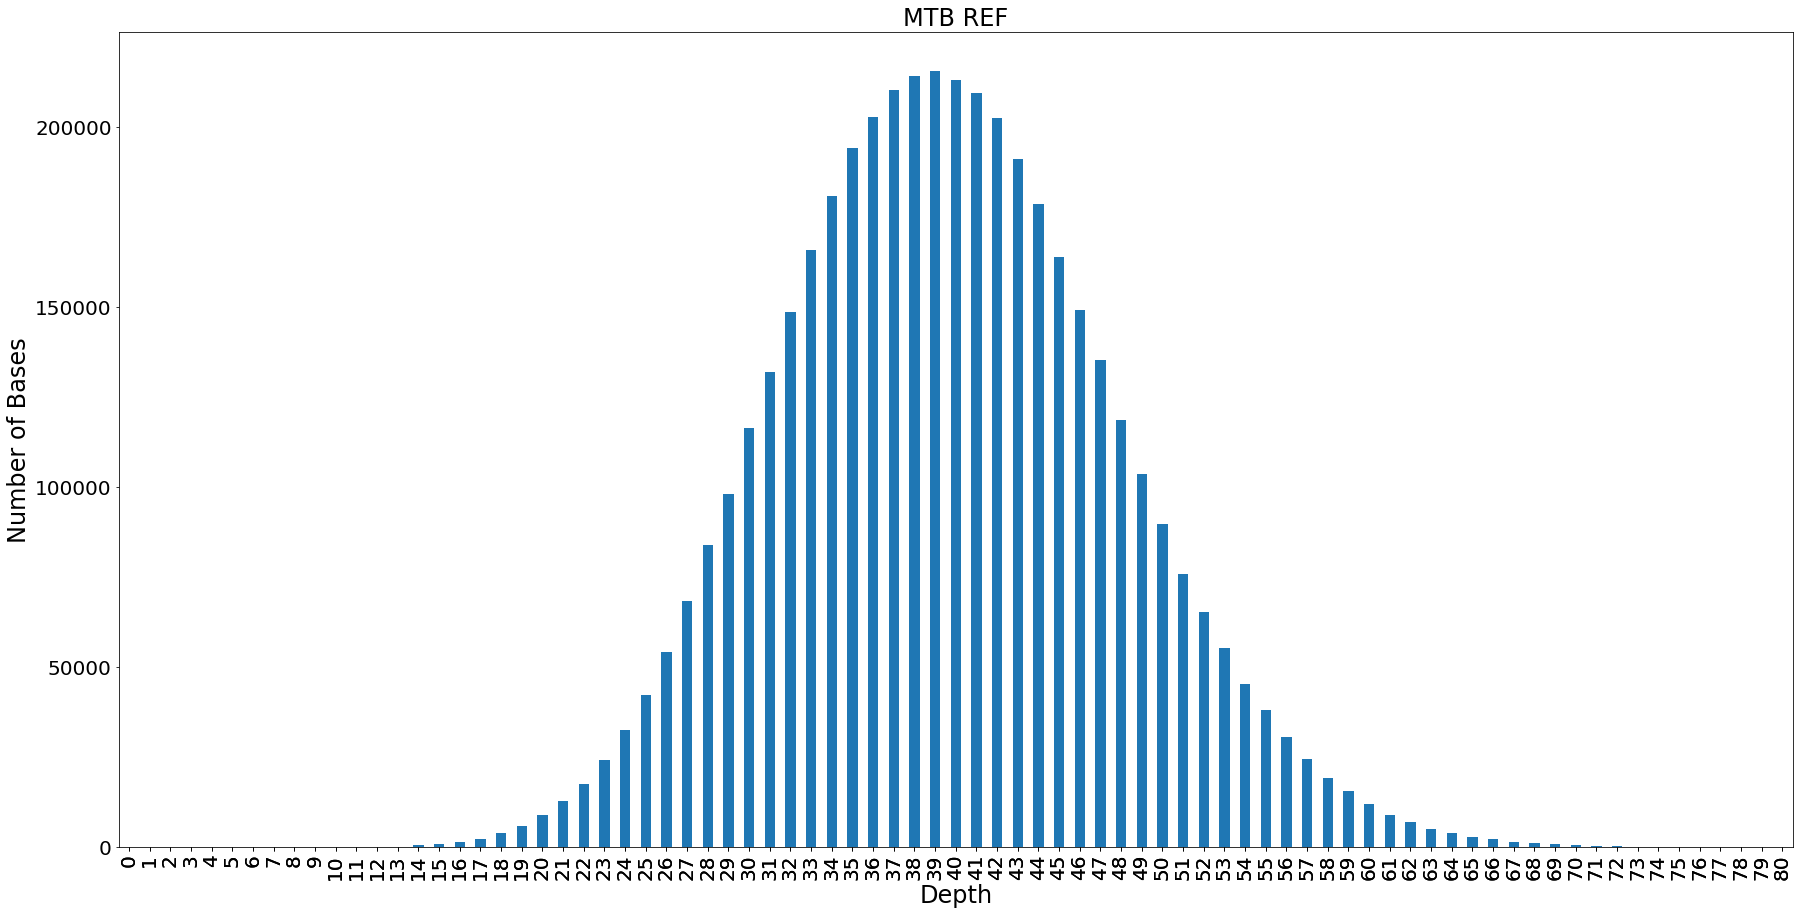

In [116]:
hist_cov.plot(x='depth', y='num_bases', kind='bar', 
              figsize=(30, 15), fontsize=20,
              legend=False)
plt.xlabel('Depth', fontsize=24)
plt.ylabel('Number of Bases', fontsize=24)
plt.title( 'MTB REF', fontsize=24)

In [117]:
print('number of bases with depth <2: ', str(len(perbase_cov[perbase_cov['depth'] < 2])))
print('number of bases with depth <10: ', str(len(perbase_cov[perbase_cov['depth'] < 10])))
print('number of bases with depth <20: ', str(len(perbase_cov[perbase_cov['depth'] < 20])))

number of bases with depth <2:  269
number of bases with depth <10:  770
number of bases with depth <20:  16777


Text(0.5, 1.0, 'MTB 20003 SNPs')

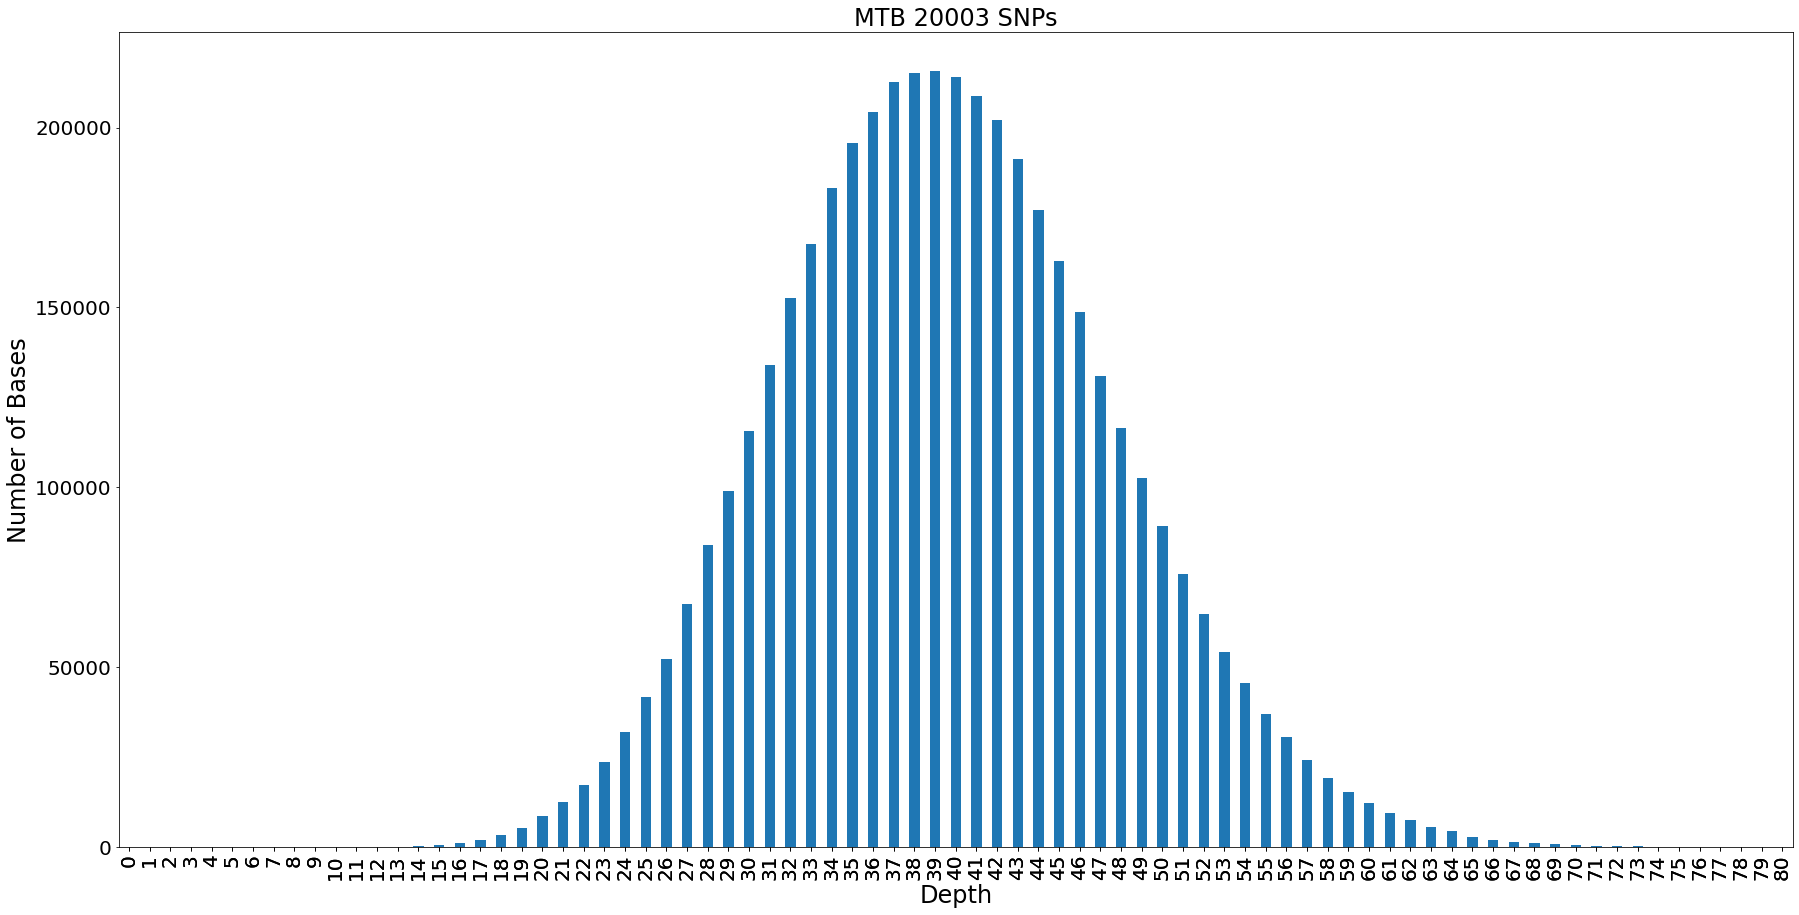

In [124]:
snp_20003_perbase_cov.rename(columns={1:'pos', 2:'depth'}, inplace=True)
snp_20003_hist_cov.rename(columns={1:'depth', 2:'num_bases', 3:'genome_size', 4:'genome_fraction'}, inplace=True)

snp_20003_hist_cov.plot(x='depth', y='num_bases', kind='bar', 
              figsize=(30, 15), fontsize=20,
              legend=False)
plt.xlabel('Depth', fontsize=24)
plt.ylabel('Number of Bases', fontsize=24)
plt.title( 'MTB 20003 SNPs', fontsize=24)

In [125]:
print('number of bases with depth <2: ', str(len(snp_20003_perbase_cov[snp_2000_perbase_cov['depth'] < 2])))
print('number of bases with depth <10: ', str(len(snp_20003_perbase_cov[snp_2000_perbase_cov['depth'] < 10])))
print('number of bases with depth <20: ', str(len(snp_20003_perbase_cov[snp_2000_perbase_cov['depth'] < 20])))

number of bases with depth <2:  204
number of bases with depth <10:  672
number of bases with depth <20:  15988


Text(0.5, 1.0, 'MTB 2000 SNPs')

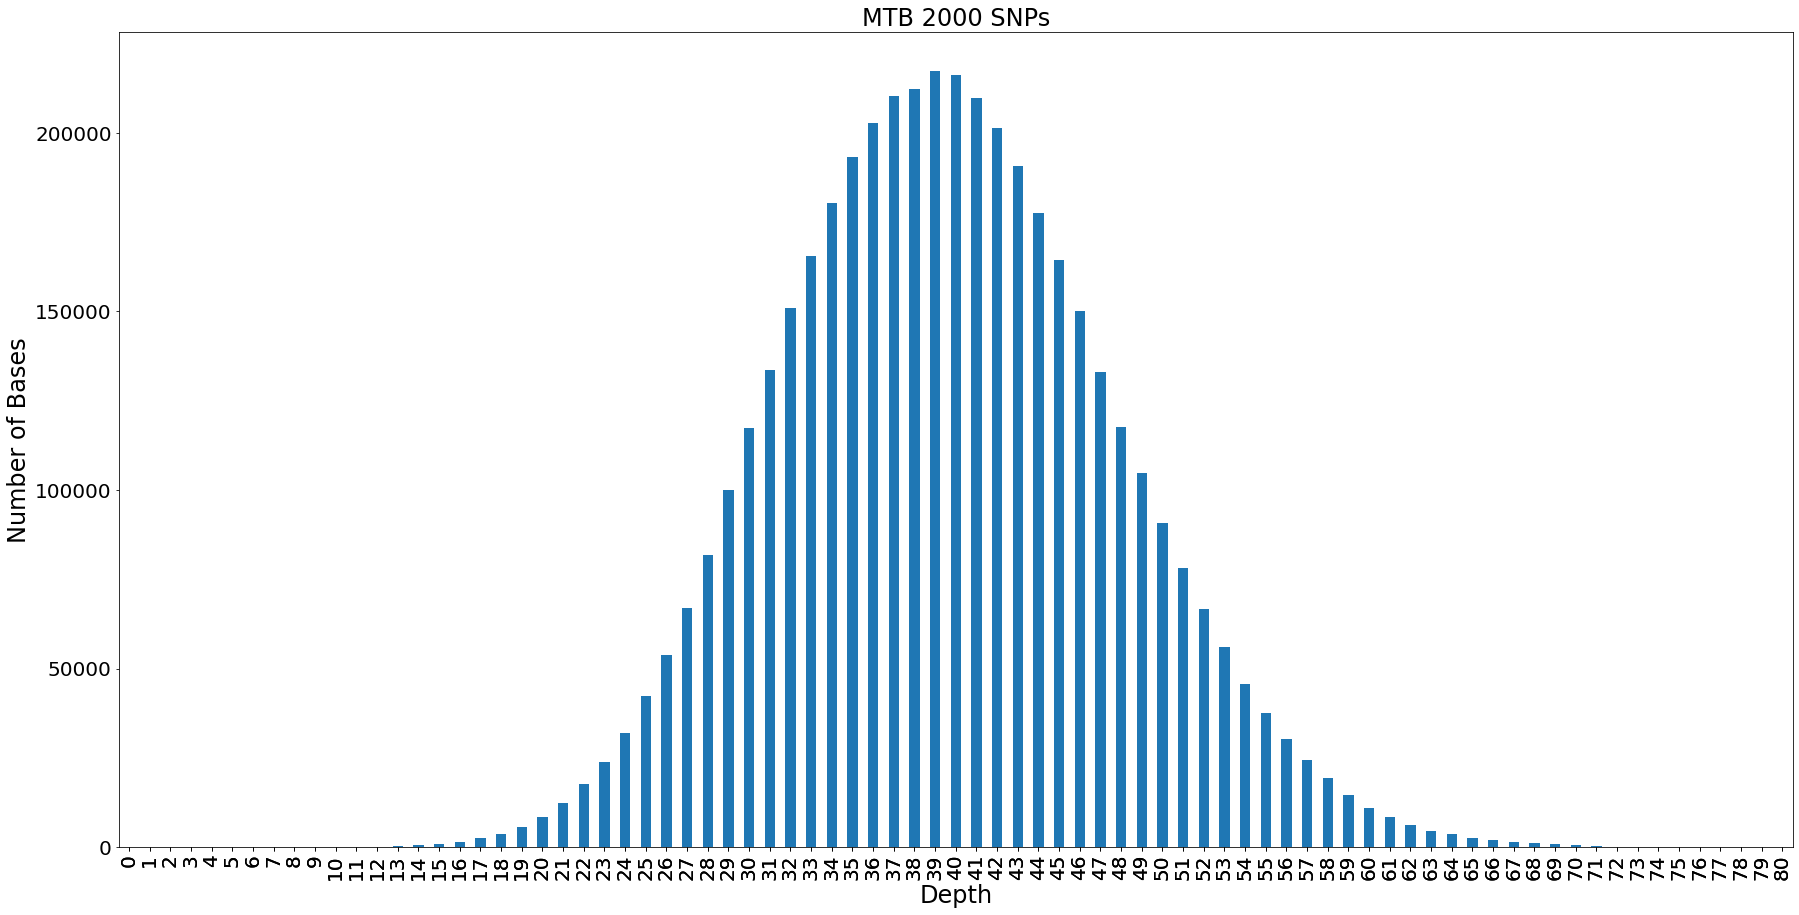

In [118]:
snp_2000_perbase_cov.rename(columns={1:'pos', 2:'depth'}, inplace=True)
snp_2000_hist_cov.rename(columns={1:'depth', 2:'num_bases', 3:'genome_size', 4:'genome_fraction'}, inplace=True)

snp_2000_hist_cov.plot(x='depth', y='num_bases', kind='bar', 
              figsize=(30, 15), fontsize=20,
              legend=False)
plt.xlabel('Depth', fontsize=24)
plt.ylabel('Number of Bases', fontsize=24)
plt.title( 'MTB 2000 SNPs', fontsize=24)

In [119]:
print('number of bases with depth <2: ', str(len(snp_2000_perbase_cov[snp_2000_perbase_cov['depth'] < 2])))
print('number of bases with depth <10: ', str(len(snp_2000_perbase_cov[snp_2000_perbase_cov['depth'] < 10])))
print('number of bases with depth <20: ', str(len(snp_2000_perbase_cov[snp_2000_perbase_cov['depth'] < 20])))

number of bases with depth <2:  204
number of bases with depth <10:  672
number of bases with depth <20:  15988


Text(0.5, 1.0, 'MTB 200 SNPs')

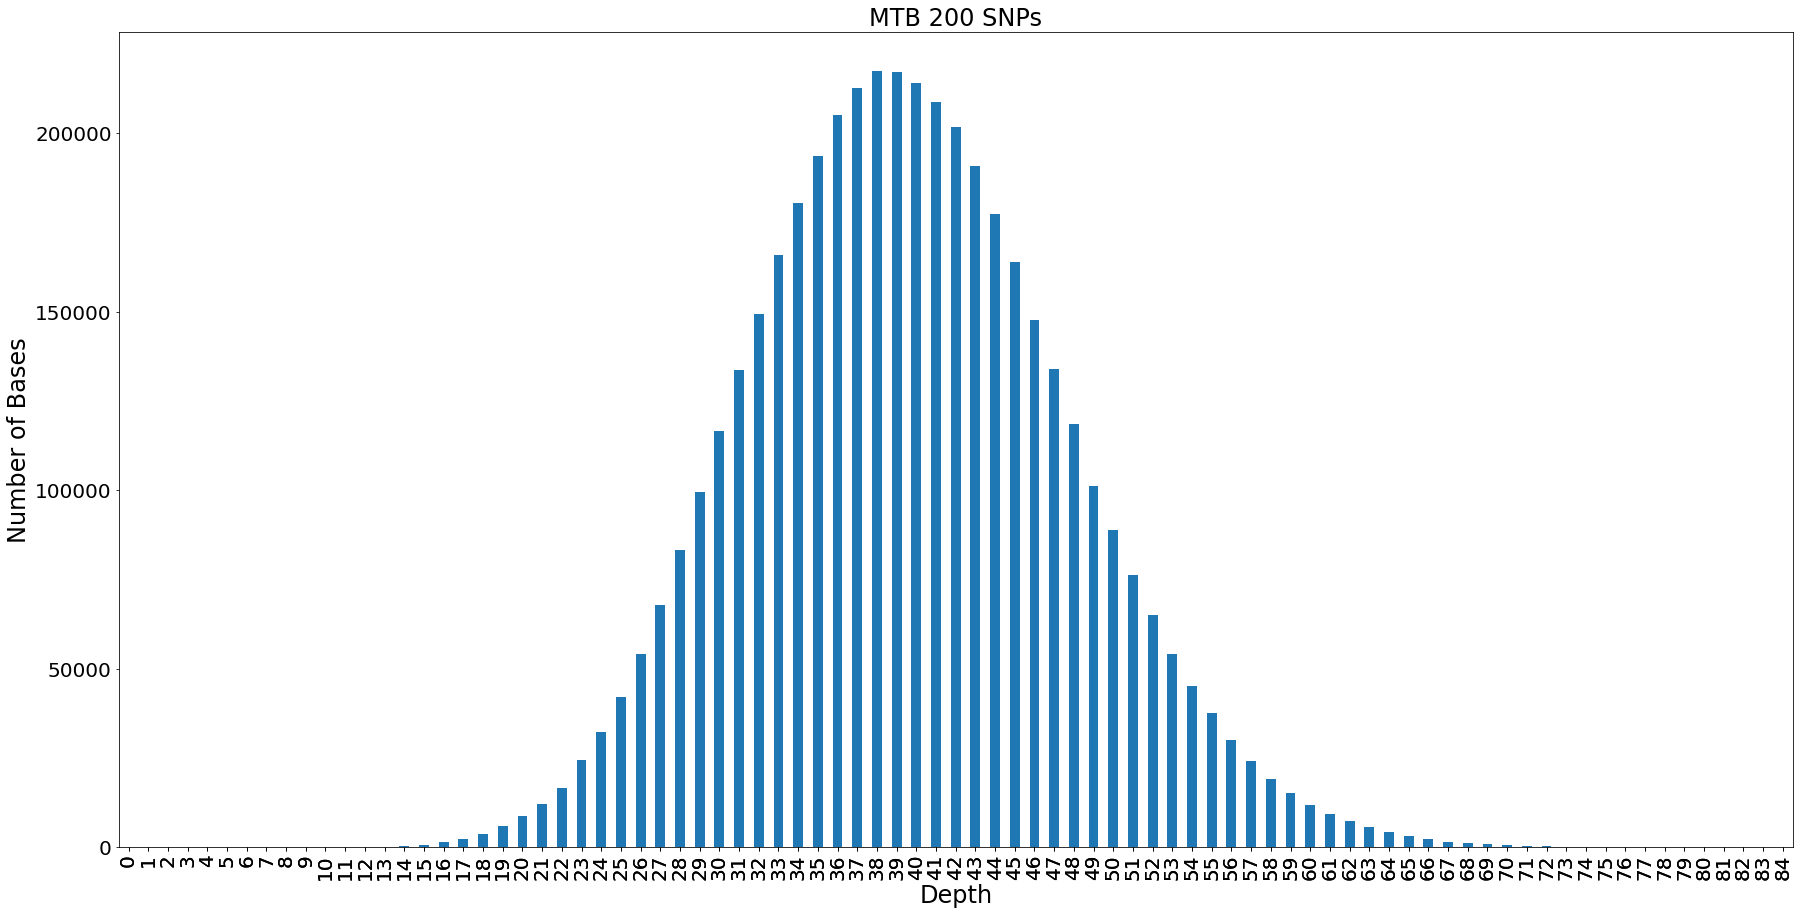

In [120]:
snp_200_perbase_cov.rename(columns={1:'pos', 2:'depth'}, inplace=True)
snp_200_hist_cov.rename(columns={1:'depth', 2:'num_bases', 3:'genome_size', 4:'genome_fraction'}, inplace=True)

snp_200_hist_cov.plot(x='depth', y='num_bases', kind='bar', 
              figsize=(30, 15), fontsize=20,
              legend=False)
plt.xlabel('Depth', fontsize=24)
plt.ylabel('Number of Bases', fontsize=24)
plt.title( 'MTB 200 SNPs', fontsize=24)

In [121]:
print('number of bases with depth <2: ', str(len(snp_200_perbase_cov[snp_200_perbase_cov['depth'] < 2])))
print('number of bases with depth <10: ', str(len(snp_200_perbase_cov[snp_200_perbase_cov['depth'] < 10])))
print('number of bases with depth <20: ', str(len(snp_200_perbase_cov[snp_200_perbase_cov['depth'] < 20])))

number of bases with depth <2:  252
number of bases with depth <10:  732
number of bases with depth <20:  15360


Text(0.5, 1.0, 'MTB 20 SNPs')

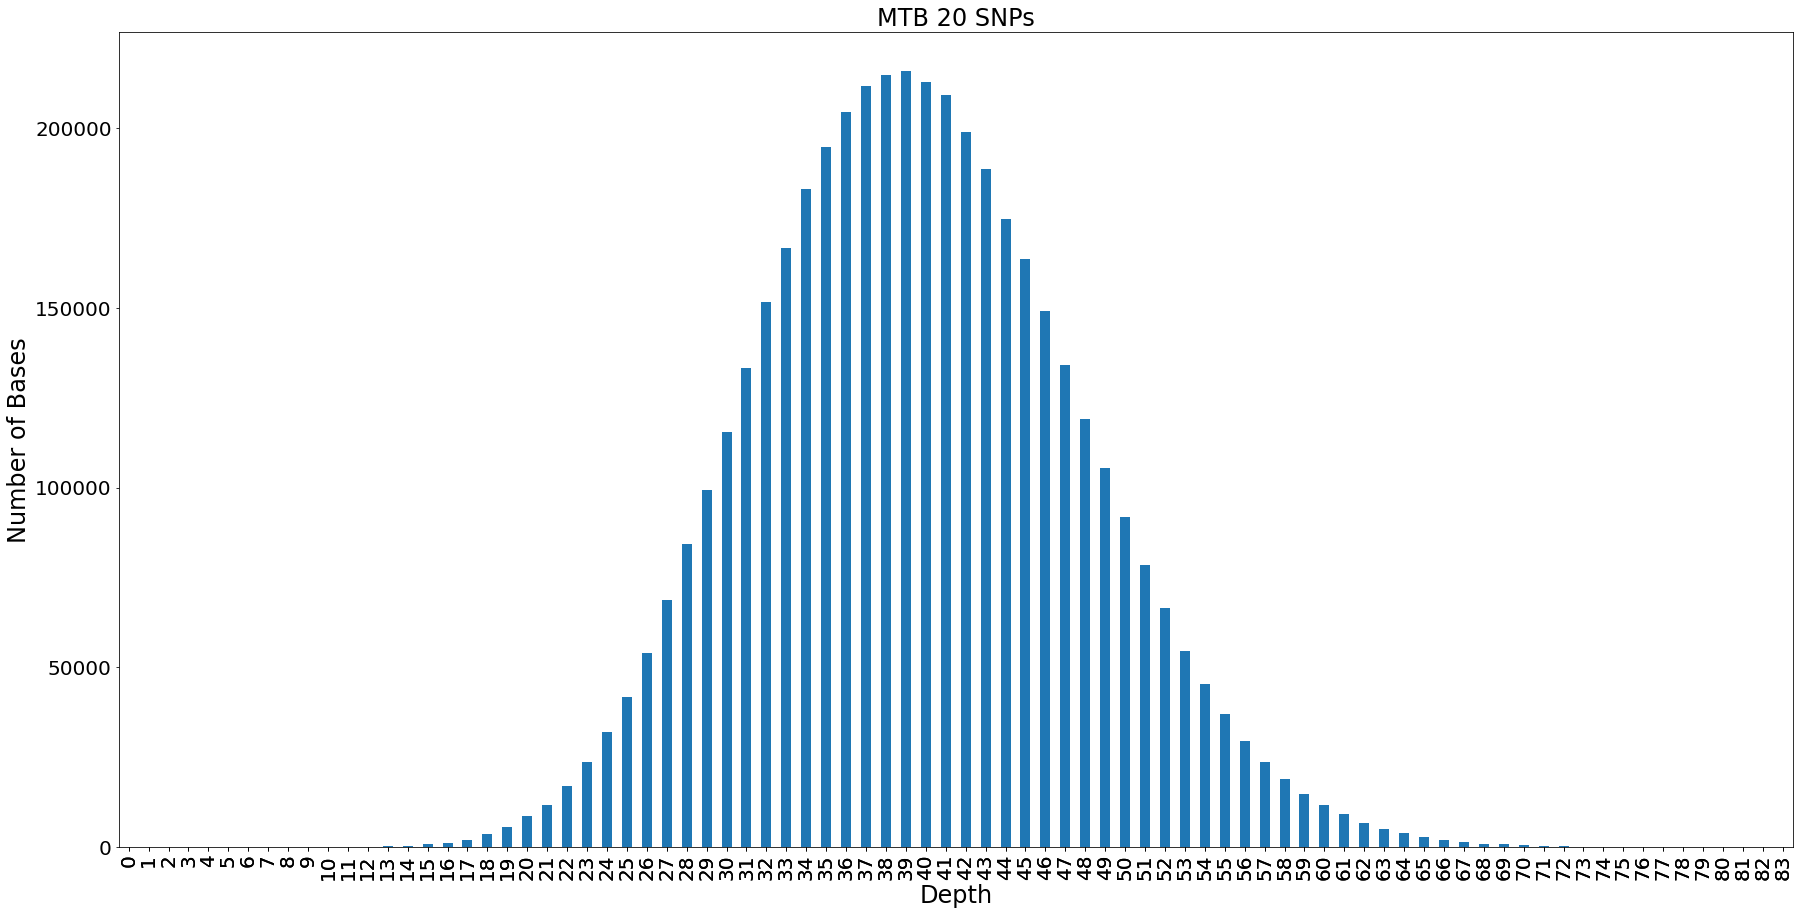

In [122]:
snp_20_perbase_cov.rename(columns={1:'pos', 2:'depth'}, inplace=True)
snp_20_hist_cov.rename(columns={1:'depth', 2:'num_bases', 3:'genome_size', 4:'genome_fraction'}, inplace=True)

snp_20_hist_cov.plot(x='depth', y='num_bases', kind='bar', 
              figsize=(30, 15), fontsize=20,
              legend=False)
plt.xlabel('Depth', fontsize=24)
plt.ylabel('Number of Bases', fontsize=24)
plt.title( 'MTB 20 SNPs', fontsize=24)

In [123]:
print('number of bases with depth <2: ', str(len(snp_20_perbase_cov[snp_20_perbase_cov['depth'] < 2])))
print('number of bases with depth <10: ', str(len(snp_20_perbase_cov[snp_20_perbase_cov['depth'] < 10])))
print('number of bases with depth <20: ', str(len(snp_20_perbase_cov[snp_20_perbase_cov['depth'] < 20])))

number of bases with depth <2:  238
number of bases with depth <10:  722
number of bases with depth <20:  15310


### SRA data

[SRR9166034: WGS of reference H37Rv](https://www.ncbi.nlm.nih.gov/sra/SRX5938805[accn])

In [109]:
srr9166034_perbase_cov = pd.read_csv('/Users/yeemayseah/Documents/Repos/read_mapping/TEST-SRR9166034-pe-sorted_perbase_genomecov.txt', sep='\t', header=None)
srr9166034_hist_cov = pd.read_csv('/Users/yeemayseah/Documents/Repos/read_mapping/TEST-SRR9166034-pe-sorted_genomecov.txt', sep='\t', header=None)

In [111]:
srr9166034_perbase_cov.rename(columns={1:'pos', 2:'depth'}, inplace=True)
srr9166034_hist_cov.rename(columns={1:'depth', 2:'num_bases', 3:'genome_size', 4:'genome_fraction'}, inplace=True)

srr9166034_hist_cov.plot(x='depth', y='num_bases', kind='bar', 
              figsize=(300, 150), fontsize=20,
              legend=False)
plt.xlabel('Depth', fontsize=24)
plt.ylabel('Number of Bases', fontsize=24)
plt.title( 'SRR9166034: MTb reference H37Rv WGS', fontsize=24)
plt.savefig('srr9166034_cov.png')

In [112]:
print('number of bases with depth <2: ', str(len(srr9166034_perbase_cov[srr9166034_perbase_cov['depth'] < 2])))
print('number of bases with depth <10: ', str(len(srr9166034_perbase_cov[srr9166034_perbase_cov['depth'] < 10])))
print('number of bases with depth <20: ', str(len(srr9166034_perbase_cov[srr9166034_perbase_cov['depth'] < 20])))

number of bases with depth <2:  2082
number of bases with depth <10:  6156
number of bases with depth <20:  11647


In [114]:
srr9166034_perbase_cov['depth'].max()

2984

In [115]:
srr9166034_perbase_cov['depth'].min()

0

In [116]:
srr9166034_perbase_cov['depth'].median()

311.0

### In-house sequencing

In [3]:
sub1089_710_517_perbase_cov = pd.read_csv('/Users/yeemayseah/Documents/Repos/read_mapping/sub1089-710-517-pe-sorted_perbase_genomecov.txt', sep='\t', header=None)
sub1089_710_517_hist_cov = pd.read_csv('/Users/yeemayseah/Documents/Repos/read_mapping/sub1089-710-517-pe-sorted_genomecov.txt', sep='\t', header=None)

In [4]:
sub1089_710_517_perbase_cov.rename(columns={1:'pos', 2:'depth'}, inplace=True)
sub1089_710_517_hist_cov.rename(columns={1:'depth', 2:'num_bases', 3:'genome_size', 4:'genome_fraction'}, inplace=True)

sub1089_710_517_hist_cov.plot(x='depth', y='num_bases', kind='bar', 
              figsize=(300, 150), fontsize=20,
              legend=False)
plt.xlabel('Depth', fontsize=24)
plt.ylabel('Number of Bases', fontsize=24)
plt.title( 'sub1089-710-517: Salipante lab Mtb ATCC strain WGS, subsampled 1.2 million reads', fontsize=24)
plt.savefig('sub1089_710_517_cov.png')

In [5]:
sub1089_710_517_perbase_cov['depth'].max()

255

In [6]:
sub1089_710_517_perbase_cov['depth'].min()

0

In [7]:
sub1089_710_517_perbase_cov['depth'].median()

71.0

### Plot MAPQ - H37Rv mapped to H37Rv
#### With ```.bed``` files

To get MAPQ at each position with ```bedtools```:

1. Create tab-separated genome file (mtb_genome.txt):

> NC_000962.3        4411532

2. Create window file (```-w``` for window size, ```-s``` for step size):

```singularity exec -B /molmicro,/molmicro/working/ymseah:/mnt /molmicro/common/singularity/bedtools-2.27.1-singularity-3.5.1.sif bedtools
makewindows -g /mnt/read_mapping/mtb_genome.txt -w 1 -s 1 > /mnt/read_mapping/bedtools/mtb_genome.windows1.bed```

3. Create ```.bed``` file from ```.bam```:

```singularity exec -B /molmicro,/molmicro/working/ymseah:/mnt /molmicro/common/singularity/bedtools-2.27.1-singularity-3.5.1.sif bedtools bamtobed -i /mnt/deduped/picard/TEST-MTBREF_deduped_matecig.bam > read_mapping/bedtools/TEST-MTBREF_deduped_matecig.bed```

4. Map scores from ```.bed``` to window file. Default reports sum of scores:

```singularity exec -B /molmicro,/molmicro/working/ymseah:/mnt /molmicro/common/singularity/bedtools-2.27.1-singularity-3.5.1.sif bedtools map -a /mnt/read_mapping/bedtools/mtb_genome.windows1.bed -b /mnt/read_mapping/bedtools/TEST-MTBREF_deduped_matecig.bed > read_mapping/bedtools/TEST-MTBREF.mapq.windows1.bed```

4a. Use with ```-o collapse``` to report all scores per site:

```singularity exec -B /molmicro,/molmicro/working/ymseah:/mnt /molmicro/common/singularity/bedtools-2.27.1-singularity-3.5.1.sif bedtools map -a /mnt/read_mapping/bedtools/mtb_genome.windows1.bed -b /mnt/read_mapping/bedtools/TEST-MTBREF_deduped_matecig.bed -o collapse > read_mapping/bedtools/TEST-MTBREF.mapq_collapse.windows1.bed```

OR

4b. Use with ```-o distinct``` to report only unique scores per site:

```singularity exec -B /molmicro,/molmicro/working/ymseah:/mnt /molmicro/common/singularity/bedtools-2.27.1-singularity-3.5.1.sif bedtools map -a /mnt/read_mapping/bedtools/mtb_genome.windows1.bed -b /mnt/read_mapping/bedtools/TEST-MTBREF_deduped_matecig.bed -o distinct > read_mapping/bedtools/TEST-MTBREF.mapq_distinct.windows1.bed```

OR

4c. Use with ```-c 5,5,5,5``` (which columns in ```-b``` to apply following calculations) and ```-o min,max,median,count``` to get summary stats:

```singularity exec -B /molmicro,/molmicro/working/ymseah:/mnt /molmicro/common/singularity/bedtools-2.27.1-singularity-3.5.1.sif bedtools map -a /mnt/read_mapping/bedtools/mtb_genome.windows1.bed -b /mnt/read_mapping/bedtools/TEST-MTBREF_deduped_matecig.bed -c 5,5,5,5 -o min,max,median,count > read_mapping/bedtools/TEST-MTBREF.mapq_stats.windows1.bed```

In [44]:
refmapq = pd.read_csv('/Users/yeemayseah/Documents/Repos/read_mapping/bedtools/TEST-MTBREF.mapq_stats.windows1.bed', sep='\t', header=None)

/Users/yeemayseah/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [45]:
refmapq.rename(columns={0:'chr', 1:'start', 2:'end', 3:'min_mapq', 4:'max_mapq', 5:'median_mapq', 6:'count_mapq'}, inplace=True)

In [46]:
refmapq.loc[refmapq.min_mapq == '.', 'min_mapq'] = np.nan
refmapq.loc[refmapq.max_mapq == '.', 'max_mapq'] = np.nan
refmapq.loc[refmapq.median_mapq == '.', 'median_mapq'] = np.nan

In [47]:
refmapq

chr    start      end min_mapq max_mapq median_mapq  \
0        NC_000962.3        0        1      NaN      NaN         NaN   
1        NC_000962.3        1        2      NaN      NaN         NaN   
2        NC_000962.3        2        3      NaN      NaN         NaN   
3        NC_000962.3        3        4      NaN      NaN         NaN   
4        NC_000962.3        4        5      NaN      NaN         NaN   
...              ...      ...      ...      ...      ...         ...   
4411527  NC_000962.3  4411527  4411528      NaN      NaN         NaN   
4411528  NC_000962.3  4411528  4411529      NaN      NaN         NaN   
4411529  NC_000962.3  4411529  4411530      NaN      NaN         NaN   
4411530  NC_000962.3  4411530  4411531      NaN      NaN         NaN   
4411531  NC_000962.3  4411531  4411532      NaN      NaN         NaN   

         count_mapq  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
4411527           0  
4411528           0  
4411529           0  
4411530           0  
4411531           0  

[4411532 rows x 7 columns]

In [82]:
ref0 = refmapq[pd.to_numeric(refmapq.median_mapq) == 0]
ref0

chr    start      end min_mapq max_mapq median_mapq  \
103813   NC_000962.3   103813   103814        0       60           0   
103814   NC_000962.3   103814   103815        0       60           0   
103815   NC_000962.3   103815   103816        0       60           0   
103816   NC_000962.3   103816   103817        0       60           0   
103817   NC_000962.3   103817   103818        0       60           0   
...              ...      ...      ...      ...      ...         ...   
4319258  NC_000962.3  4319258  4319259        0       60         0.0   
4319259  NC_000962.3  4319259  4319260        0       60         0.0   
4319260  NC_000962.3  4319260  4319261        0       60         0.0   
4319261  NC_000962.3  4319261  4319262        0       60         0.0   
4319262  NC_000962.3  4319262  4319263        0       60         0.0   

         count_mapq  
103813           39  
103814           37  
103815           37  
103816           36  
103817           35  
...             ...  
4319258          58  
4319259          58  
4319260          59  
4319261          59  
4319262          61  

[57262 rows x 7 columns]

### Are false negative calls in regions with low MAPQ?
#### *Yes*

In [86]:
#false NEG call in 200-SNP GATK, samtools, freebayes dataset
ref0[ref0.start == 2028773]

chr    start      end min_mapq max_mapq median_mapq  \
2028773  NC_000962.3  2028773  2028774        0        0         0.0   

         count_mapq  
2028773          43

In [95]:
#false NEG calls in 2000-SNP datasets
fn_gatk = [890043,1277504,1468661,1637609,1987949,2262230,2366227,2431044,2829035,2972314,3120697,3382053,3484269,3551498,3847004,3884029,3891595,3933606,3935584,4318785]

fn_samtools = fn_gatk + [401484]
fn_samtools.remove(3120697)

fn_freebayes = fn_gatk
fn_freebayes.remove(3120697)

In [94]:
ref0.loc[fn_gatk,:]

chr    start      end min_mapq max_mapq median_mapq  \
890043   NC_000962.3   890043   890044        0        0         0.0   
1277504  NC_000962.3  1277504  1277505        0        0           0   
1468661  NC_000962.3  1468661  1468662        0        0         0.0   
1637609  NC_000962.3  1637609  1637610        0        0         0.0   
1987949  NC_000962.3  1987949  1987950        0        0         0.0   
2262230  NC_000962.3  2262230  2262231        0        0         0.0   
2366227  NC_000962.3  2366227  2366228        0        0         0.0   
2431044  NC_000962.3  2431044  2431045        0        0         0.0   
2829035  NC_000962.3  2829035  2829036        0        0         0.0   
2972314  NC_000962.3  2972314  2972315        0        0         0.0   
3120697  NC_000962.3  3120697  3120698        0       40           0   
3382053  NC_000962.3  3382053  3382054        0        0         0.0   
3484269  NC_000962.3  3484269  3484270        0        0         0.0   
3551498  NC_000962.3  3551498  3551499        0        0           0   
3847004  NC_000962.3  3847004  3847005        0        0         0.0   
3884029  NC_000962.3  3884029  3884030        0        0         0.0   
3891595  NC_000962.3  3891595  3891596        0        0         0.0   
3933606  NC_000962.3  3933606  3933607        0        0         0.0   
3935584  NC_000962.3  3935584  3935585        0        0         0.0   
4318785  NC_000962.3  4318785  4318786        0        0         0.0   

         count_mapq  
890043           32  
1277504          46  
1468661          53  
1637609          27  
1987949          39  
2262230          36  
2366227          49  
2431044          51  
2829035          42  
2972314          55  
3120697          37  
3382053          31  
3484269          33  
3551498          42  
3847004          39  
3884029          51  
3891595          33  
3933606          37  
3935584          42  
4318785          33

In [93]:
ref0.loc[fn_samtools,:]

chr    start      end min_mapq max_mapq median_mapq  \
890043   NC_000962.3   890043   890044        0        0         0.0   
1277504  NC_000962.3  1277504  1277505        0        0           0   
1468661  NC_000962.3  1468661  1468662        0        0         0.0   
1637609  NC_000962.3  1637609  1637610        0        0         0.0   
1987949  NC_000962.3  1987949  1987950        0        0         0.0   
2262230  NC_000962.3  2262230  2262231        0        0         0.0   
2366227  NC_000962.3  2366227  2366228        0        0         0.0   
2431044  NC_000962.3  2431044  2431045        0        0         0.0   
2829035  NC_000962.3  2829035  2829036        0        0         0.0   
2972314  NC_000962.3  2972314  2972315        0        0         0.0   
3382053  NC_000962.3  3382053  3382054        0        0         0.0   
3484269  NC_000962.3  3484269  3484270        0        0         0.0   
3551498  NC_000962.3  3551498  3551499        0        0           0   
3847004  NC_000962.3  3847004  3847005        0        0         0.0   
3884029  NC_000962.3  3884029  3884030        0        0         0.0   
3891595  NC_000962.3  3891595  3891596        0        0         0.0   
3933606  NC_000962.3  3933606  3933607        0        0         0.0   
3935584  NC_000962.3  3935584  3935585        0        0         0.0   
4318785  NC_000962.3  4318785  4318786        0        0         0.0   
401484   NC_000962.3   401484   401485        0        0         0.0   

         count_mapq  
890043           32  
1277504          46  
1468661          53  
1637609          27  
1987949          39  
2262230          36  
2366227          49  
2431044          51  
2829035          42  
2972314          55  
3382053          31  
3484269          33  
3551498          42  
3847004          39  
3884029          51  
3891595          33  
3933606          37  
3935584          42  
4318785          33  
401484           42

In [96]:
ref0.loc[fn_freebayes,:]

chr    start      end min_mapq max_mapq median_mapq  \
890043   NC_000962.3   890043   890044        0        0         0.0   
1277504  NC_000962.3  1277504  1277505        0        0           0   
1468661  NC_000962.3  1468661  1468662        0        0         0.0   
1637609  NC_000962.3  1637609  1637610        0        0         0.0   
1987949  NC_000962.3  1987949  1987950        0        0         0.0   
2262230  NC_000962.3  2262230  2262231        0        0         0.0   
2366227  NC_000962.3  2366227  2366228        0        0         0.0   
2431044  NC_000962.3  2431044  2431045        0        0         0.0   
2829035  NC_000962.3  2829035  2829036        0        0         0.0   
2972314  NC_000962.3  2972314  2972315        0        0         0.0   
3382053  NC_000962.3  3382053  3382054        0        0         0.0   
3484269  NC_000962.3  3484269  3484270        0        0         0.0   
3551498  NC_000962.3  3551498  3551499        0        0           0   
3847004  NC_000962.3  3847004  3847005        0        0         0.0   
3884029  NC_000962.3  3884029  3884030        0        0         0.0   
3891595  NC_000962.3  3891595  3891596        0        0         0.0   
3933606  NC_000962.3  3933606  3933607        0        0         0.0   
3935584  NC_000962.3  3935584  3935585        0        0         0.0   
4318785  NC_000962.3  4318785  4318786        0        0         0.0   

         count_mapq  
890043           32  
1277504          46  
1468661          53  
1637609          27  
1987949          39  
2262230          36  
2366227          49  
2431044          51  
2829035          42  
2972314          55  
3382053          31  
3484269          33  
3551498          42  
3847004          39  
3884029          51  
3891595          33  
3933606          37  
3935584          42  
4318785          33

In [97]:
refmapq[pd.to_numeric(refmapq.min_mapq) == 1]

chr    start      end min_mapq max_mapq median_mapq  \
3936335  NC_000962.3  3936335  3936336        1       60        60.0   
3936336  NC_000962.3  3936336  3936337        1       60        60.0   
3936337  NC_000962.3  3936337  3936338        1       60        60.0   
3936338  NC_000962.3  3936338  3936339        1       60        60.0   
3936339  NC_000962.3  3936339  3936340        1       60        60.0   
3936340  NC_000962.3  3936340  3936341        1       60        60.0   
3936341  NC_000962.3  3936341  3936342        1       60        60.0   
3936342  NC_000962.3  3936342  3936343        1       60        60.0   
3936343  NC_000962.3  3936343  3936344        1       60        60.0   
3936344  NC_000962.3  3936344  3936345        1       60        60.0   
3936345  NC_000962.3  3936345  3936346        1       60        60.0   
3936346  NC_000962.3  3936346  3936347        1       60        60.0   
3936347  NC_000962.3  3936347  3936348        1       60        60.0   
3936348  NC_000962.3  3936348  3936349        1       60        60.0   
3936349  NC_000962.3  3936349  3936350        1       60        60.0   
3936350  NC_000962.3  3936350  3936351        1       60        60.0   
3936351  NC_000962.3  3936351  3936352        1       60        60.0   
3936352  NC_000962.3  3936352  3936353        1       60        60.0   

         count_mapq  
3936335          37  
3936336          37  
3936337          37  
3936338          38  
3936339          38  
3936340          38  
3936341          38  
3936342          39  
3936343          39  
3936344          39  
3936345          38  
3936346          38  
3936347          38  
3936348          38  
3936349          38  
3936350          38  
3936351          38  
3936352          38

In [98]:
ref0.to_csv('TEST-MTBREF_count_mapq0.csv', index=False)

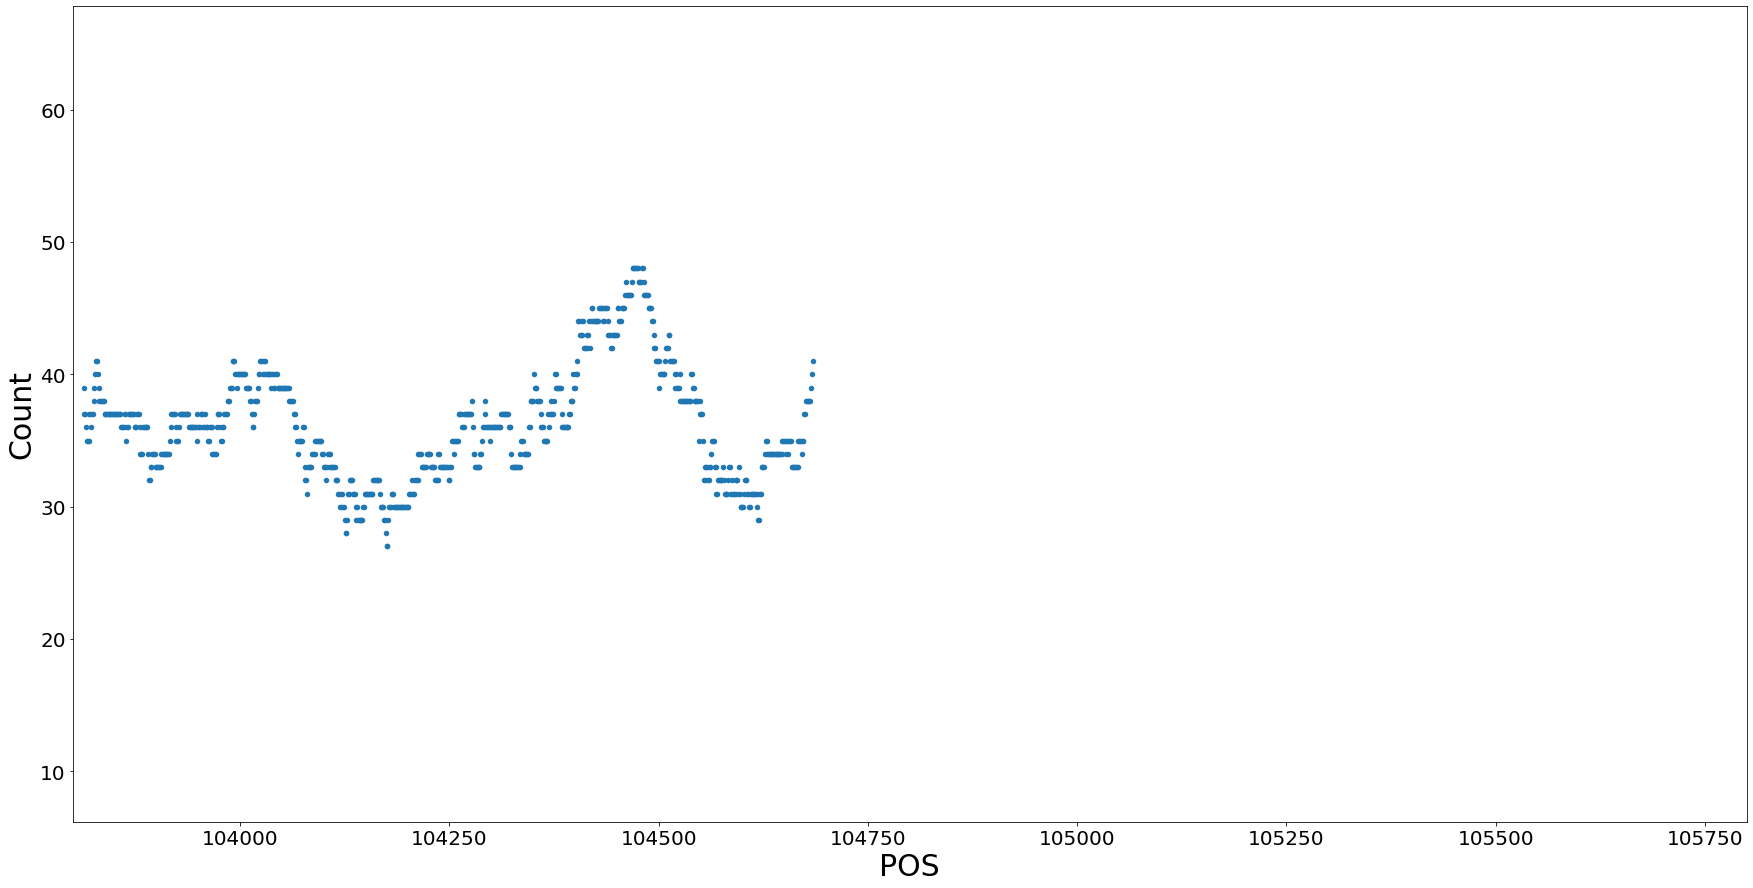

In [99]:
ref0.plot(x='start', y='count_mapq', kind='scatter', xlim=(103800,105800), figsize=(30,15), fontsize=20)
plt.xlabel('POS', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.savefig('TEST-MTBREF_count_mapq0_103800_104800.png')

### Did ```bwa mem -T 10``` actually filter out reads with MAPQ <= 10?
#### *No*

In [50]:
refmq10filtered = pd.read_csv('/Users/yeemayseah/Documents/Repos/read_mapping/bedtools/TEST-MTBREF_mq10.mapq_stats.windows1.bed', sep='\t', header=None)

/Users/yeemayseah/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [51]:
refmq10filtered.rename(columns={0:'chr', 1:'start', 2:'end', 3:'min_mapq', 4:'max_mapq', 5:'median_mapq', 6:'count_mapq'}, inplace=True)

In [52]:
refmq10filtered

chr    start      end min_mapq max_mapq median_mapq  \
0        NC_000962.3        0        1        .        .           .   
1        NC_000962.3        1        2        .        .           .   
2        NC_000962.3        2        3        .        .           .   
3        NC_000962.3        3        4        .        .           .   
4        NC_000962.3        4        5        .        .           .   
...              ...      ...      ...      ...      ...         ...   
4411527  NC_000962.3  4411527  4411528        .        .           .   
4411528  NC_000962.3  4411528  4411529        .        .           .   
4411529  NC_000962.3  4411529  4411530        .        .           .   
4411530  NC_000962.3  4411530  4411531        .        .           .   
4411531  NC_000962.3  4411531  4411532        .        .           .   

         count_mapq  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
4411527           0  
4411528           0  
4411529           0  
4411530           0  
4411531           0  

[4411532 rows x 7 columns]

In [53]:
refmq10filtered.loc[refmq10filtered.min_mapq == '.', 'min_mapq'] = np.nan
refmq10filtered.loc[refmq10filtered.max_mapq == '.', 'max_mapq'] = np.nan
refmq10filtered.loc[refmq10filtered.median_mapq == '.', 'median_mapq'] = np.nan

In [149]:
refmq10filtered[pd.to_numeric(refmq10filtered.median_mapq) == 0]

chr    start      end min_mapq max_mapq median_mapq  \
103813   NC_000962.3   103813   103814        0       60           0   
103814   NC_000962.3   103814   103815        0       60           0   
103815   NC_000962.3   103815   103816        0       60           0   
103816   NC_000962.3   103816   103817        0       60           0   
103817   NC_000962.3   103817   103818        0       60           0   
...              ...      ...      ...      ...      ...         ...   
4319258  NC_000962.3  4319258  4319259        0       60         0.0   
4319259  NC_000962.3  4319259  4319260        0       60         0.0   
4319260  NC_000962.3  4319260  4319261        0       60         0.0   
4319261  NC_000962.3  4319261  4319262        0       60         0.0   
4319262  NC_000962.3  4319262  4319263        0       60         0.0   

         count_mapq  
103813           39  
103814           37  
103815           37  
103816           36  
103817           35  
...             ...  
4319258          58  
4319259          58  
4319260          59  
4319261          59  
4319262          61  

[57262 rows x 7 columns]

### Did ```samtools view -q 10``` filter out reads with MAPQ <=10?

#### *Yes*

(Use ```samtools view -f 3 -F 12``` to only output paired mapped reads)

```bedtools bamtobed -i /mnt/deduped/picard/samtools_filtered/TEST-MTBREF_deduped_matecig_f3F12mq10.bam > read_mapping/bedtools/TEST-MTBREF_deduped_matecig_f3F12mq10.bed```

```bedtools map -a /mnt/read_mapping/bedtools/mtb_genome.windows1.bed -b /mnt/read_mapping/bedtools/TEST-MTBREF_deduped_matecig_f3F12mq10.bed -c 5,5,5,5 -o min,max,median,count > read_mapping/bedtools/TEST-MTBREF_deduped_matecig_f3F12mq10.mapq_stats.windows1.bed```

In [141]:
ref_stmq10 = pd.read_csv('/Users/yeemayseah/Documents/Repos/read_mapping/bedtools/TEST-MTBREF_deduped_matecig_f3F12mq10.mapq_stats.windows1.bed', sep='\t', header=None)

/Users/yeemayseah/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [142]:
ref_stmq10.rename(columns={0:'chr', 1:'start', 2:'end', 3:'min_mapq', 4:'max_mapq', 5:'median_mapq', 6:'count_mapq'}, inplace=True)

In [144]:
ref_stmq10.loc[ref_stmq10.min_mapq == '.', 'min_mapq'] = np.nan
ref_stmq10.loc[ref_stmq10.max_mapq == '.', 'max_mapq'] = np.nan
ref_stmq10.loc[ref_stmq10.median_mapq == '.', 'median_mapq'] = np.nan

In [146]:
ref_stmq10

chr    start      end min_mapq max_mapq median_mapq  \
0        NC_000962.3        0        1      NaN      NaN         NaN   
1        NC_000962.3        1        2      NaN      NaN         NaN   
2        NC_000962.3        2        3      NaN      NaN         NaN   
3        NC_000962.3        3        4      NaN      NaN         NaN   
4        NC_000962.3        4        5      NaN      NaN         NaN   
...              ...      ...      ...      ...      ...         ...   
4411527  NC_000962.3  4411527  4411528      NaN      NaN         NaN   
4411528  NC_000962.3  4411528  4411529      NaN      NaN         NaN   
4411529  NC_000962.3  4411529  4411530      NaN      NaN         NaN   
4411530  NC_000962.3  4411530  4411531      NaN      NaN         NaN   
4411531  NC_000962.3  4411531  4411532      NaN      NaN         NaN   

         count_mapq  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
4411527           0  
4411528           0  
4411529           0  
4411530           0  
4411531           0  

[4411532 rows x 7 columns]

In [150]:
ref_stmq10[pd.to_numeric(ref_stmq10.median_mapq) == 0]

Empty DataFrame
Columns: [chr, start, end, min_mapq, max_mapq, median_mapq, count_mapq]
Index: []

In [147]:
ref_stmq10[(pd.to_numeric(ref_stmq10.min_mapq) > 0) & (pd.to_numeric(ref_stmq10.max_mapq) > 0)]

chr    start      end min_mapq max_mapq median_mapq  \
15       NC_000962.3       15       16       60       60          60   
16       NC_000962.3       16       17       60       60          60   
17       NC_000962.3       17       18       60       60          60   
18       NC_000962.3       18       19       60       60          60   
19       NC_000962.3       19       20       60       60          60   
...              ...      ...      ...      ...      ...         ...   
4411517  NC_000962.3  4411517  4411518       60       60          60   
4411518  NC_000962.3  4411518  4411519       60       60          60   
4411519  NC_000962.3  4411519  4411520       60       60          60   
4411520  NC_000962.3  4411520  4411521       60       60          60   
4411521  NC_000962.3  4411521  4411522       60       60          60   

         count_mapq  
15                1  
16                1  
17                1  
18                1  
19                1  
...             ...  
4411517           1  
4411518           1  
4411519           1  
4411520           1  
4411521           1  

[4369193 rows x 7 columns]

In [151]:
ref_stmq10[ref_stmq10.start == 2028773]

chr    start      end min_mapq max_mapq median_mapq  \
2028773  NC_000962.3  2028773  2028774      NaN      NaN         NaN   

         count_mapq  
2028773           0

In [152]:
refmq10filtered[refmq10filtered.start == 2028773]

chr    start      end min_mapq max_mapq median_mapq  \
2028773  NC_000962.3  2028773  2028774        0        0         0.0   

         count_mapq  
2028773          43

#### Plot MAPQ = 0 (blue) and read depth (red)

In [157]:
mapq200snps = pd.read_csv('/Users/yeemayseah/Documents/Repos/read_mapping/bedtools/TEST-H37Rv200snps.mapq_stats.windows1.bed', sep='\t', header=None)
mapq200snps.rename(columns={0:'chr', 1:'start', 2:'end', 3:'min_mapq', 4:'max_mapq', 5:'median_mapq', 6:'count_mapq'}, inplace=True)       
mapq200snps.loc[mapq200snps.min_mapq == '.', 'min_mapq'] = np.nan
mapq200snps.loc[mapq200snps.max_mapq == '.', 'max_mapq'] = np.nan
mapq200snps.loc[mapq200snps.median_mapq == '.', 'median_mapq'] = np.nan

/Users/yeemayseah/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [158]:
mapq200snps_mq0 = mapq200snps[pd.to_numeric(mapq200snps.median_mapq) == 0]
mapq200snps_mq0

chr    start      end min_mapq max_mapq median_mapq  \
103799   NC_000962.3   103799   103800        0       60           0   
103800   NC_000962.3   103800   103801        0       60           0   
103801   NC_000962.3   103801   103802        0       60           0   
103802   NC_000962.3   103802   103803        0       60           0   
103803   NC_000962.3   103803   103804        0       60           0   
...              ...      ...      ...      ...      ...         ...   
4319265  NC_000962.3  4319265  4319266        0       60         0.0   
4319266  NC_000962.3  4319266  4319267        0       60         0.0   
4319267  NC_000962.3  4319267  4319268        0       60         0.0   
4319268  NC_000962.3  4319268  4319269        0       60         0.0   
4319269  NC_000962.3  4319269  4319270        0       60         0.0   

         count_mapq  
103799           47  
103800           48  
103801           46  
103802           46  
103803           46  
...             ...  
4319265          37  
4319266          37  
4319267          37  
4319268          37  
4319269          37  

[57460 rows x 7 columns]

In [196]:
mapq200snps_mq0[mapq200snps_mq0.start == 2028772]

chr    start      end min_mapq max_mapq median_mapq  \
2028772  NC_000962.3  2028772  2028773        0        0         0.0   

         count_mapq  
2028772          53

In [198]:
snp_200_perbase_cov[snp_200_perbase_cov.pos0 == 2028772]

0      pos  depth     pos0
2028772  NC_000962.3  2028773     53  2028772

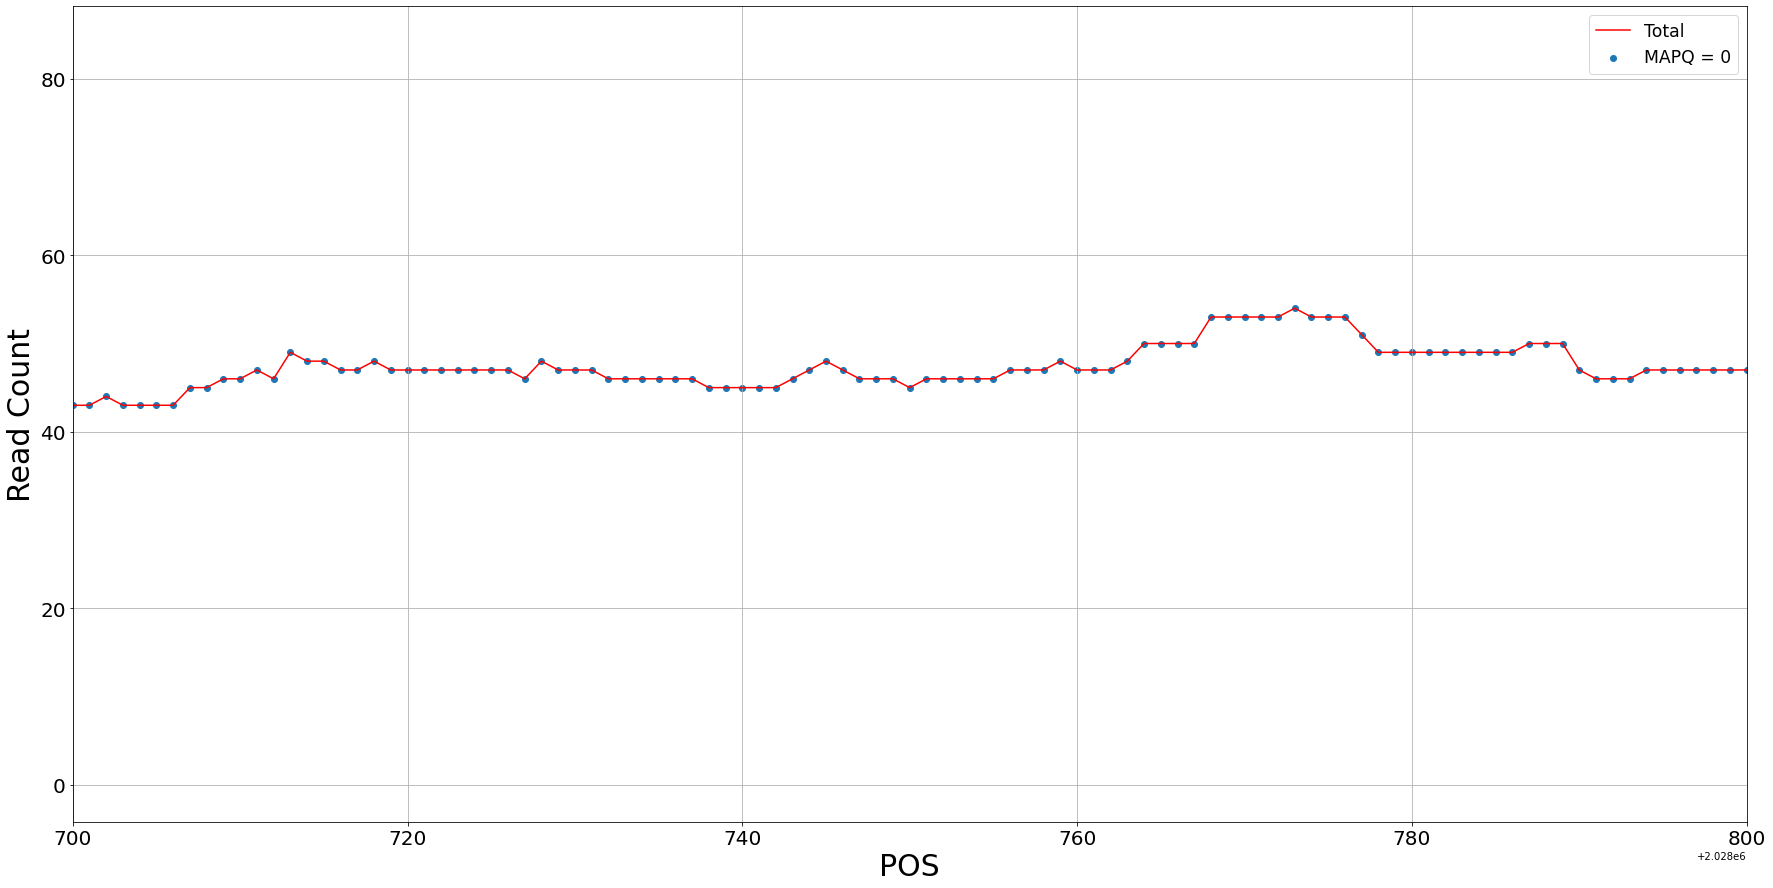

In [181]:
# Plot false NEG call at POS 2028773
fig, ax = plt.subplots()
ax.scatter(mapq200snps_mq0.start, mapq200snps_mq0.count_mapq, label='MAPQ = 0')
ax.plot(snp_200_perbase_cov.pos0, snp_200_perbase_cov.depth, label='Total', color='red')
ax.legend(fontsize='xx-large')
ax.figure.set_size_inches(30,15)
plt.xlim(2028700,2028800)
plt.xlabel('POS', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Read Count', fontsize=30)
plt.grid(b=True)
plt.savefig('TEST-H37Rv200snps_mapq0depth_2028700_2028800.png')

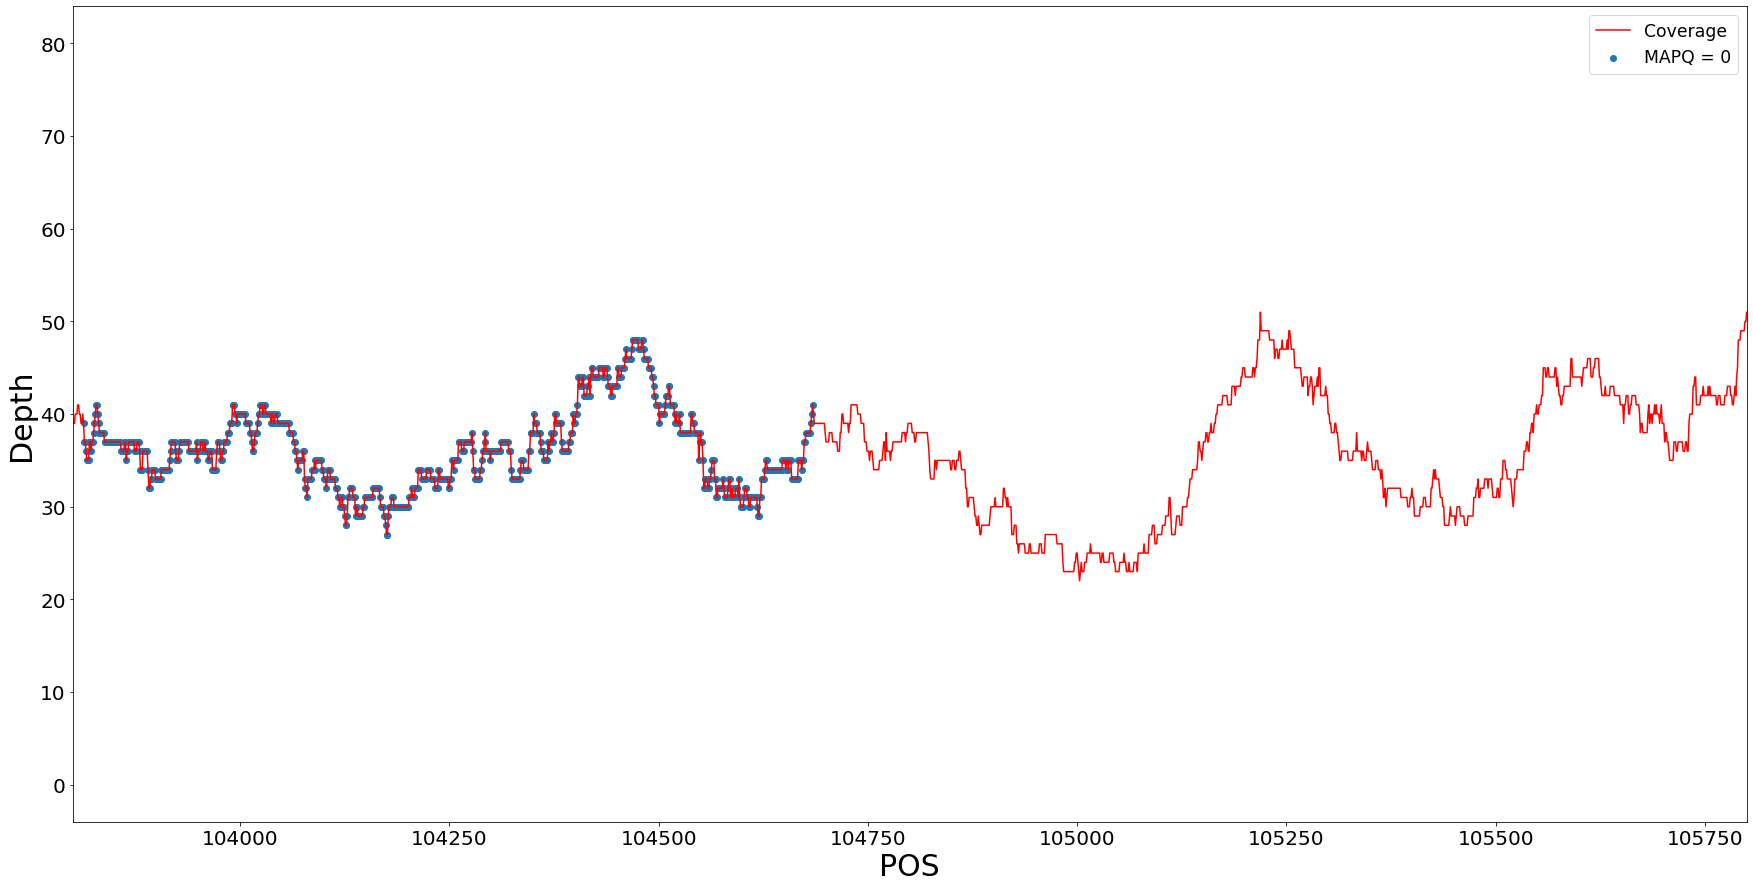

In [182]:
fig, ax = plt.subplots()
ax.scatter(ref0.start, ref0.count_mapq, label='MAPQ = 0')
ax.plot(perbase_cov.pos0, perbase_cov.depth, label='Coverage', color='red')
ax.legend(fontsize='xx-large')
ax.figure.set_size_inches(30,15)
plt.xlim(103800,105800)
plt.xlabel('POS', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Depth', fontsize=30)
plt.savefig('TEST-MTBREF_mapq0depth_103800_104800.png')

In [108]:
ref0[ref0.start > 104600]

chr    start      end min_mapq max_mapq median_mapq  \
104601   NC_000962.3   104601   104602        0       25           0   
104602   NC_000962.3   104602   104603        0       25           0   
104603   NC_000962.3   104603   104604        0       25           0   
104604   NC_000962.3   104604   104605        0       25           0   
104605   NC_000962.3   104605   104606        0       25           0   
...              ...      ...      ...      ...      ...         ...   
4319258  NC_000962.3  4319258  4319259        0       60         0.0   
4319259  NC_000962.3  4319259  4319260        0       60         0.0   
4319260  NC_000962.3  4319260  4319261        0       60         0.0   
4319261  NC_000962.3  4319261  4319262        0       60         0.0   
4319262  NC_000962.3  4319262  4319263        0       60         0.0   

         count_mapq  
104601           30  
104602           31  
104603           32  
104604           32  
104605           32  
...             ...  
4319258          58  
4319259          58  
4319260          59  
4319261          59  
4319262          61  

[56474 rows x 7 columns]

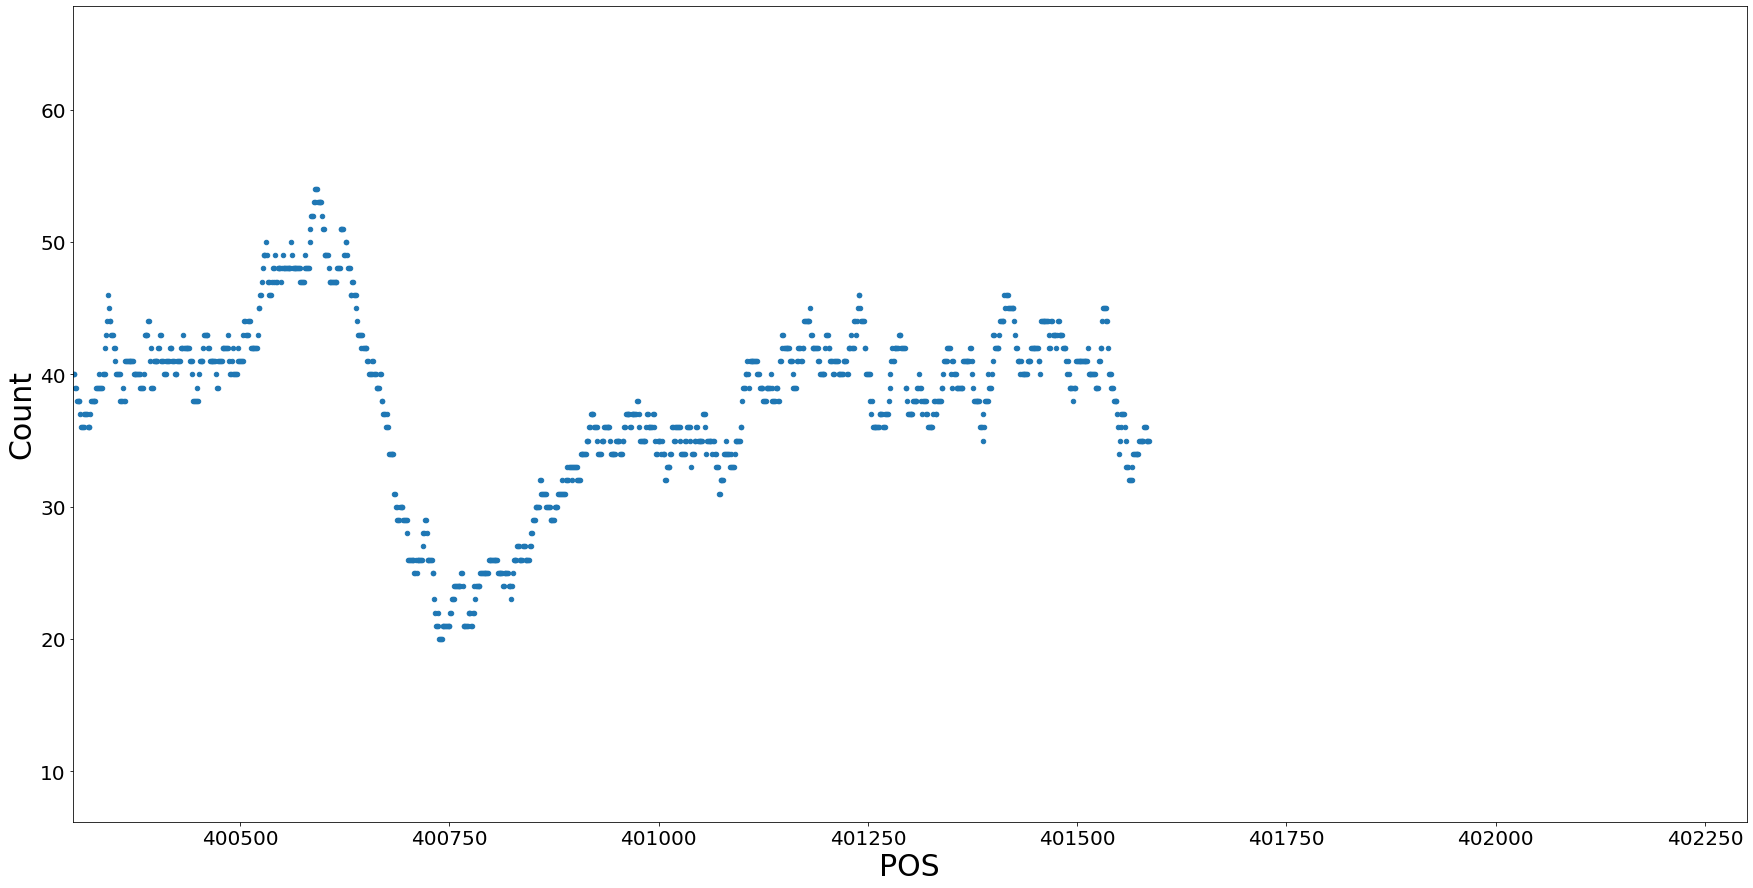

In [109]:
ref0.plot(x='start', y='count_mapq', kind='scatter', xlim=(400300,402300), figsize=(30,15), fontsize=20)
plt.xlabel('POS', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.savefig('TEST-MTBREF_count_mapq0_400300_402300.png')

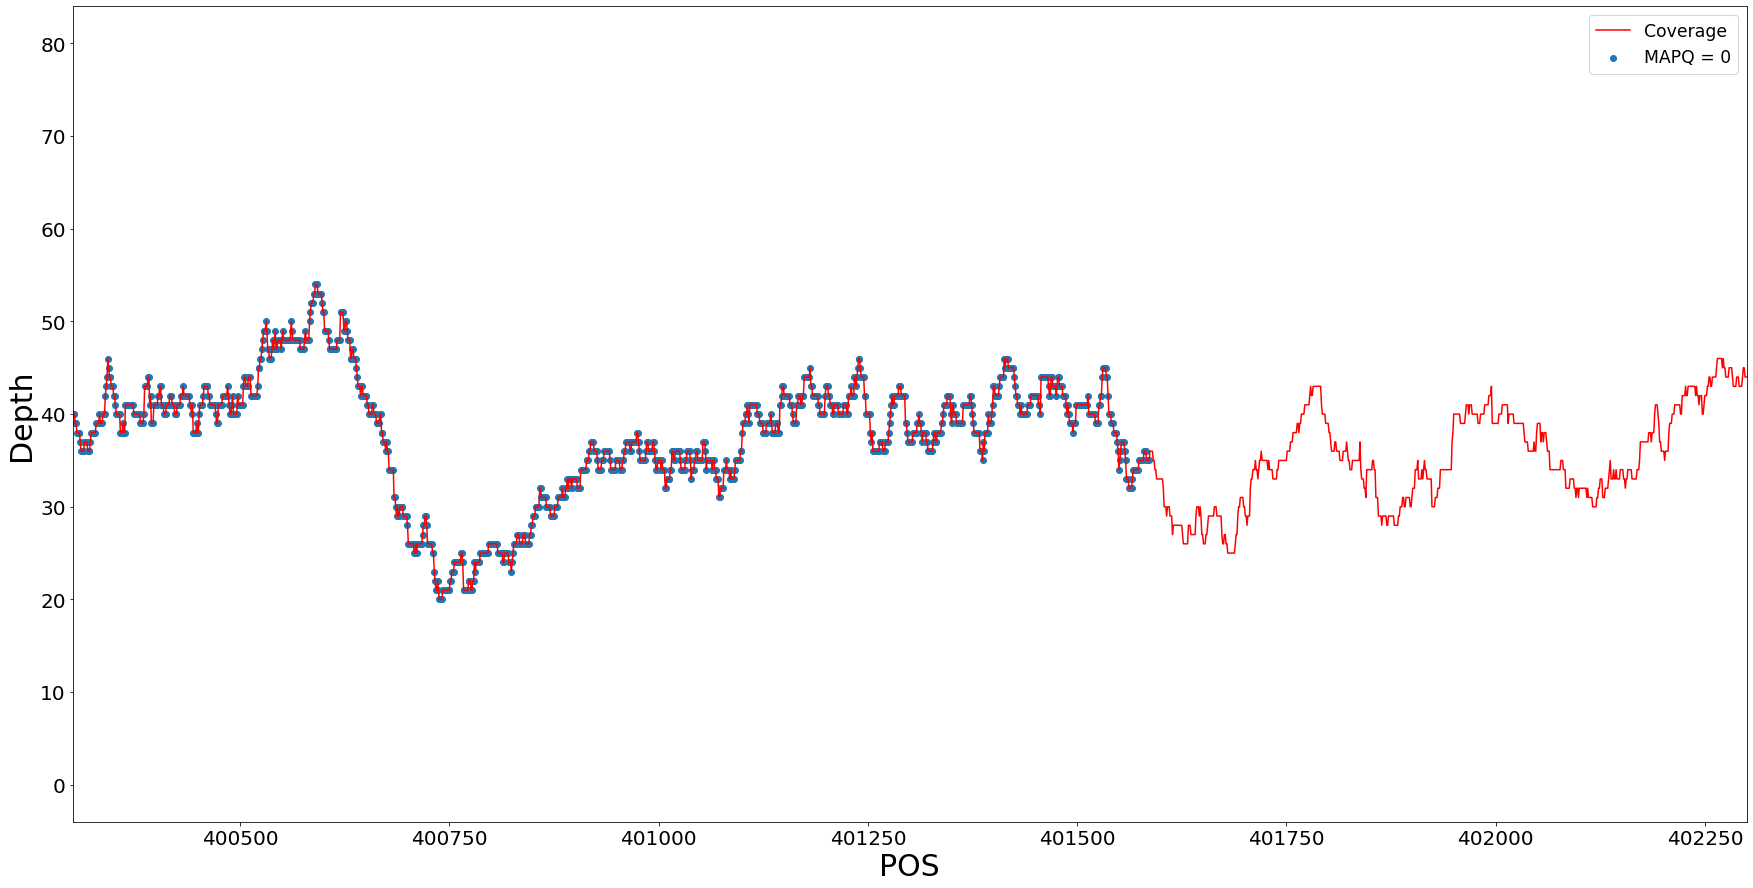

In [183]:
fig, ax = plt.subplots()
ax.scatter(ref0.start, ref0.count_mapq, label='MAPQ = 0')
ax.plot(perbase_cov.pos0, perbase_cov.depth, label='Coverage', color='red')
ax.legend(fontsize='xx-large')
ax.figure.set_size_inches(30,15)
plt.xlim(400300,402300)
plt.xlabel('POS', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Depth', fontsize=30)
plt.savefig('TEST-MTBREF_mapq0depth_400300_402300.png')

In [111]:
ref0[ref0.start > 401600]

chr    start      end min_mapq max_mapq median_mapq  \
606601   NC_000962.3   606601   606602        0       60         0.0   
606602   NC_000962.3   606602   606603        0       60         0.0   
606603   NC_000962.3   606603   606604        0       60         0.0   
606604   NC_000962.3   606604   606605        0       60         0.0   
606605   NC_000962.3   606605   606606        0       60         0.0   
...              ...      ...      ...      ...      ...         ...   
4319258  NC_000962.3  4319258  4319259        0       60         0.0   
4319259  NC_000962.3  4319259  4319260        0       60         0.0   
4319260  NC_000962.3  4319260  4319261        0       60         0.0   
4319261  NC_000962.3  4319261  4319262        0       60         0.0   
4319262  NC_000962.3  4319262  4319263        0       60         0.0   

         count_mapq  
606601           45  
606602           44  
606603           44  
606604           44  
606605           44  
...             ...  
4319258          58  
4319259          58  
4319260          59  
4319261          59  
4319262          61  

[55045 rows x 7 columns]

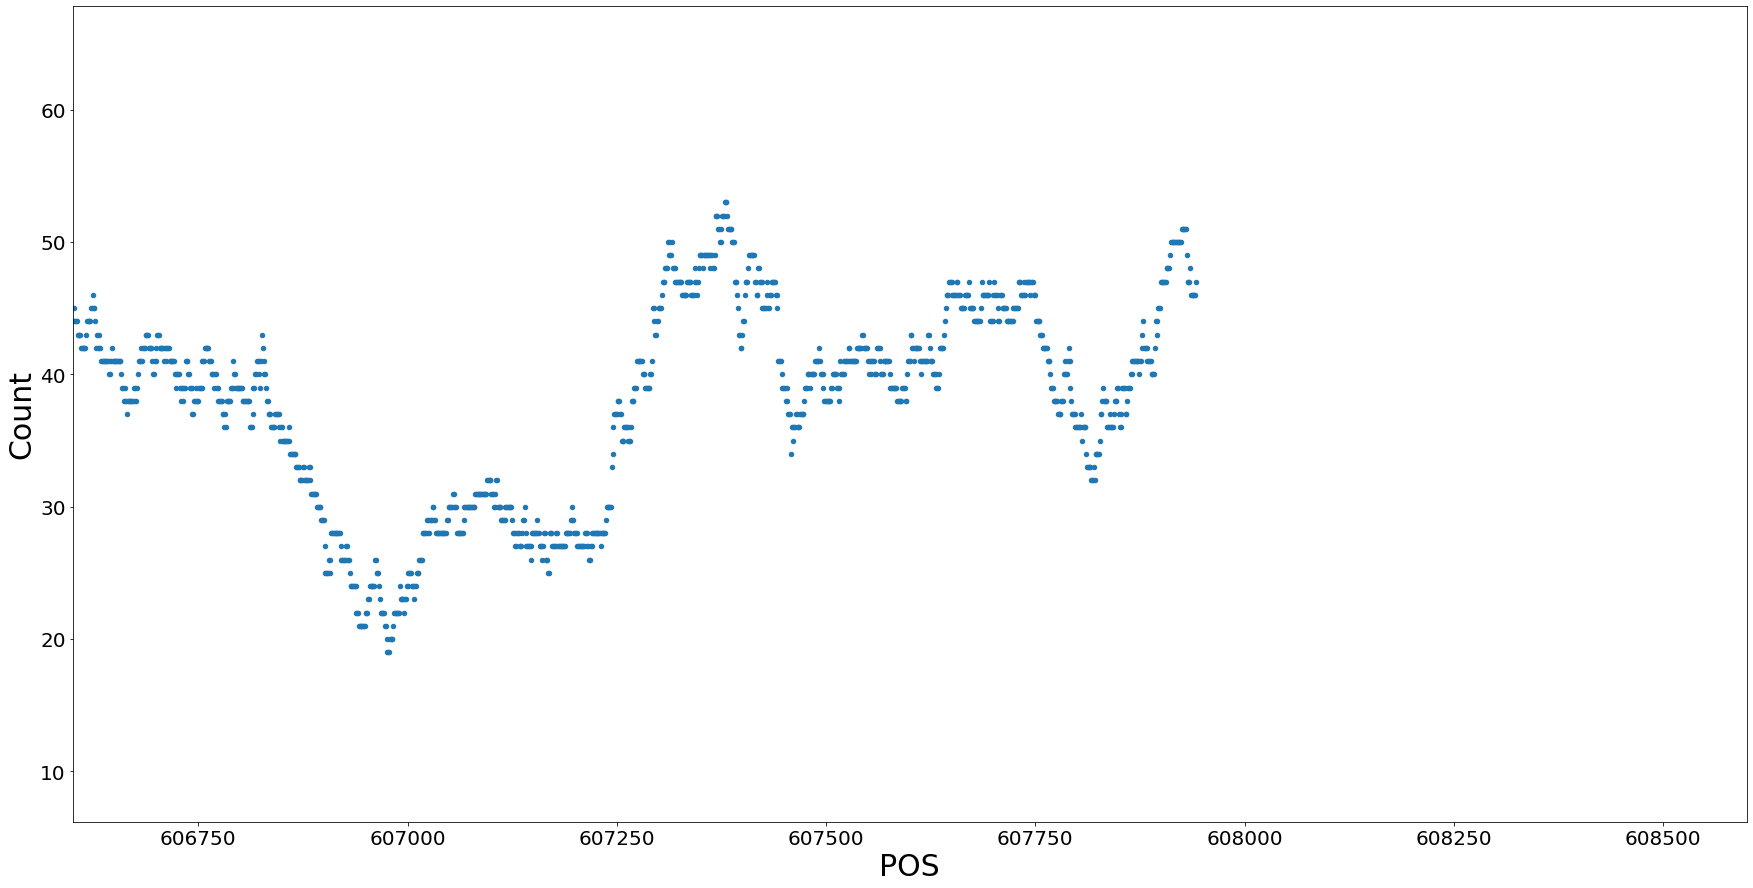

In [112]:
ref0.plot(x='start', y='count_mapq', kind='scatter', xlim=(606600,608600), figsize=(30,15), fontsize=20)
plt.xlabel('POS', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.savefig('TEST-MTBREF_count_mapq0_606600_608600.png')

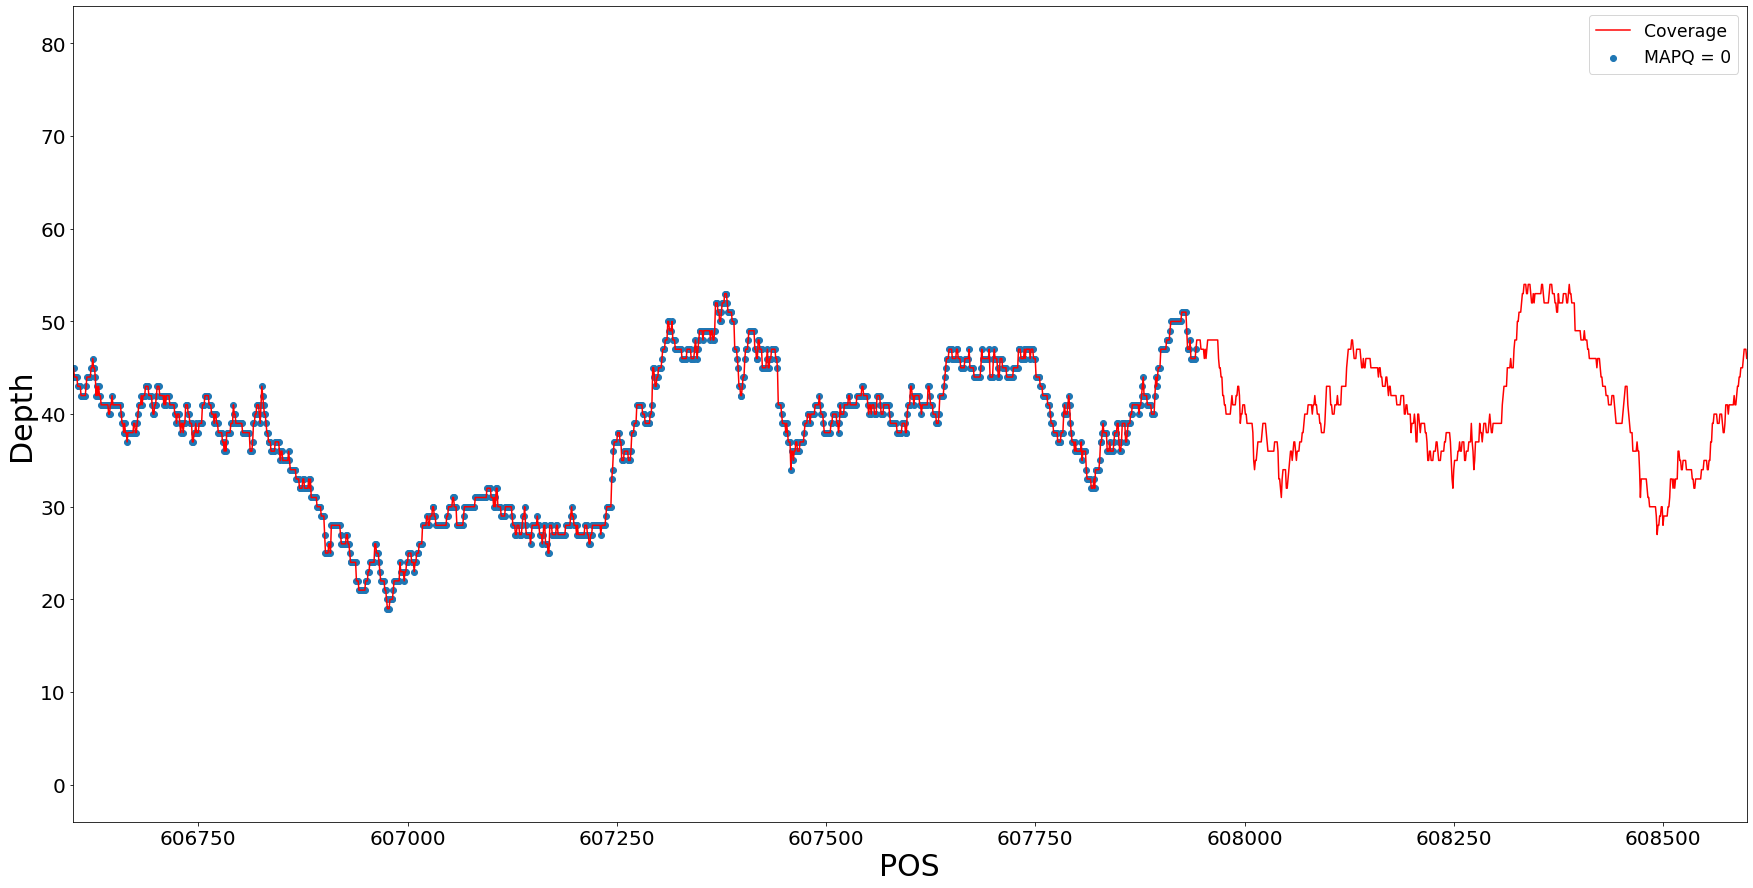

In [184]:
fig, ax = plt.subplots()
ax.scatter(ref0.start, ref0.count_mapq, label='MAPQ = 0')
ax.plot(perbase_cov.pos0, perbase_cov.depth, label='Coverage', color='red')
ax.legend(fontsize='xx-large')
ax.figure.set_size_inches(30,15)
plt.xlim(606600,608600)
plt.xlabel('POS', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Depth', fontsize=30)
plt.savefig('TEST-MTBREF_mapq0depth_606600_608600.png')

In [114]:
ref0[ref0.start > 608000]

chr    start      end min_mapq max_mapq median_mapq  \
889133   NC_000962.3   889133   889134        0       60         0.0   
889134   NC_000962.3   889134   889135        0       60         0.0   
889135   NC_000962.3   889135   889136        0       60         0.0   
889136   NC_000962.3   889136   889137        0       60         0.0   
889137   NC_000962.3   889137   889138        0       60         0.0   
...              ...      ...      ...      ...      ...         ...   
4319258  NC_000962.3  4319258  4319259        0       60         0.0   
4319259  NC_000962.3  4319259  4319260        0       60         0.0   
4319260  NC_000962.3  4319260  4319261        0       60         0.0   
4319261  NC_000962.3  4319261  4319262        0       60         0.0   
4319262  NC_000962.3  4319262  4319263        0       60         0.0   

         count_mapq  
889133           39  
889134           40  
889135           40  
889136           40  
889137           40  
...             ...  
4319258          58  
4319259          58  
4319260          59  
4319261          59  
4319262          61  

[53703 rows x 7 columns]

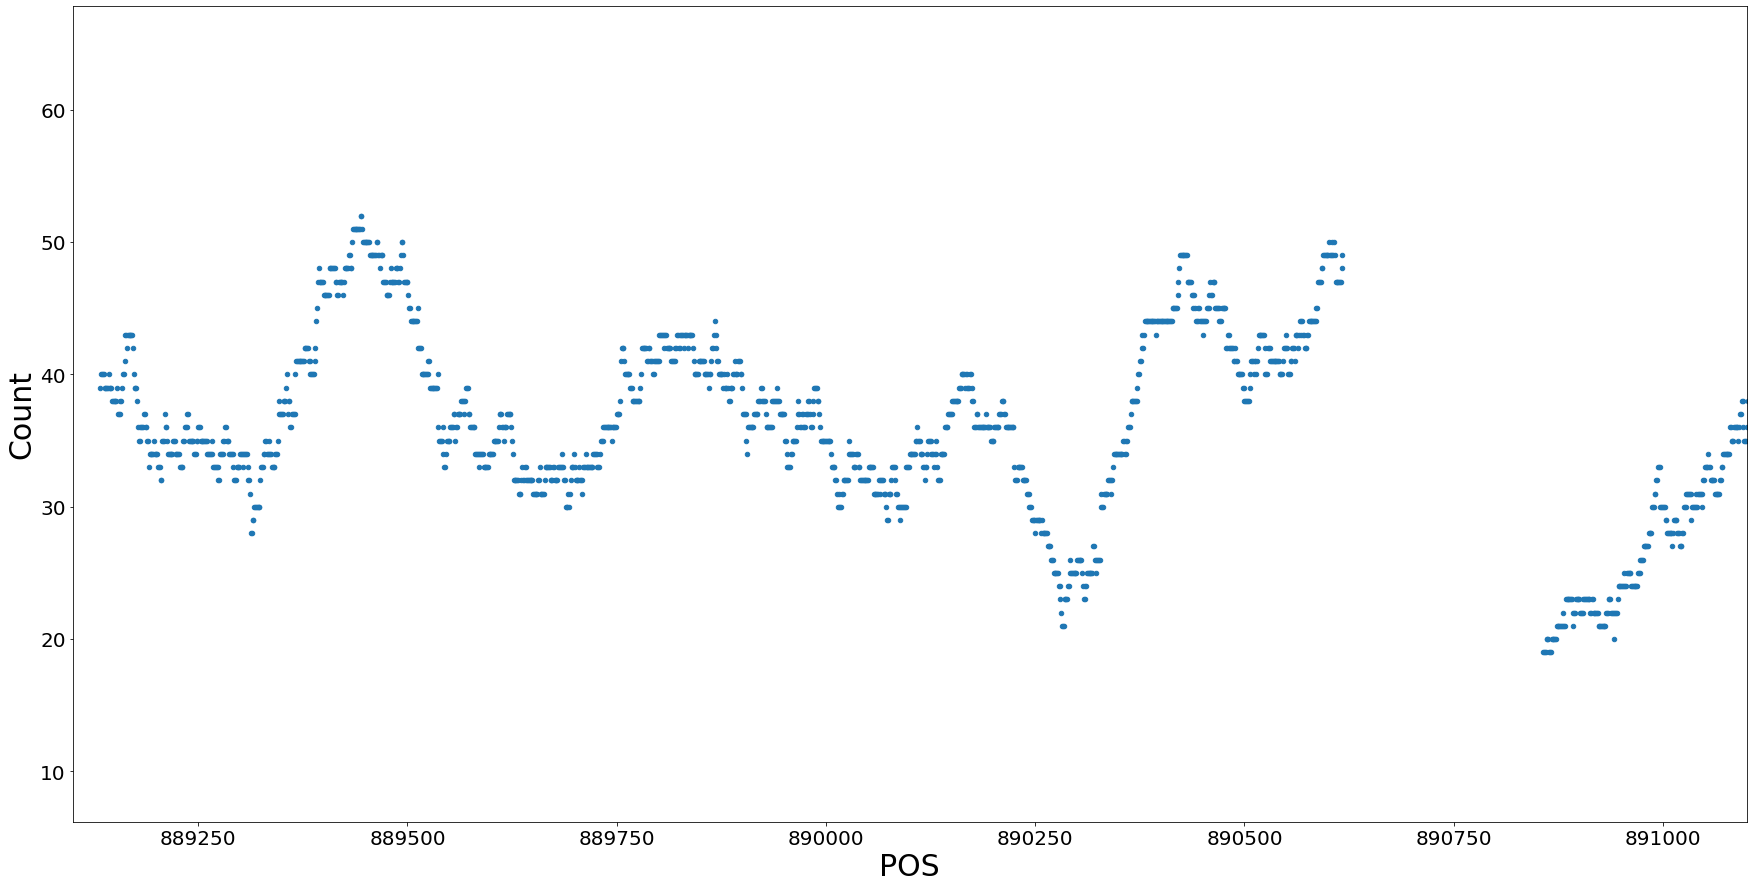

In [115]:
ref0.plot(x='start', y='count_mapq', kind='scatter', xlim=(889100,891100), figsize=(30,15), fontsize=20)
plt.xlabel('POS', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.savefig('TEST-MTBREF_count_mapq0_889100_891100.png')

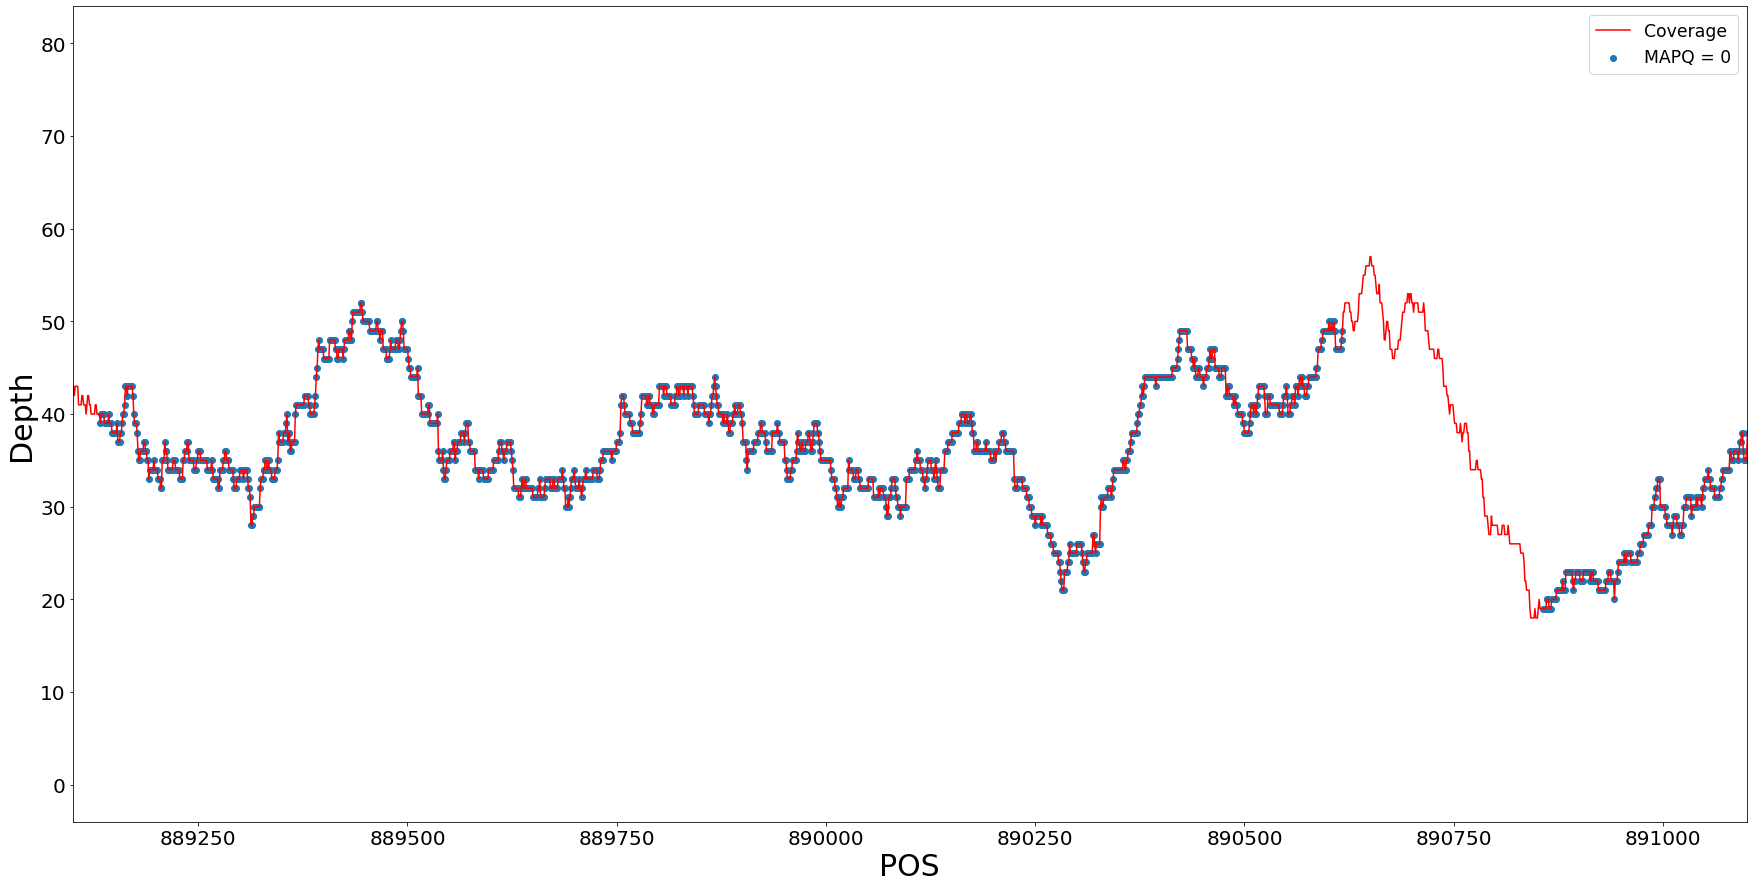

In [185]:
fig, ax = plt.subplots()
ax.scatter(ref0.start, ref0.count_mapq, label='MAPQ = 0')
ax.plot(perbase_cov.pos0, perbase_cov.depth, label='Coverage', color='red')
ax.legend(fontsize='xx-large')
ax.figure.set_size_inches(30,15)
plt.xlim(889100,891100)
plt.xlabel('POS', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Depth', fontsize=30)
plt.savefig('TEST-MTBREF_mapq0depth_889100_891100.png')

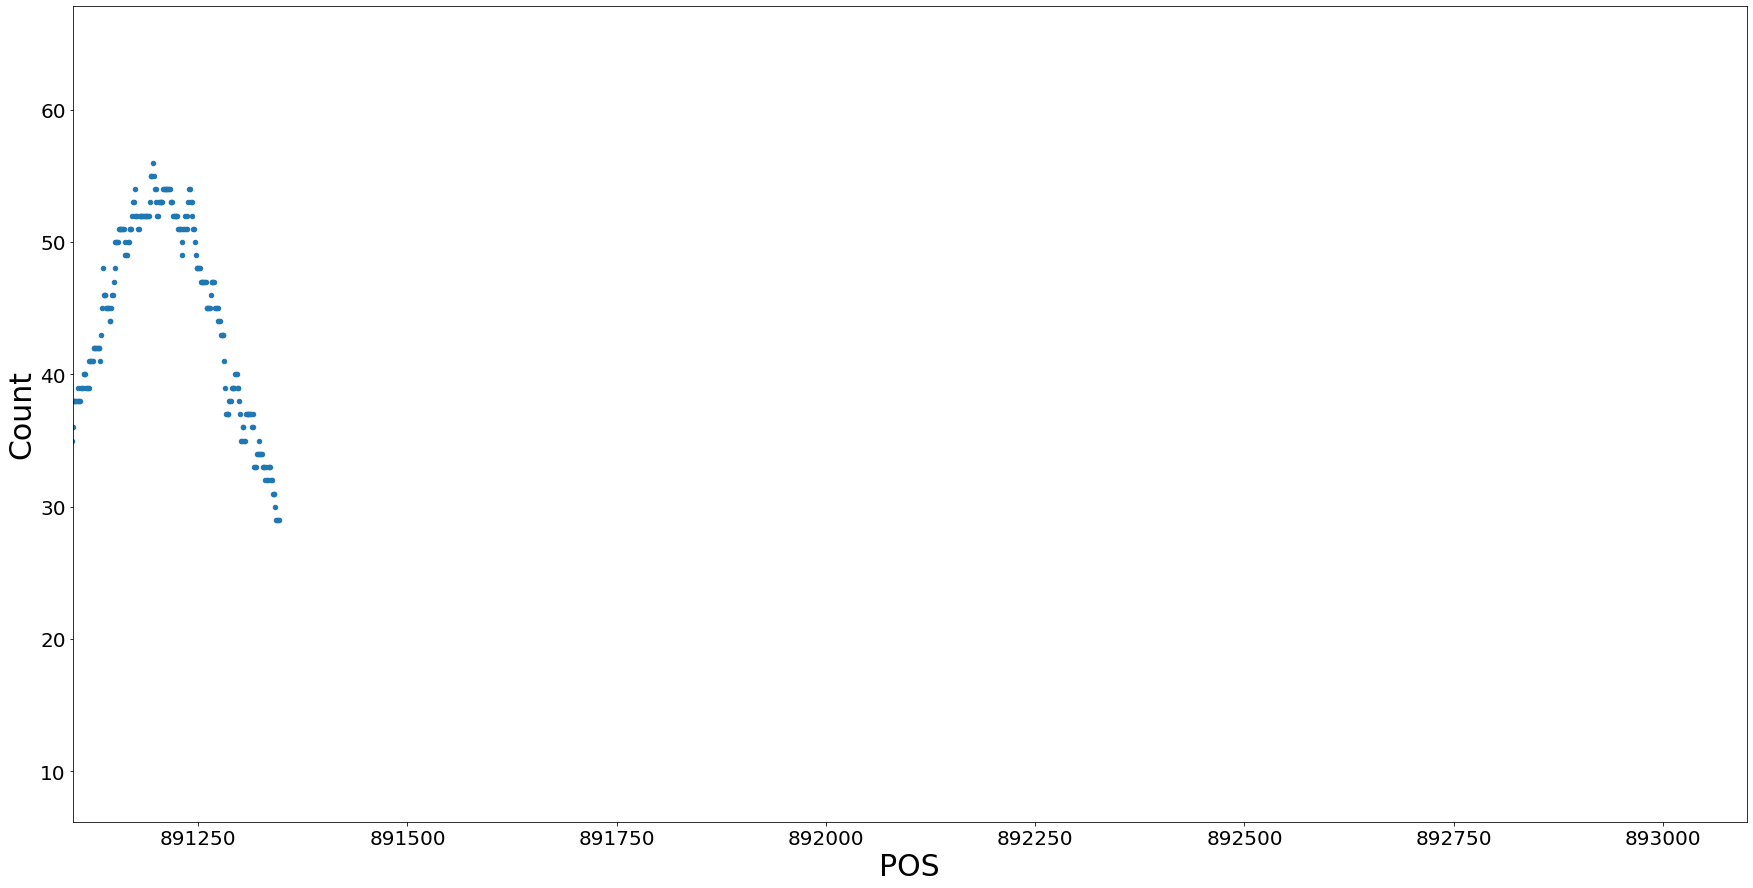

In [117]:
ref0.plot(x='start', y='count_mapq', kind='scatter', xlim=(891100,893100), figsize=(30,15), fontsize=20)
plt.xlabel('POS', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.savefig('TEST-MTBREF_count_mapq0_891100_893100.png')

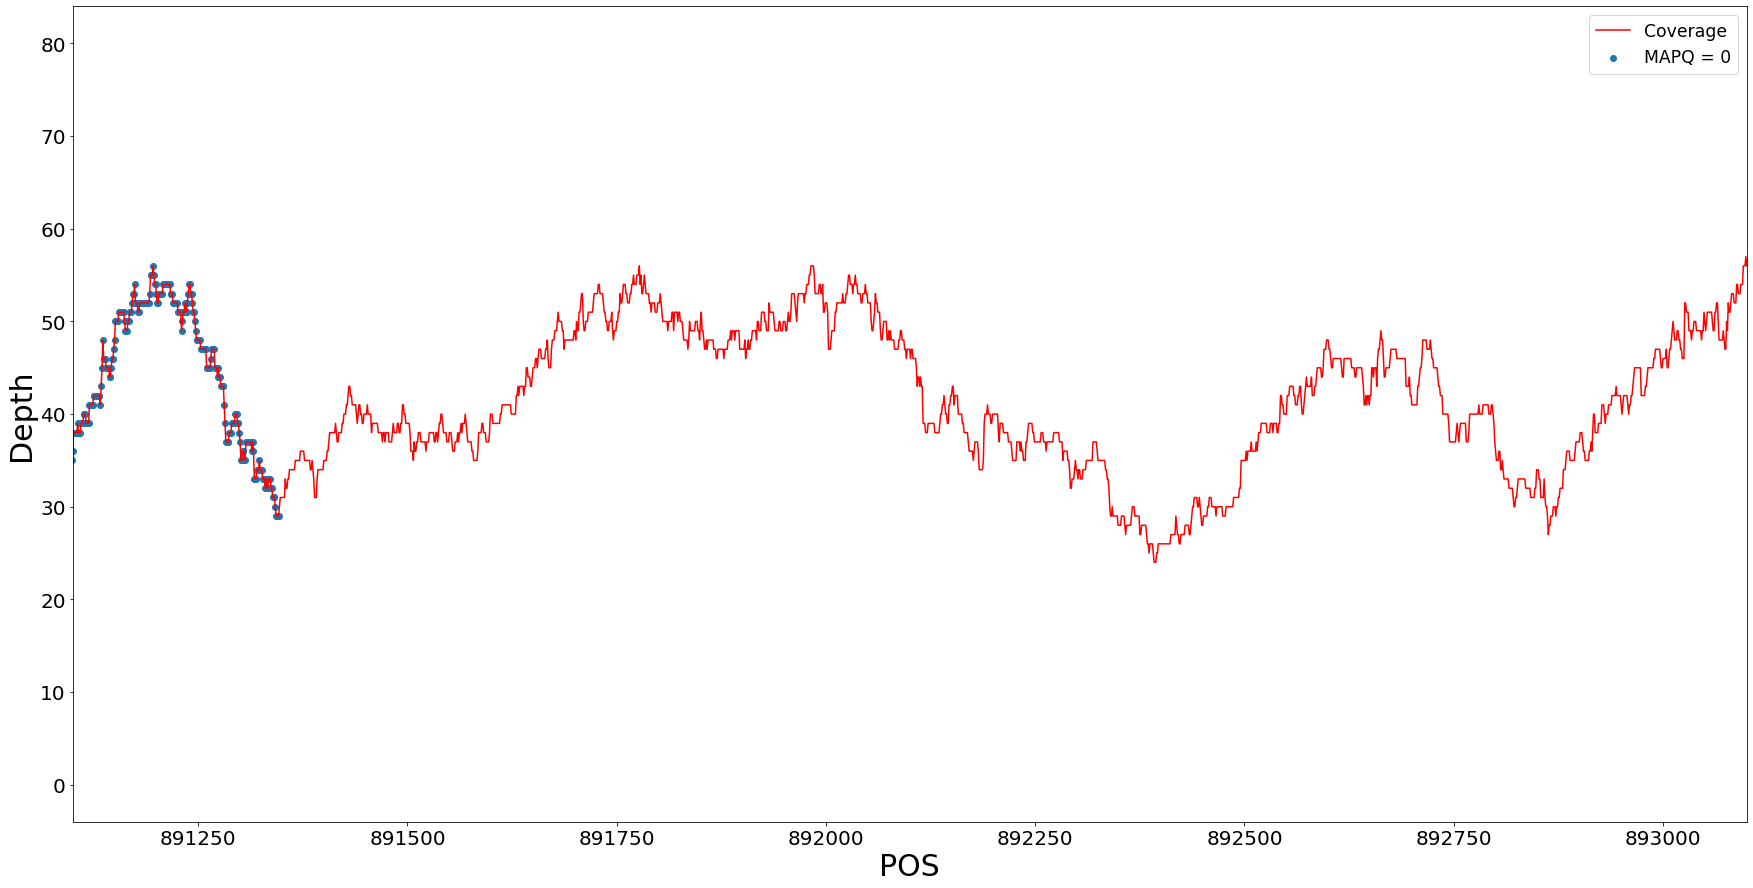

In [186]:
fig, ax = plt.subplots()
ax.scatter(ref0.start, ref0.count_mapq, label='MAPQ = 0')
ax.plot(perbase_cov.pos0, perbase_cov.depth, label='Coverage', color='red')
ax.legend(fontsize='xx-large')
ax.figure.set_size_inches(30,15)
plt.xlim(891100,893100)
plt.xlabel('POS', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Depth', fontsize=30)
plt.savefig('TEST-MTBREF_mapq0depth_891100_893100.png')

In [119]:
ref0[ref0.start > 891400]

chr    start      end min_mapq max_mapq median_mapq  \
908294   NC_000962.3   908294   908295        0       60         0.0   
908295   NC_000962.3   908295   908296        0       60         0.0   
908296   NC_000962.3   908296   908297        0       60         0.0   
908297   NC_000962.3   908297   908298        0       60         0.0   
908298   NC_000962.3   908298   908299        0       60         0.0   
...              ...      ...      ...      ...      ...         ...   
4319258  NC_000962.3  4319258  4319259        0       60         0.0   
4319259  NC_000962.3  4319259  4319260        0       60         0.0   
4319260  NC_000962.3  4319260  4319261        0       60         0.0   
4319261  NC_000962.3  4319261  4319262        0       60         0.0   
4319262  NC_000962.3  4319262  4319263        0       60         0.0   

         count_mapq  
908294           35  
908295           35  
908296           35  
908297           35  
908298           34  
...             ...  
4319258          58  
4319259          58  
4319260          59  
4319261          59  
4319262          61  

[51728 rows x 7 columns]

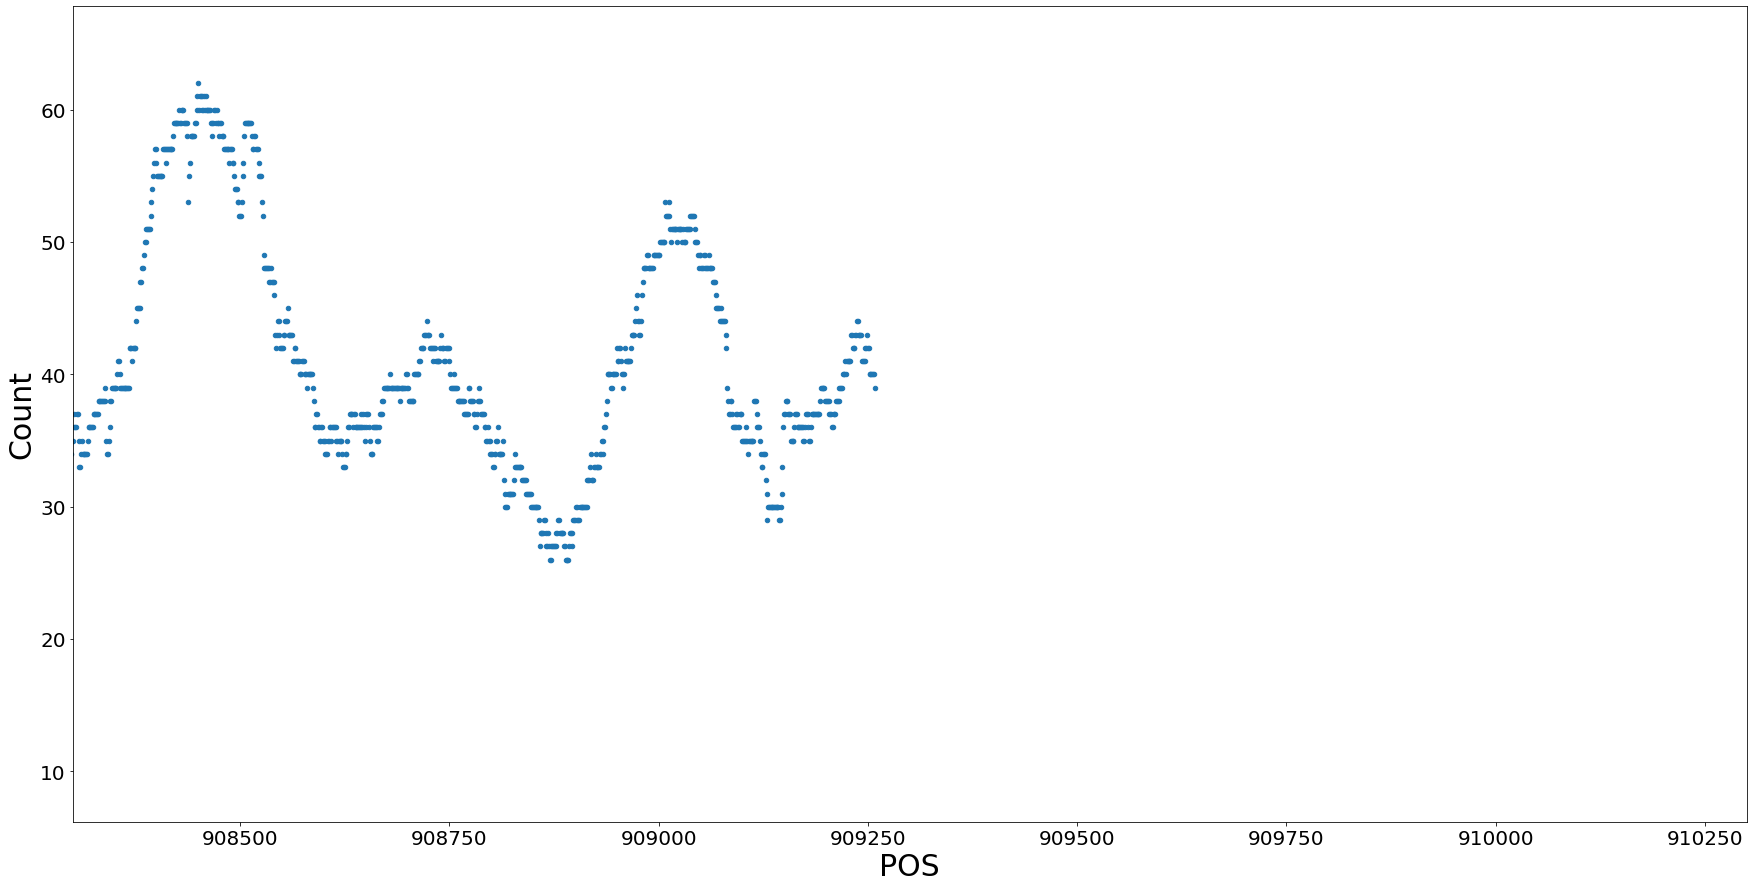

In [120]:
ref0.plot(x='start', y='count_mapq', kind='scatter', xlim=(908300,910300), figsize=(30,15), fontsize=20)
plt.xlabel('POS', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.savefig('TEST-MTBREF_count_mapq0_908300_910300.png')

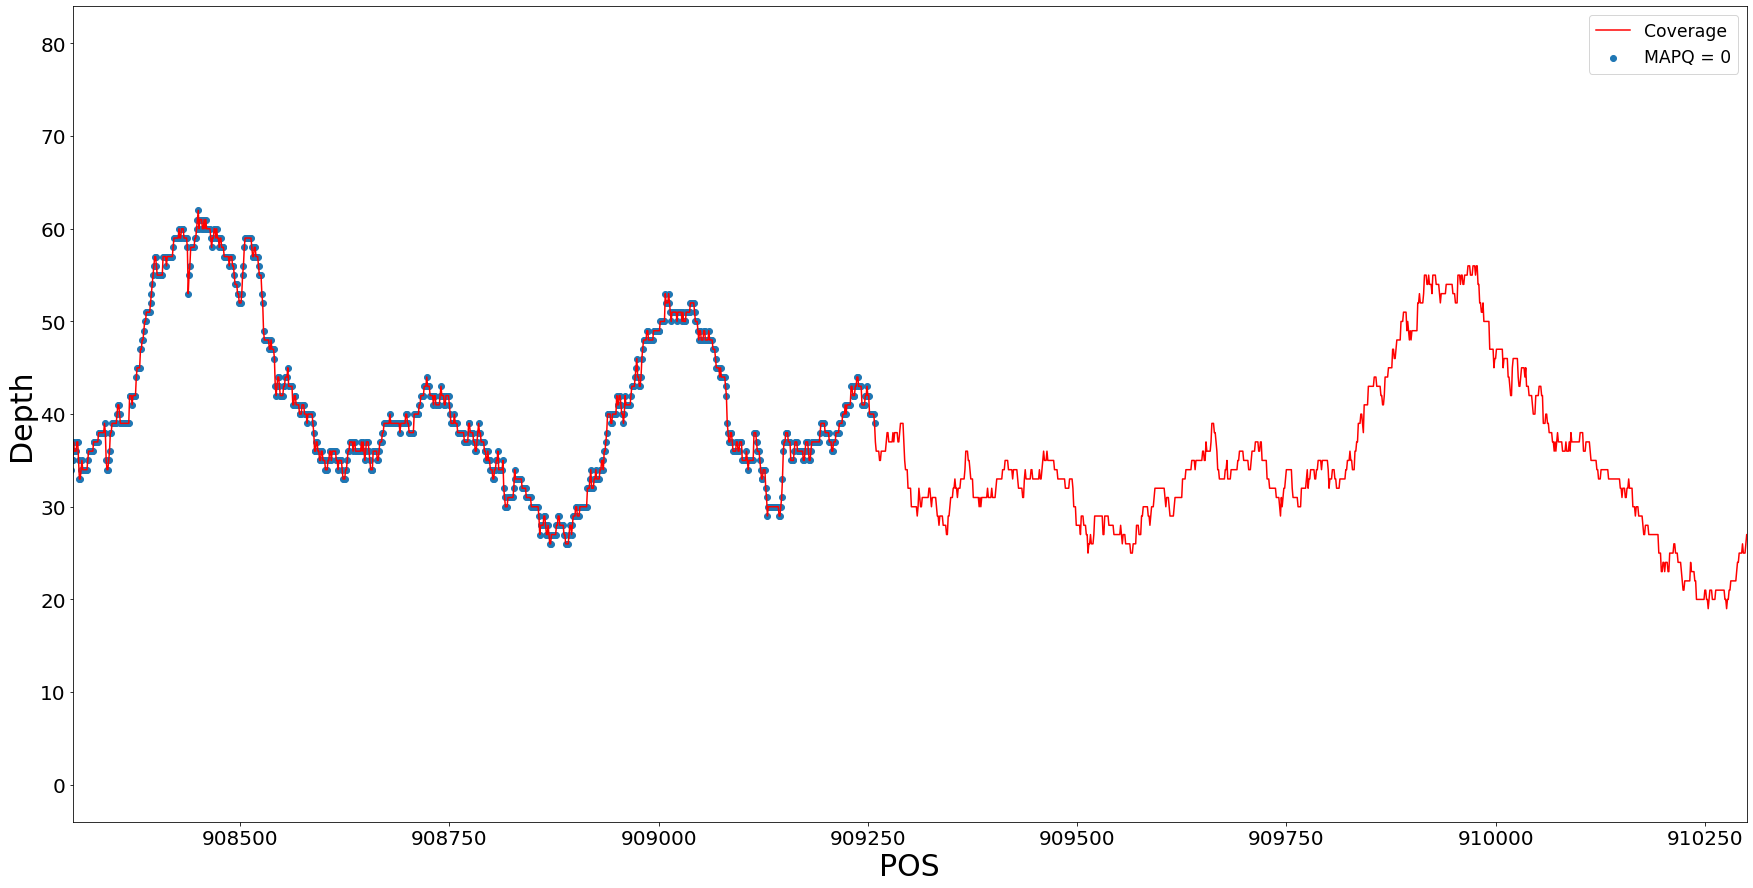

In [187]:
fig, ax = plt.subplots()
ax.scatter(ref0.start, ref0.count_mapq, label='MAPQ = 0')
ax.plot(perbase_cov.pos0, perbase_cov.depth, label='Coverage', color='red')
ax.legend(fontsize='xx-large')
ax.figure.set_size_inches(30,15)
plt.xlim(908300,910300)
plt.xlabel('POS', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Depth', fontsize=30)
plt.savefig('TEST-MTBREF_mapq0depth_908300_910300.png')

In [122]:
ref0[ref0.start > 909200]

chr    start      end min_mapq max_mapq median_mapq  \
909201   NC_000962.3   909201   909202        0       40         0.0   
909202   NC_000962.3   909202   909203        0       40         0.0   
909203   NC_000962.3   909203   909204        0       40         0.0   
909204   NC_000962.3   909204   909205        0       40         0.0   
909205   NC_000962.3   909205   909206        0       40         0.0   
...              ...      ...      ...      ...      ...         ...   
4319258  NC_000962.3  4319258  4319259        0       60         0.0   
4319259  NC_000962.3  4319259  4319260        0       60         0.0   
4319260  NC_000962.3  4319260  4319261        0       60         0.0   
4319261  NC_000962.3  4319261  4319262        0       60         0.0   
4319262  NC_000962.3  4319262  4319263        0       60         0.0   

         count_mapq  
909201           38  
909202           38  
909203           38  
909204           37  
909205           37  
...             ...  
4319258          58  
4319259          58  
4319260          59  
4319261          59  
4319262          61  

[50821 rows x 7 columns]

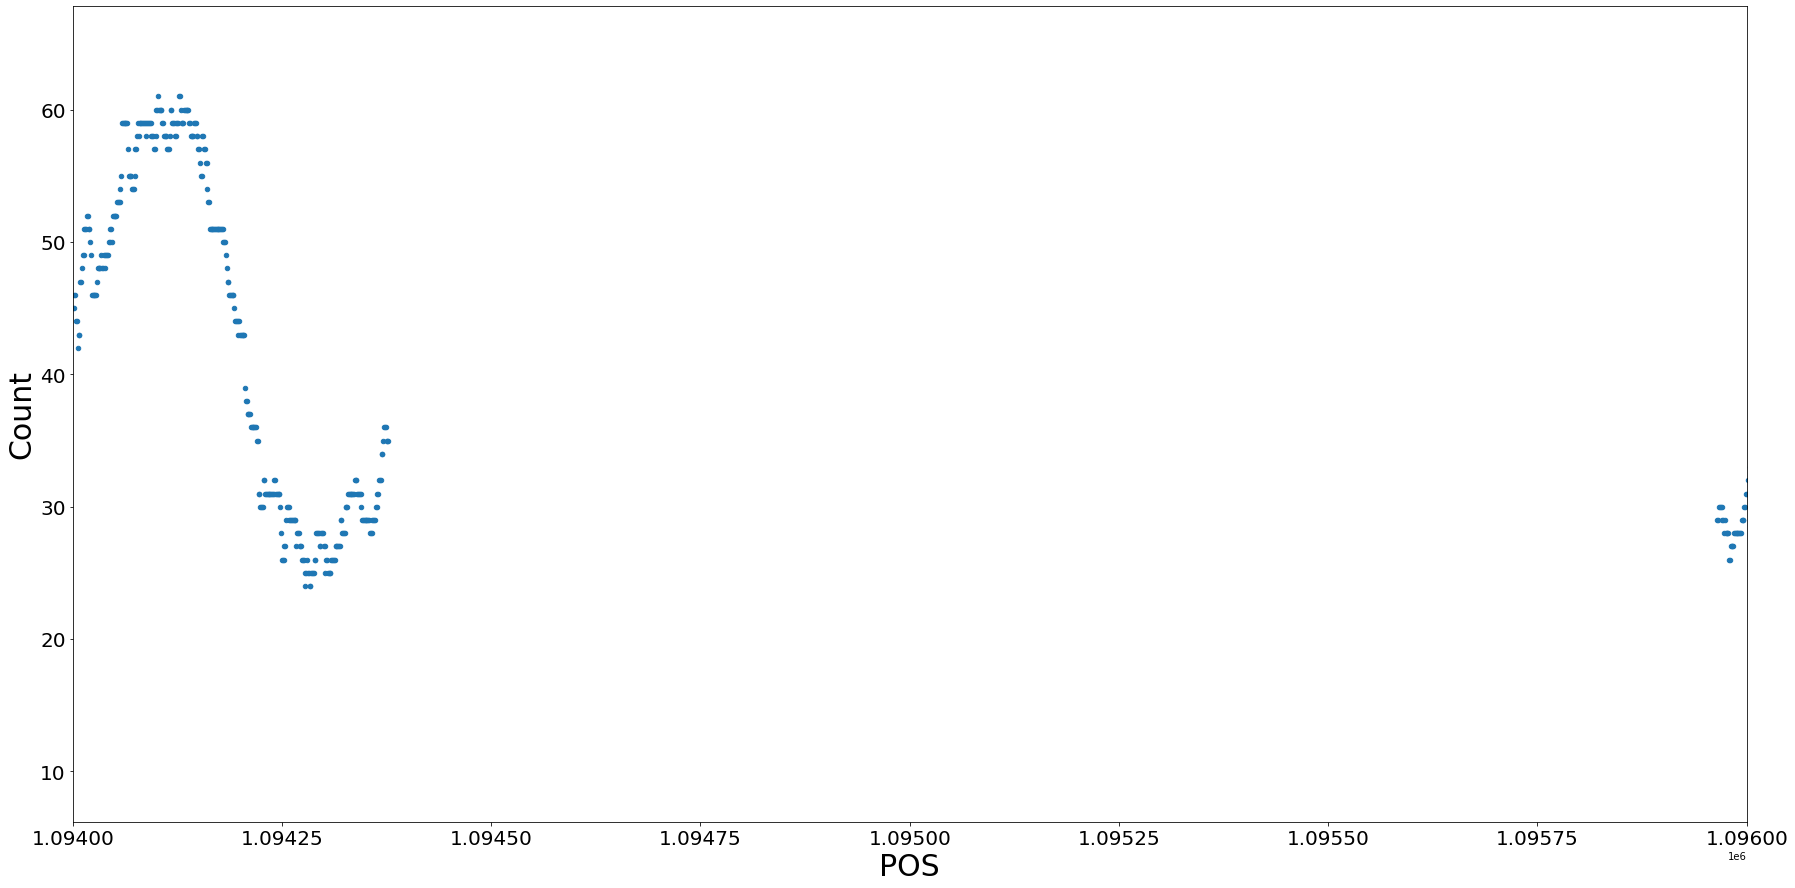

In [123]:
ref0.plot(x='start', y='count_mapq', kind='scatter', xlim=(1094000,1096000), figsize=(30,15), fontsize=20)
plt.xlabel('POS', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.savefig('TEST-MTBREF_count_mapq0_1094000_1096000.png')

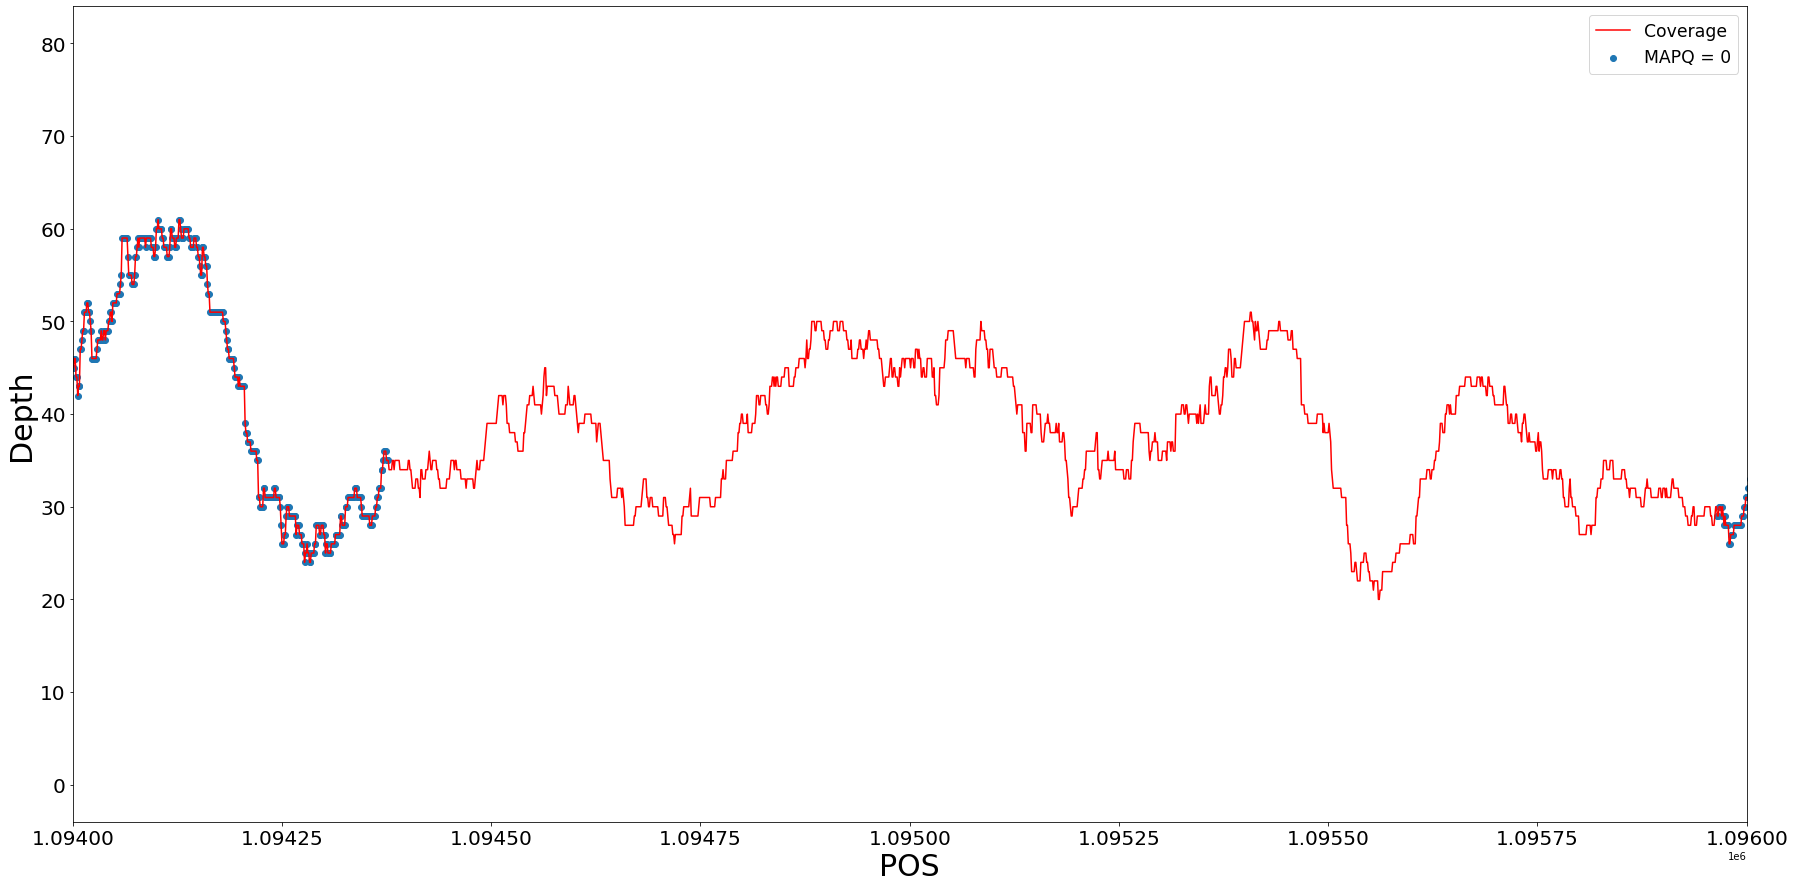

In [188]:
fig, ax = plt.subplots()
ax.scatter(ref0.start, ref0.count_mapq, label='MAPQ = 0')
ax.plot(perbase_cov.pos0, perbase_cov.depth, label='Coverage', color='red')
ax.legend(fontsize='xx-large')
ax.figure.set_size_inches(30,15)
plt.xlim(1094000,1096000)
plt.xlabel('POS', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Depth', fontsize=30)
plt.savefig('TEST-MTBREF_mapq0depth_1094000_1096000.png')

In [125]:
ref0[ref0.start > 1094500]

chr    start      end min_mapq max_mapq median_mapq  \
1095965  NC_000962.3  1095965  1095966        0       60         0.0   
1095966  NC_000962.3  1095966  1095967        0       60         0.0   
1095967  NC_000962.3  1095967  1095968        0       60         0.0   
1095968  NC_000962.3  1095968  1095969        0       60         0.0   
1095969  NC_000962.3  1095969  1095970        0       60         0.0   
...              ...      ...      ...      ...      ...         ...   
4319258  NC_000962.3  4319258  4319259        0       60         0.0   
4319259  NC_000962.3  4319259  4319260        0       60         0.0   
4319260  NC_000962.3  4319260  4319261        0       60         0.0   
4319261  NC_000962.3  4319261  4319262        0       60         0.0   
4319262  NC_000962.3  4319262  4319263        0       60         0.0   

         count_mapq  
1095965          29  
1095966          29  
1095967          30  
1095968          30  
1095969          30  
...             ...  
4319258          58  
4319259          58  
4319260          59  
4319261          59  
4319262          61  

[50385 rows x 7 columns]

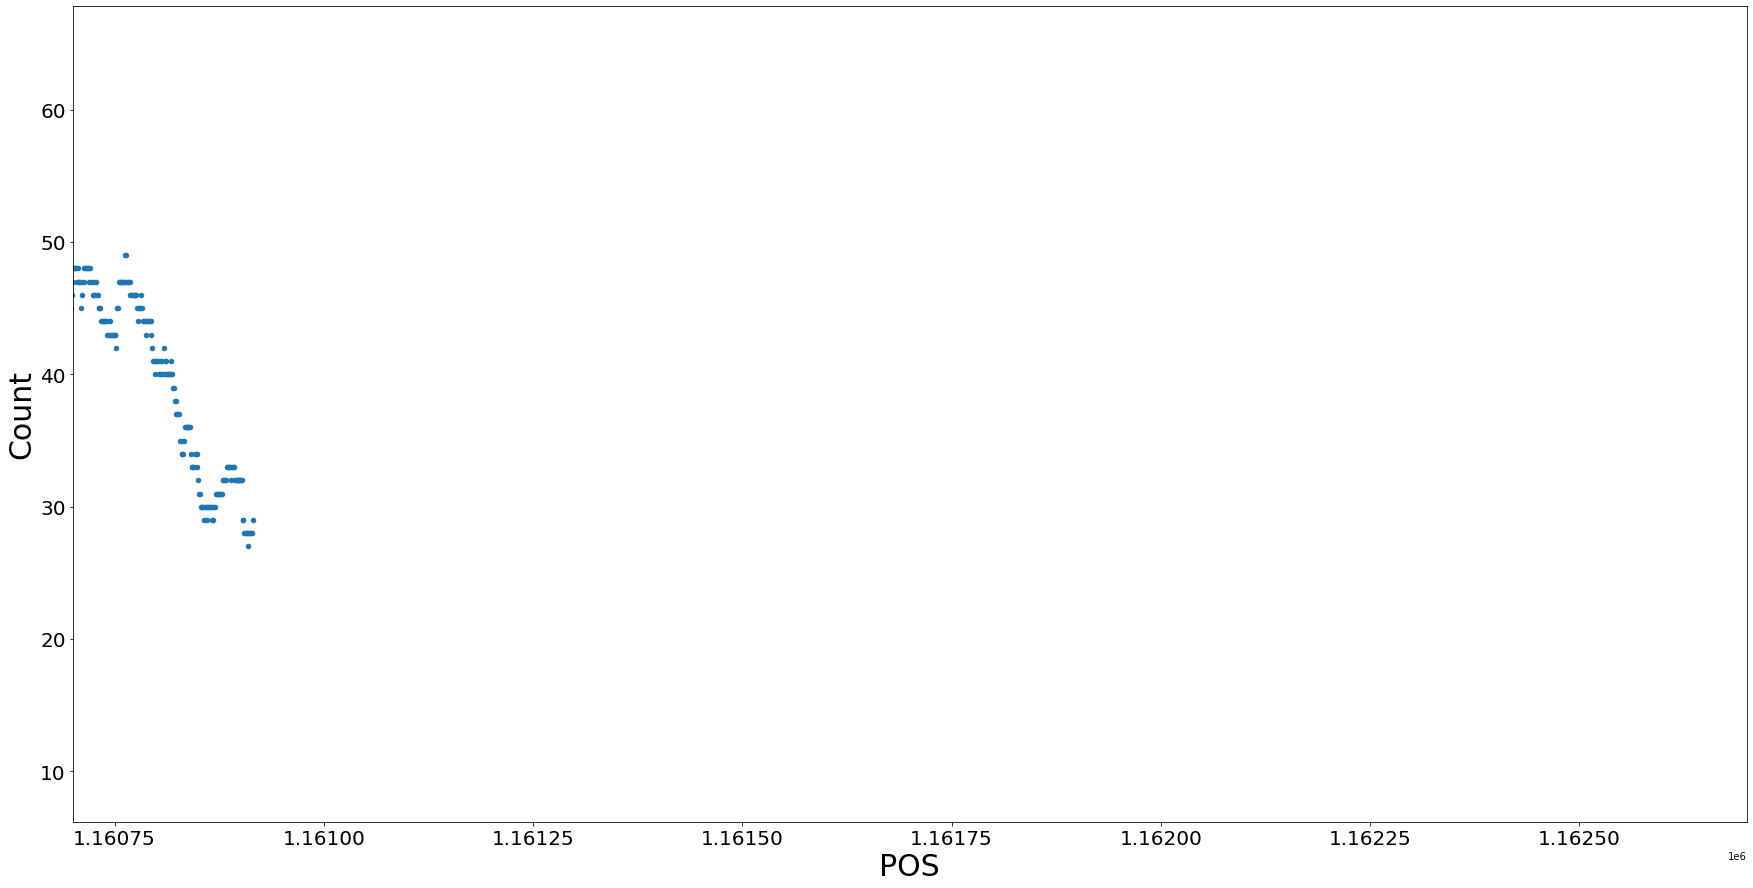

In [126]:
ref0.plot(x='start', y='count_mapq', kind='scatter', xlim=(1160700,1162700), figsize=(30,15), fontsize=20)
plt.xlabel('POS', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.savefig('TEST-MTBREF_count_mapq0_1160700_1162700.png')

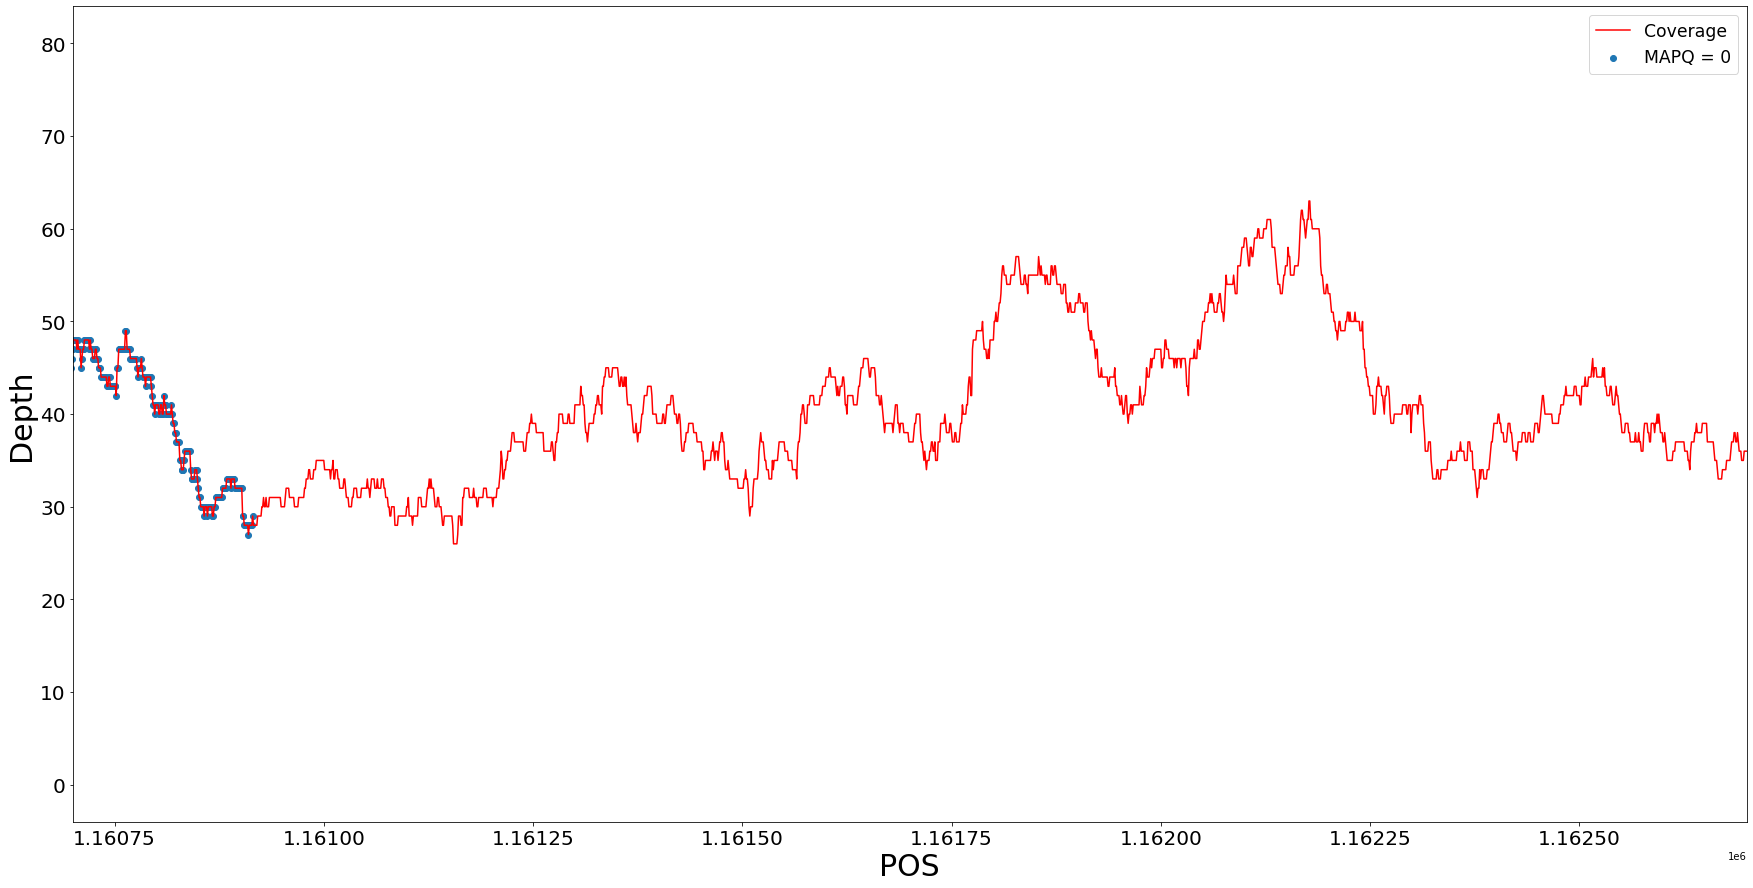

In [189]:
fig, ax = plt.subplots()
ax.scatter(ref0.start, ref0.count_mapq, label='MAPQ = 0')
ax.plot(perbase_cov.pos0, perbase_cov.depth, label='Coverage', color='red')
ax.legend(fontsize='xx-large')
ax.figure.set_size_inches(30,15)
plt.xlim(1160700,1162700)
plt.xlabel('POS', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Depth', fontsize=30)
plt.savefig('TEST-MTBREF_mapq0depth_1160700_1162700.png')

In [128]:
ref0[ref0.start > 1160900]

chr    start      end min_mapq max_mapq median_mapq  \
1160901  NC_000962.3  1160901  1160902        0       56         0.0   
1160902  NC_000962.3  1160902  1160903        0       56         0.0   
1160903  NC_000962.3  1160903  1160904        0       56         0.0   
1160904  NC_000962.3  1160904  1160905        0       56         0.0   
1160905  NC_000962.3  1160905  1160906        0       56         0.0   
...              ...      ...      ...      ...      ...         ...   
4319258  NC_000962.3  4319258  4319259        0       60         0.0   
4319259  NC_000962.3  4319259  4319260        0       60         0.0   
4319260  NC_000962.3  4319260  4319261        0       60         0.0   
4319261  NC_000962.3  4319261  4319262        0       60         0.0   
4319262  NC_000962.3  4319262  4319263        0       60         0.0   

         count_mapq  
1160901          32  
1160902          32  
1160903          29  
1160904          29  
1160905          28  
...             ...  
4319258          58  
4319259          58  
4319260          59  
4319261          59  
4319262          61  

[49994 rows x 7 columns]

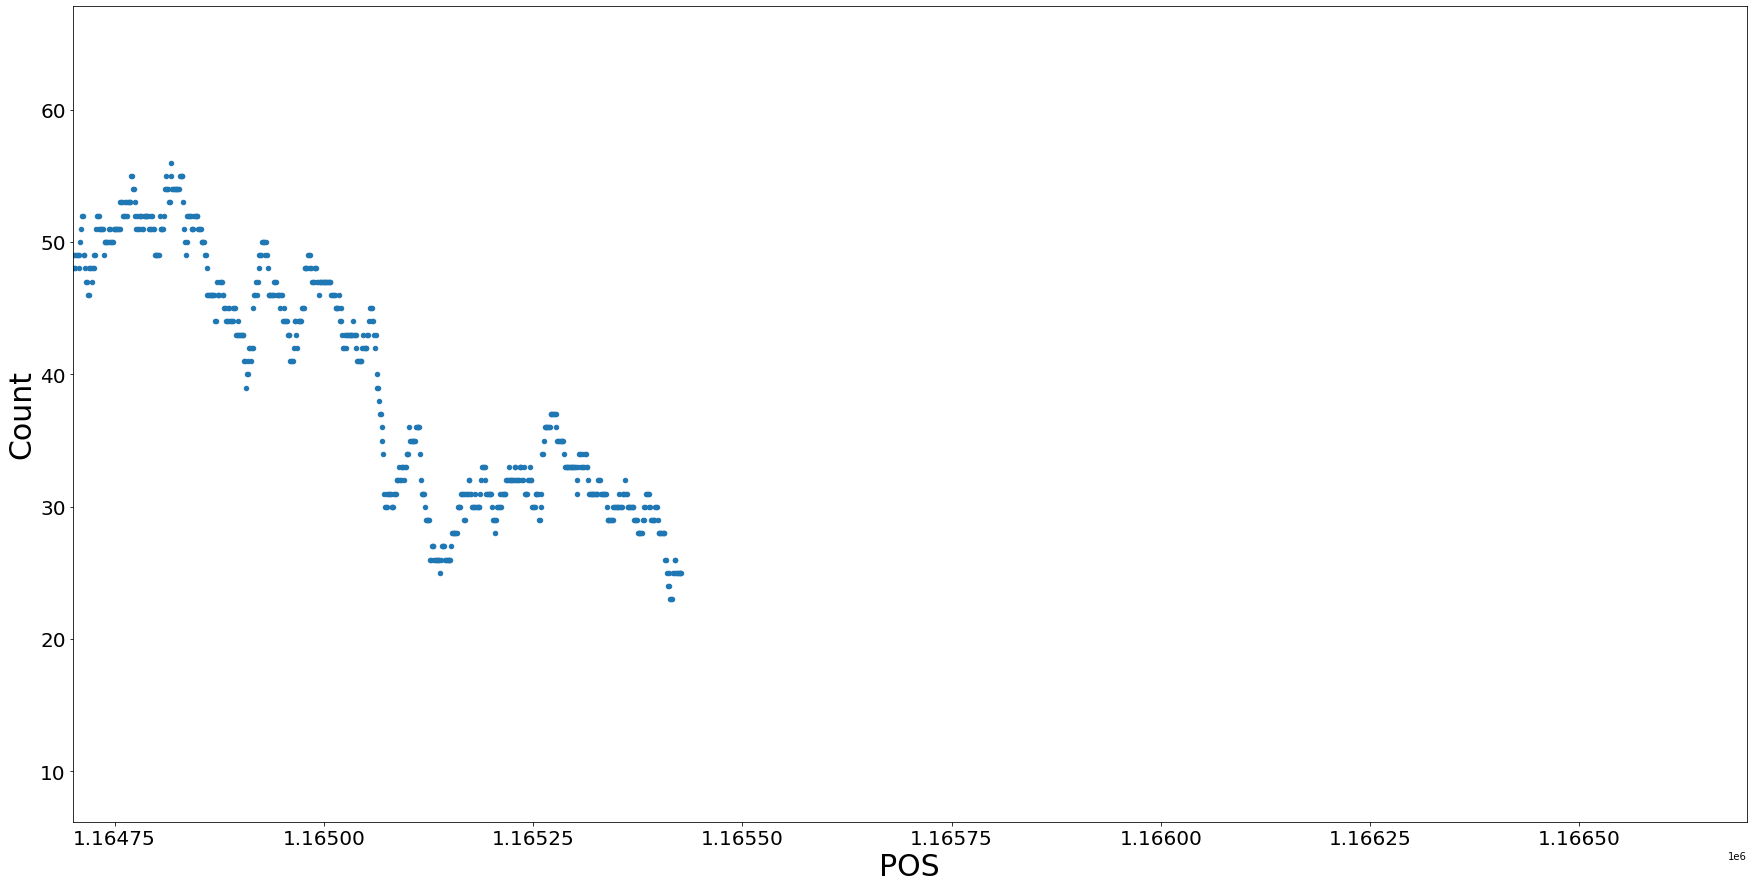

In [129]:
ref0.plot(x='start', y='count_mapq', kind='scatter', xlim=(1164700,1166700), figsize=(30,15), fontsize=20)
plt.xlabel('POS', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.savefig('TEST-MTBREF_count_mapq0_1164700_1166700.png')

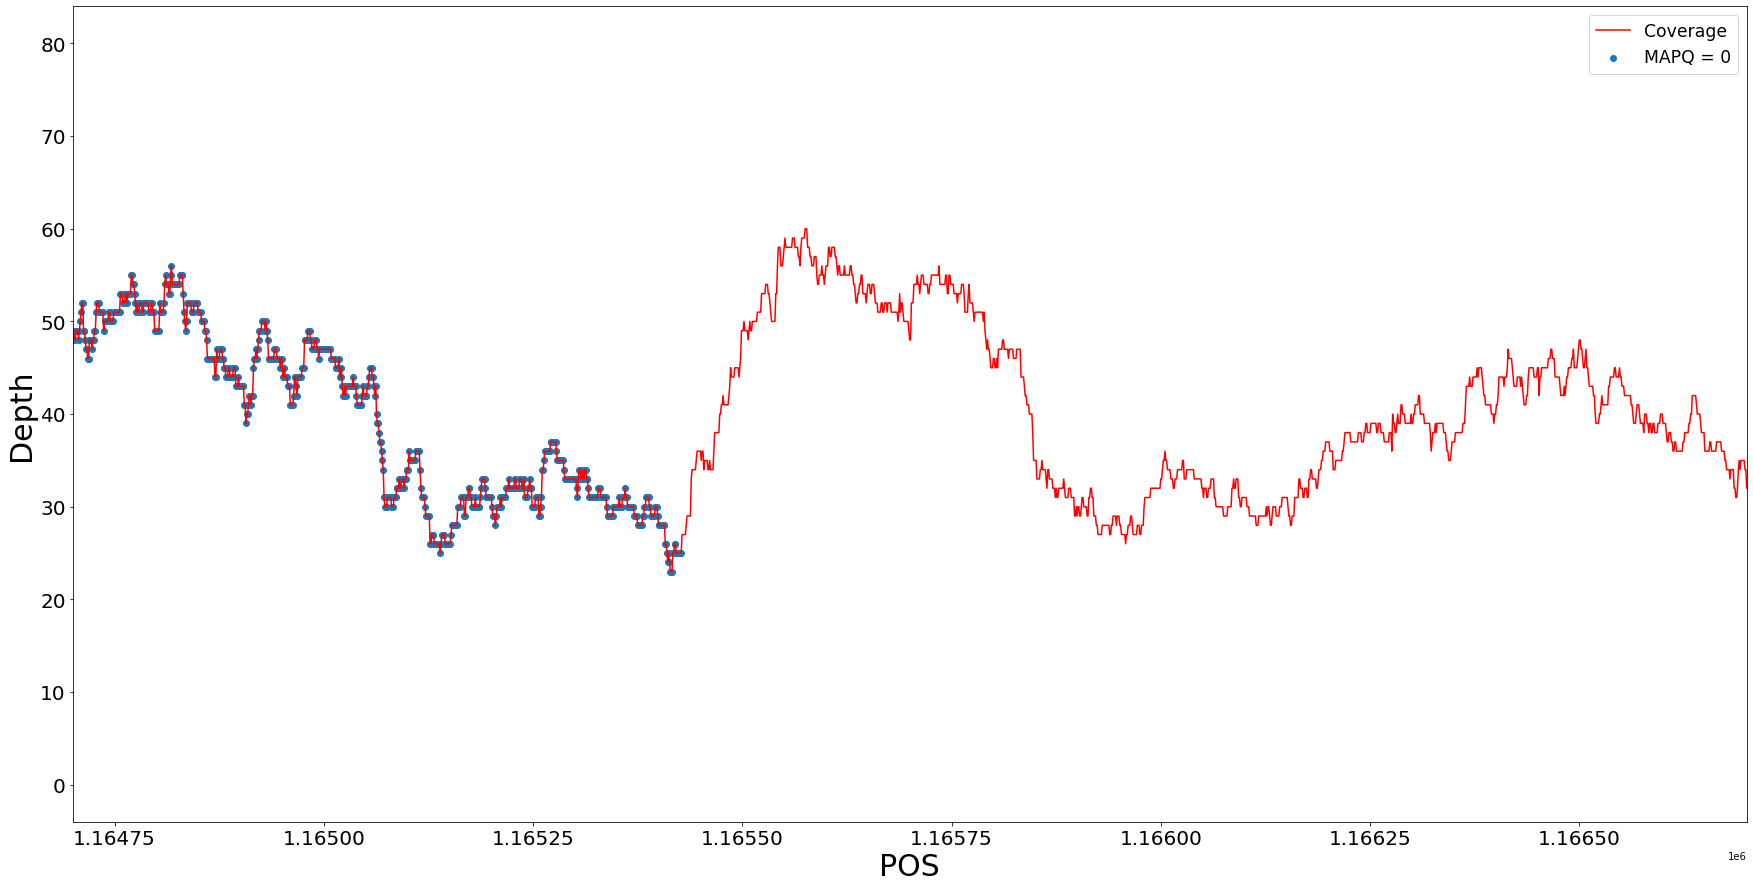

In [190]:
fig, ax = plt.subplots()
ax.scatter(ref0.start, ref0.count_mapq, label='MAPQ = 0')
ax.plot(perbase_cov.pos0, perbase_cov.depth, label='Coverage', color='red')
ax.legend(fontsize='xx-large')
ax.figure.set_size_inches(30,15)
plt.xlim(1164700,1166700)
plt.xlabel('POS', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Depth', fontsize=30)
plt.savefig('TEST-MTBREF_mapq0depth_1164700_1166700.png')

In [131]:
ref0[ref0.start > 1165500]

chr    start      end min_mapq max_mapq median_mapq  \
1169382  NC_000962.3  1169382  1169383        0       60         0.0   
1169383  NC_000962.3  1169383  1169384        0       60         0.0   
1169384  NC_000962.3  1169384  1169385        0       60         0.0   
1169385  NC_000962.3  1169385  1169386        0       60         0.0   
1169386  NC_000962.3  1169386  1169387        0       60         0.0   
...              ...      ...      ...      ...      ...         ...   
4319258  NC_000962.3  4319258  4319259        0       60         0.0   
4319259  NC_000962.3  4319259  4319260        0       60         0.0   
4319260  NC_000962.3  4319260  4319261        0       60         0.0   
4319261  NC_000962.3  4319261  4319262        0       60         0.0   
4319262  NC_000962.3  4319262  4319263        0       60         0.0   

         count_mapq  
1169382          43  
1169383          43  
1169384          42  
1169385          42  
1169386          42  
...             ...  
4319258          58  
4319259          58  
4319260          59  
4319261          59  
4319262          61  

[49219 rows x 7 columns]

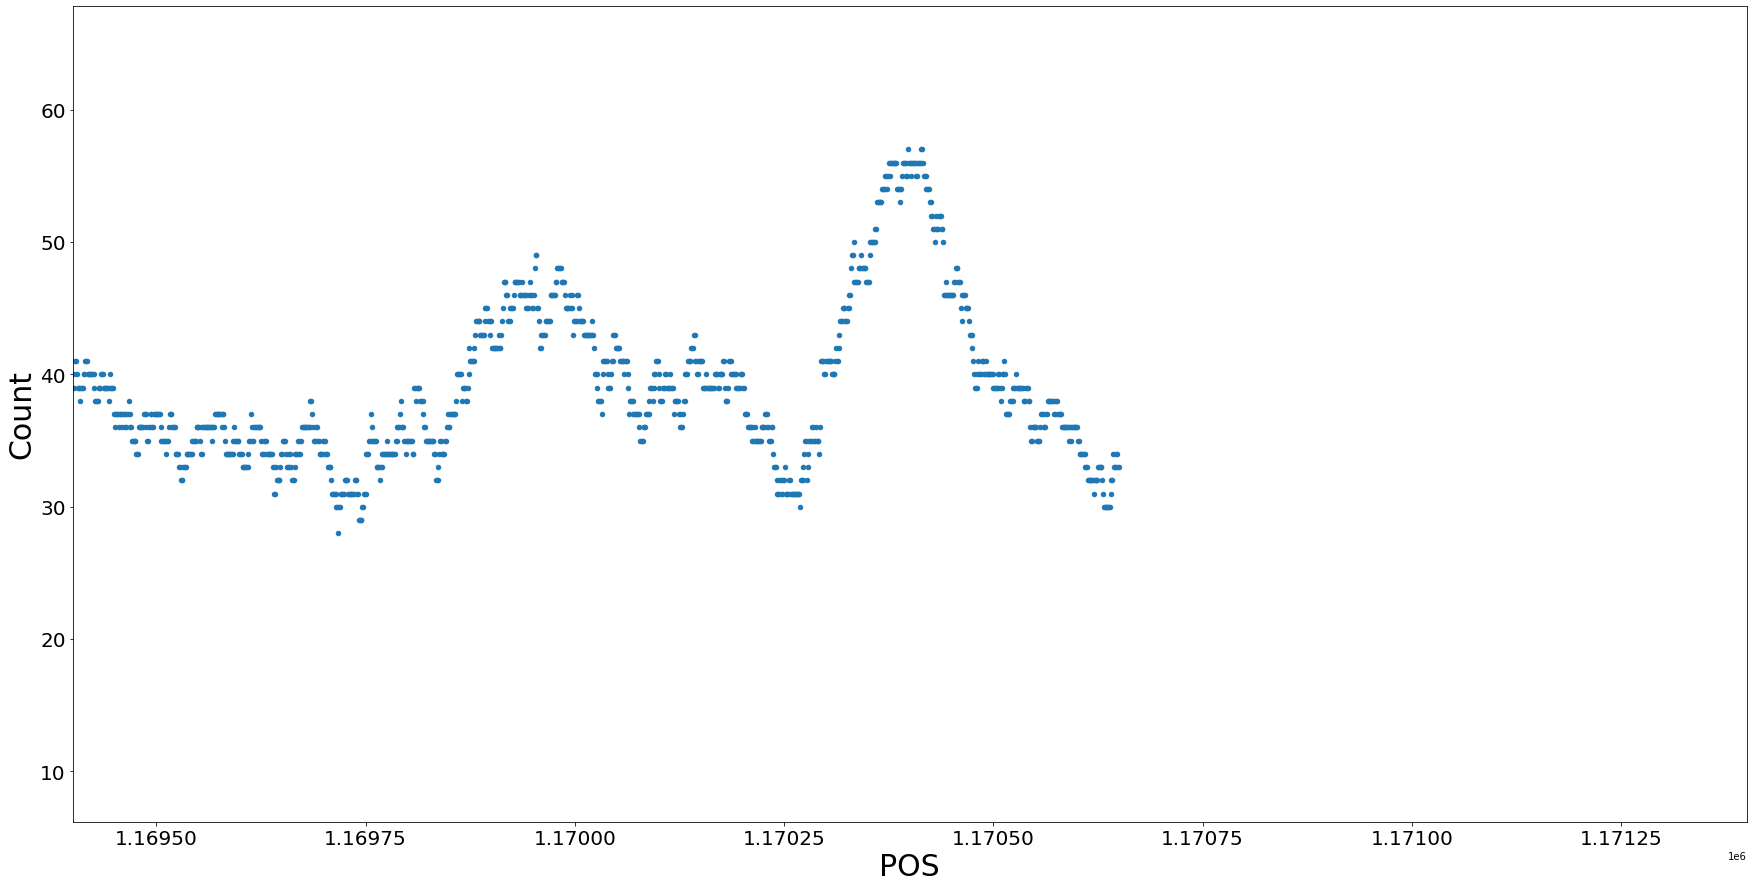

In [132]:
ref0.plot(x='start', y='count_mapq', kind='scatter', xlim=(1169400,1171400), figsize=(30,15), fontsize=20)
plt.xlabel('POS', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.savefig('TEST-MTBREF_count_mapq0_1169400_1171400.png')

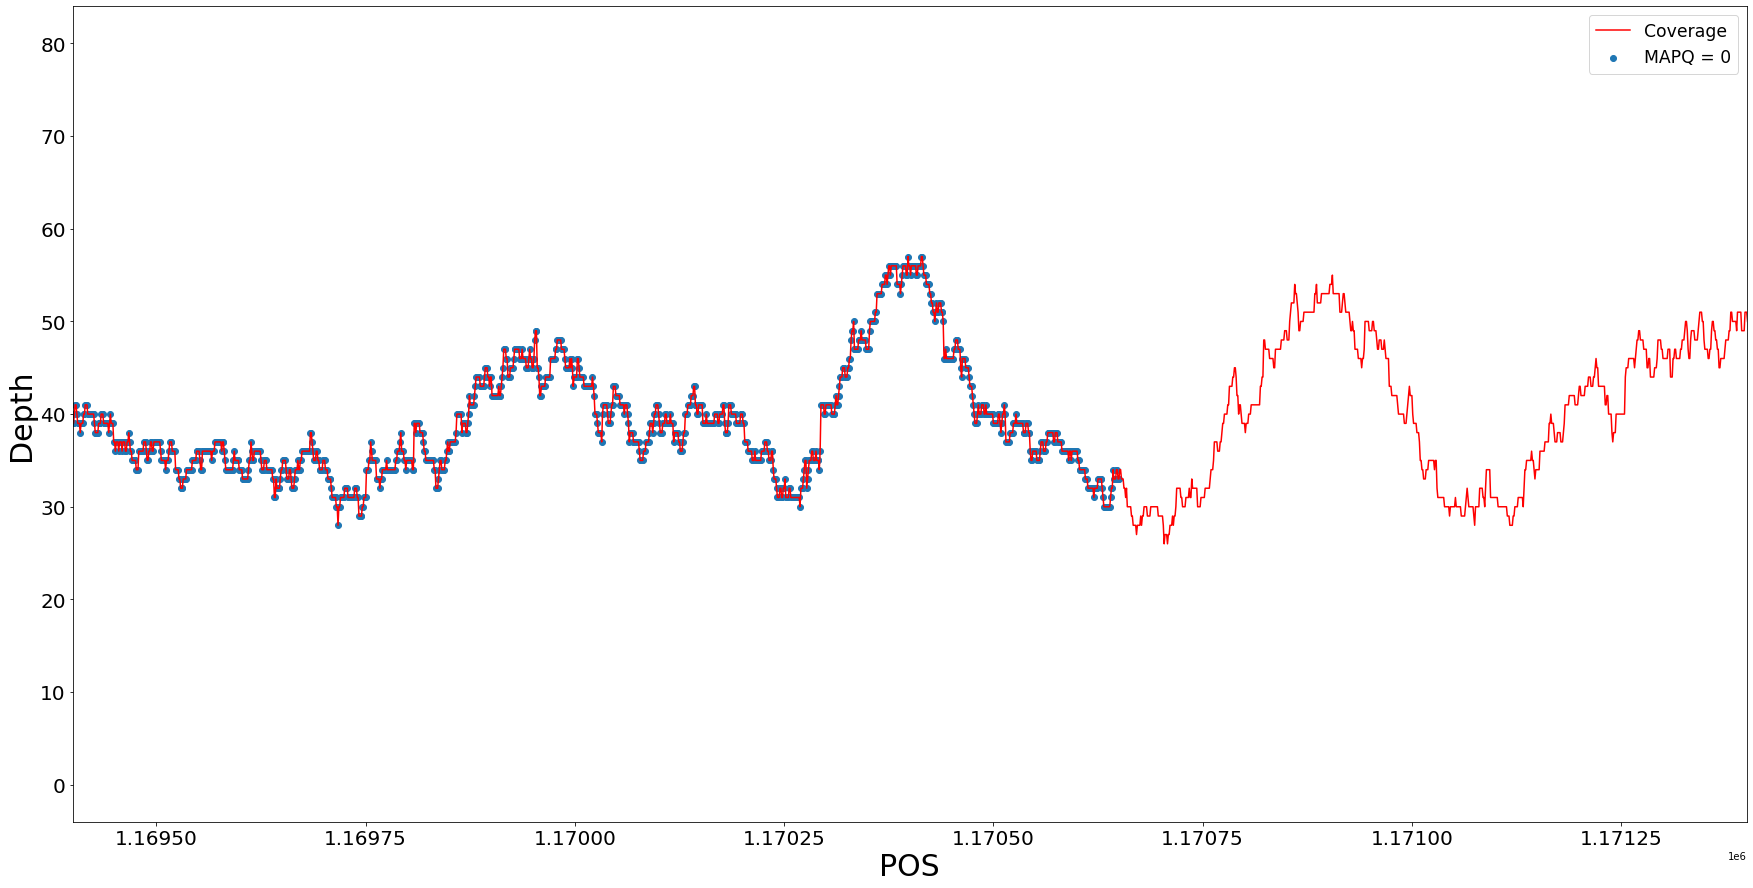

In [191]:
fig, ax = plt.subplots()
ax.scatter(ref0.start, ref0.count_mapq, label='MAPQ = 0')
ax.plot(perbase_cov.pos0, perbase_cov.depth, label='Coverage', color='red')
ax.legend(fontsize='xx-large')
ax.figure.set_size_inches(30,15)
plt.xlim(1169400,1171400)
plt.xlabel('POS', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Depth', fontsize=30)
plt.savefig('TEST-MTBREF_mapq0depth_1169400_1171400.png')

In [134]:
ref0[ref0.start > 1170600]

chr    start      end min_mapq max_mapq median_mapq  \
1170601  NC_000962.3  1170601  1170602        0       60         0.0   
1170602  NC_000962.3  1170602  1170603        0       60         0.0   
1170603  NC_000962.3  1170603  1170604        0       60         0.0   
1170604  NC_000962.3  1170604  1170605        0       60         0.0   
1170605  NC_000962.3  1170605  1170606        0       60         0.0   
...              ...      ...      ...      ...      ...         ...   
4319258  NC_000962.3  4319258  4319259        0       60         0.0   
4319259  NC_000962.3  4319259  4319260        0       60         0.0   
4319260  NC_000962.3  4319260  4319261        0       60         0.0   
4319261  NC_000962.3  4319261  4319262        0       60         0.0   
4319262  NC_000962.3  4319262  4319263        0       60         0.0   

         count_mapq  
1170601          35  
1170602          35  
1170603          34  
1170604          34  
1170605          34  
...             ...  
4319258          58  
4319259          58  
4319260          59  
4319261          59  
4319262          61  

[48000 rows x 7 columns]

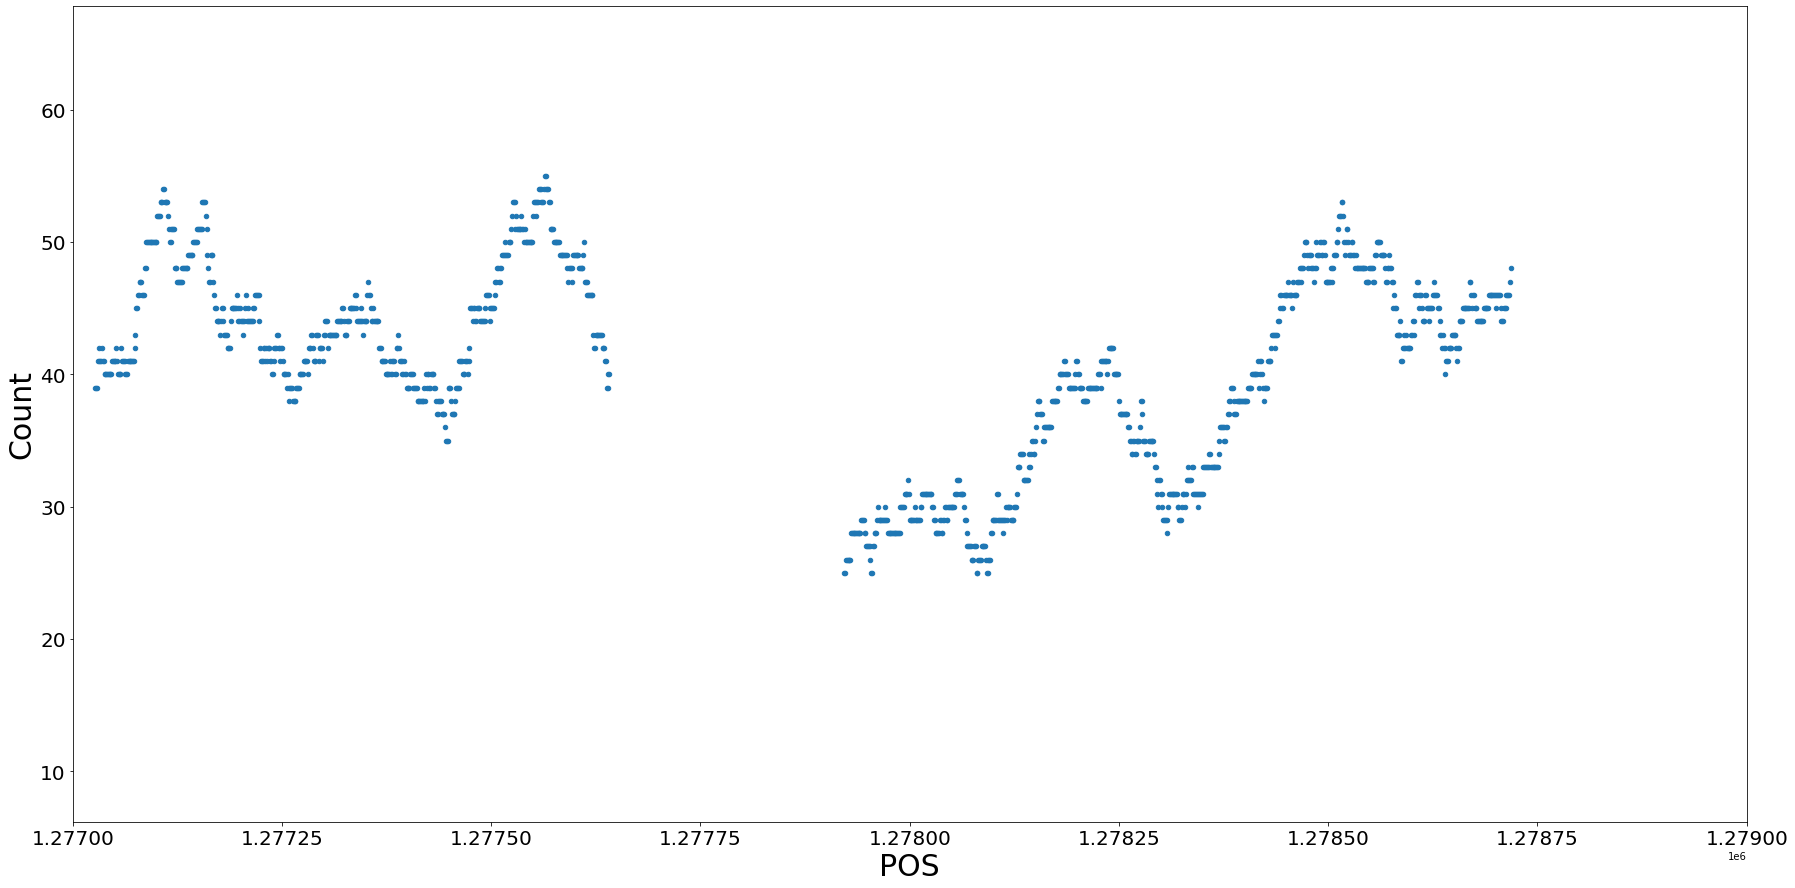

In [135]:
ref0.plot(x='start', y='count_mapq', kind='scatter', xlim=(1277000,1279000), figsize=(30,15), fontsize=20)
plt.xlabel('POS', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.savefig('TEST-MTBREF_count_mapq0_1277000_1279000.png')

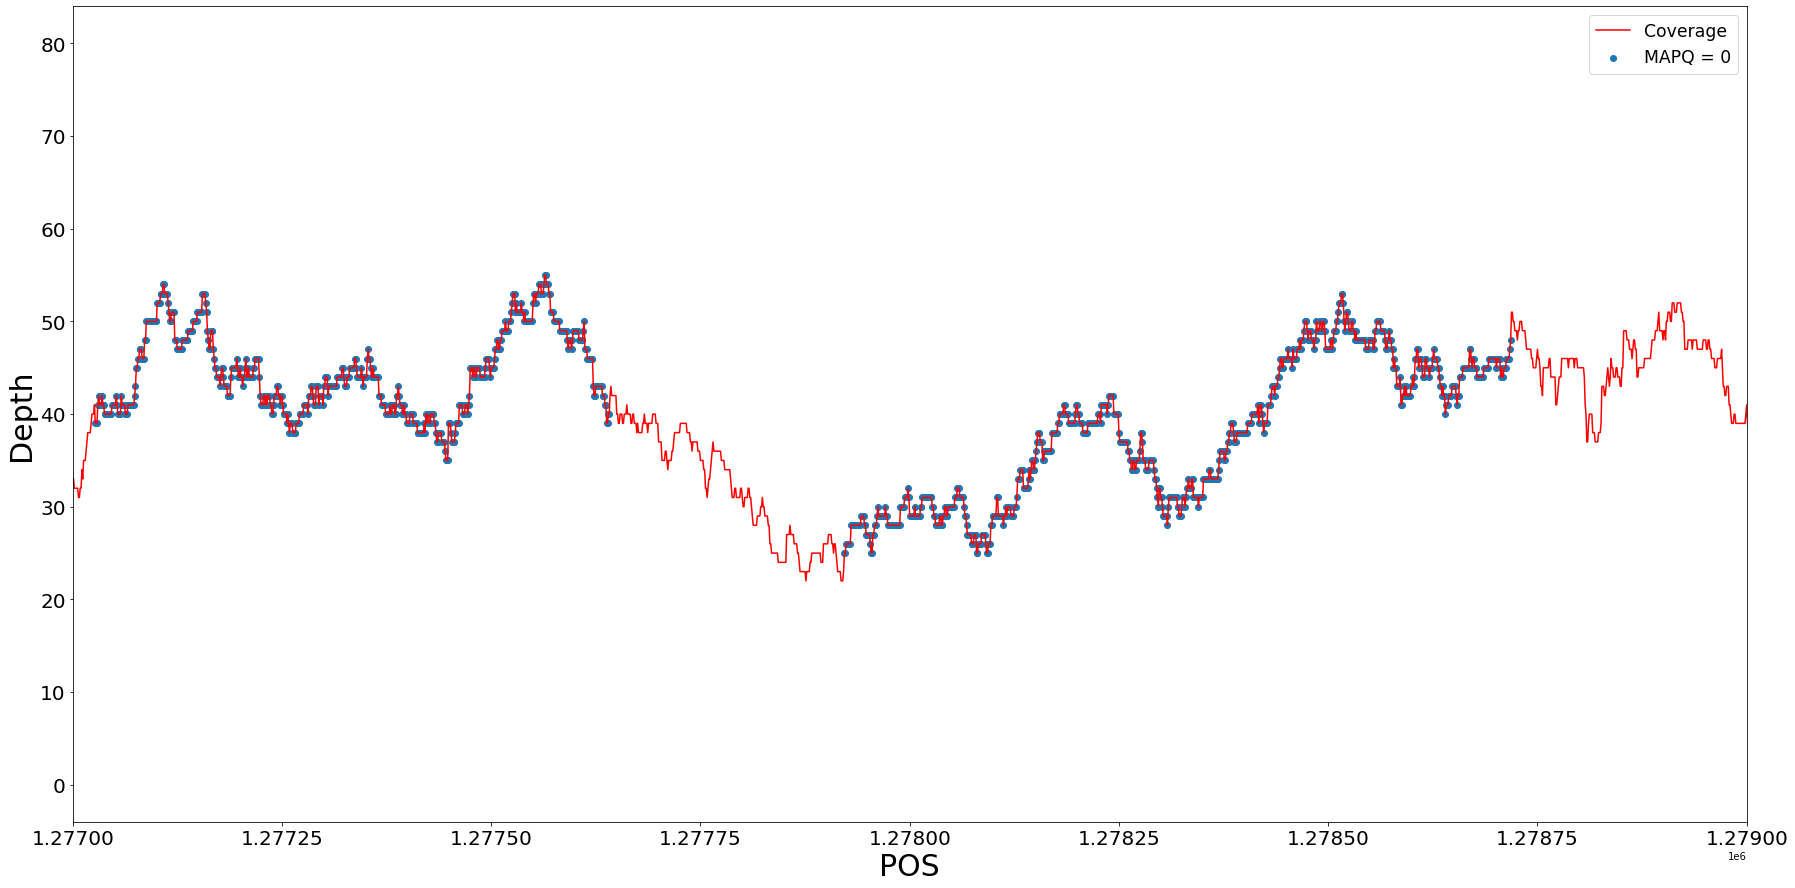

In [192]:
fig, ax = plt.subplots()
ax.scatter(ref0.start, ref0.count_mapq, label='MAPQ = 0')
ax.plot(perbase_cov.pos0, perbase_cov.depth, label='Coverage', color='red')
ax.legend(fontsize='xx-large')
ax.figure.set_size_inches(30,15)
plt.xlim(1277000,1279000)
plt.xlabel('POS', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Depth', fontsize=30)
plt.savefig('TEST-MTBREF_mapq0depth_1277000_1279000.png')

In [137]:
ref0[ref0.start > 1279000]

chr    start      end min_mapq max_mapq median_mapq  \
1341382  NC_000962.3  1341382  1341383        0       60           0   
1341383  NC_000962.3  1341383  1341384        0       60           0   
1341384  NC_000962.3  1341384  1341385        0       60           0   
1341385  NC_000962.3  1341385  1341386        0       60           0   
1341386  NC_000962.3  1341386  1341387        0       60           0   
...              ...      ...      ...      ...      ...         ...   
4319258  NC_000962.3  4319258  4319259        0       60         0.0   
4319259  NC_000962.3  4319259  4319260        0       60         0.0   
4319260  NC_000962.3  4319260  4319261        0       60         0.0   
4319261  NC_000962.3  4319261  4319262        0       60         0.0   
4319262  NC_000962.3  4319262  4319263        0       60         0.0   

         count_mapq  
1341382          54  
1341383          53  
1341384          53  
1341385          54  
1341386          54  
...             ...  
4319258          58  
4319259          58  
4319260          59  
4319261          59  
4319262          61  

[46098 rows x 7 columns]

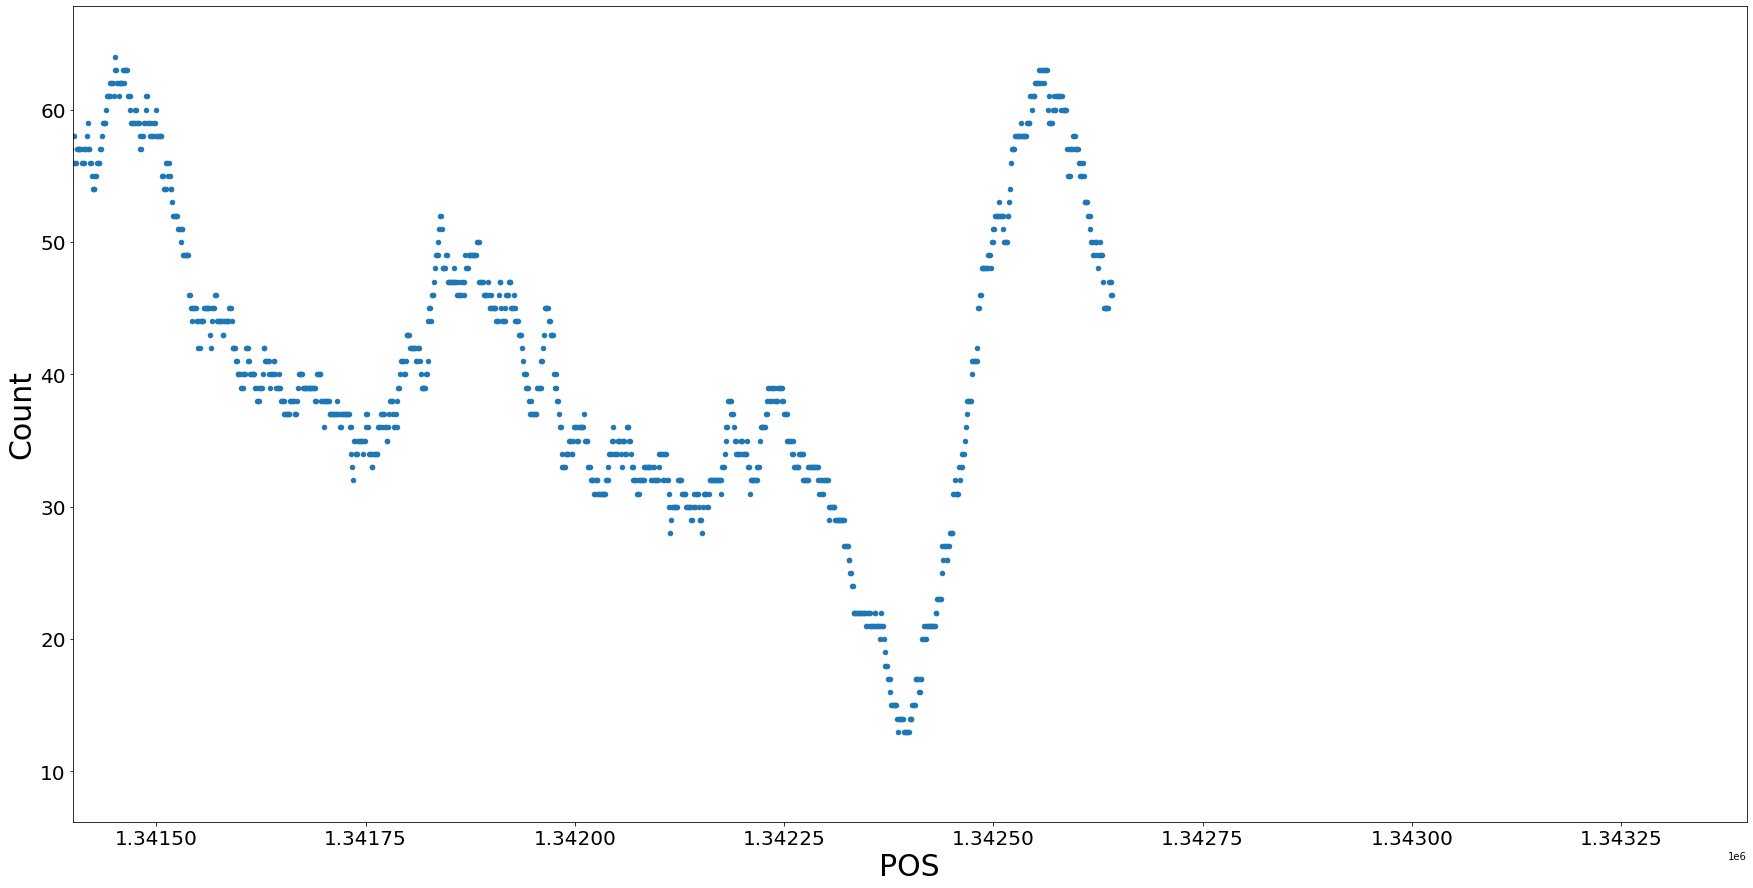

In [138]:
ref0.plot(x='start', y='count_mapq', kind='scatter', xlim=(1341400,1343400), figsize=(30,15), fontsize=20)
plt.xlabel('POS', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.savefig('TEST-MTBREF_count_mapq0_1341400_1343400.png')

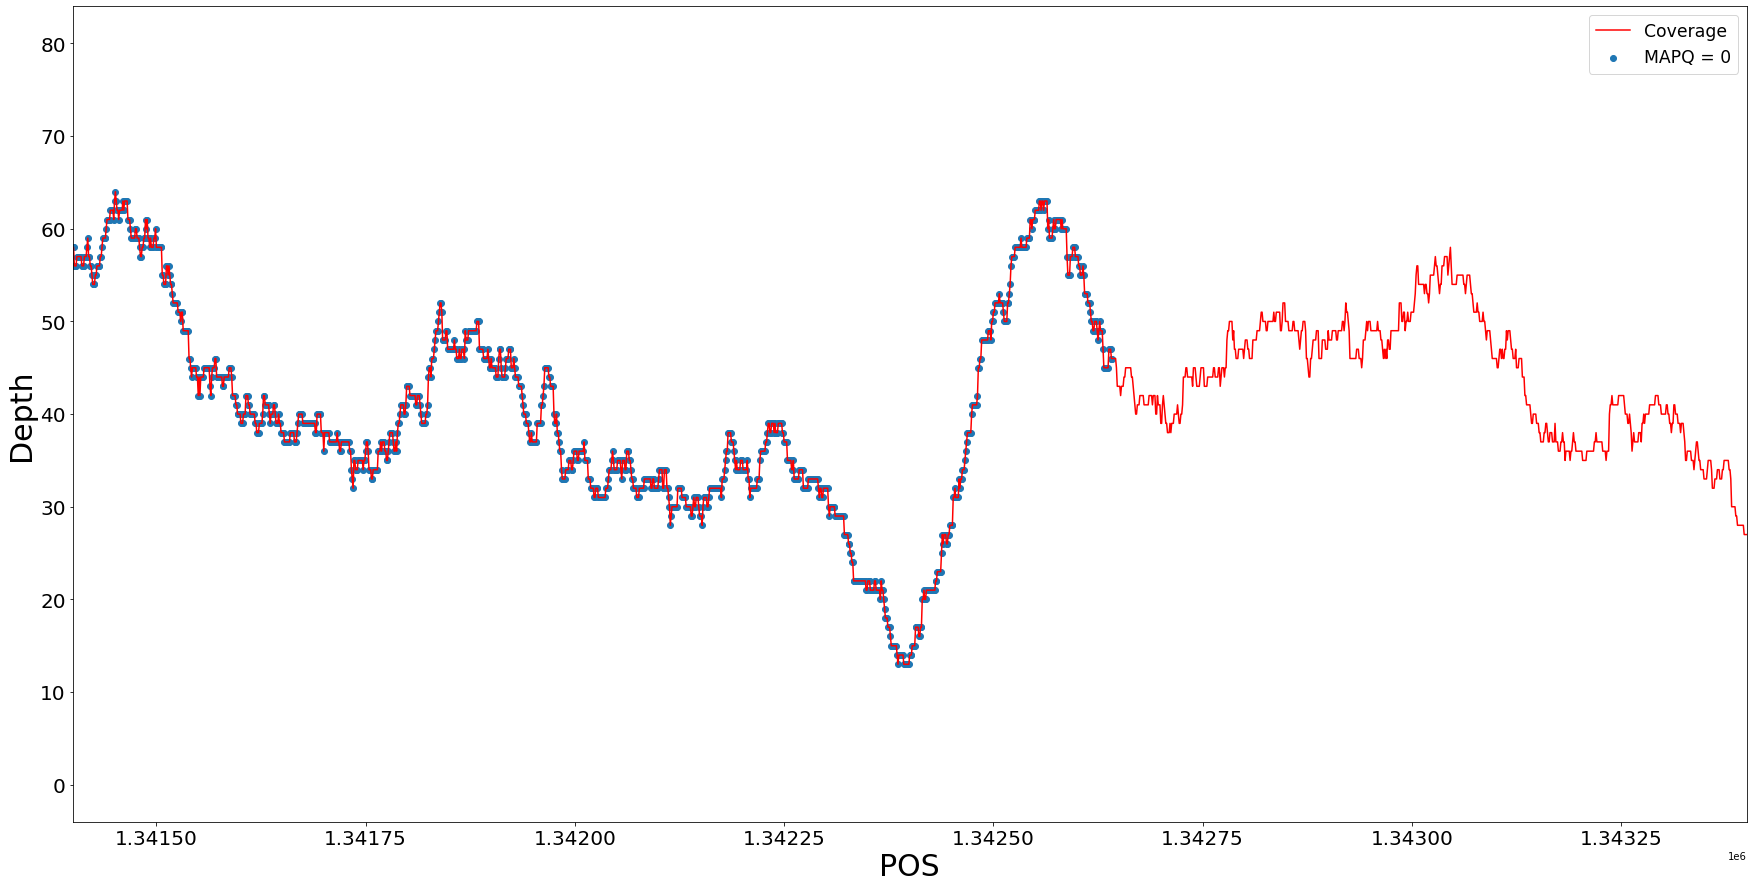

In [193]:
fig, ax = plt.subplots()
ax.scatter(ref0.start, ref0.count_mapq, label='MAPQ = 0')
ax.plot(perbase_cov.pos0, perbase_cov.depth, label='Coverage', color='red')
ax.legend(fontsize='xx-large')
ax.figure.set_size_inches(30,15)
plt.xlim(1341400,1343400)
plt.xlabel('POS', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Depth', fontsize=30)
plt.savefig('TEST-MTBREF_mapq0depth_1341400_1343400.png')

### Plot MAPQ - H37Rv mapped to H37Rv
#### With ```.sam``` files

In [85]:
with open('/Users/yeemayseah/Documents/Repos/read_mapping/TEST-MTBREF-pe-trimmed.sam', 'r') as samfile:
    lines = samfile.readlines()
data = lines[2:]

In [86]:
pos_values = []
mapq_values = []

for read in data:
    pos = int(read.split('\t')[3])
    mapq = int(read.split('\t')[4])
    pos_values.append(pos)
    mapq_values.append(mapq)

In [87]:
d = {'POS': pos_values, 'MAPQ': mapq_values}
samposmap = pd.DataFrame(data=d)

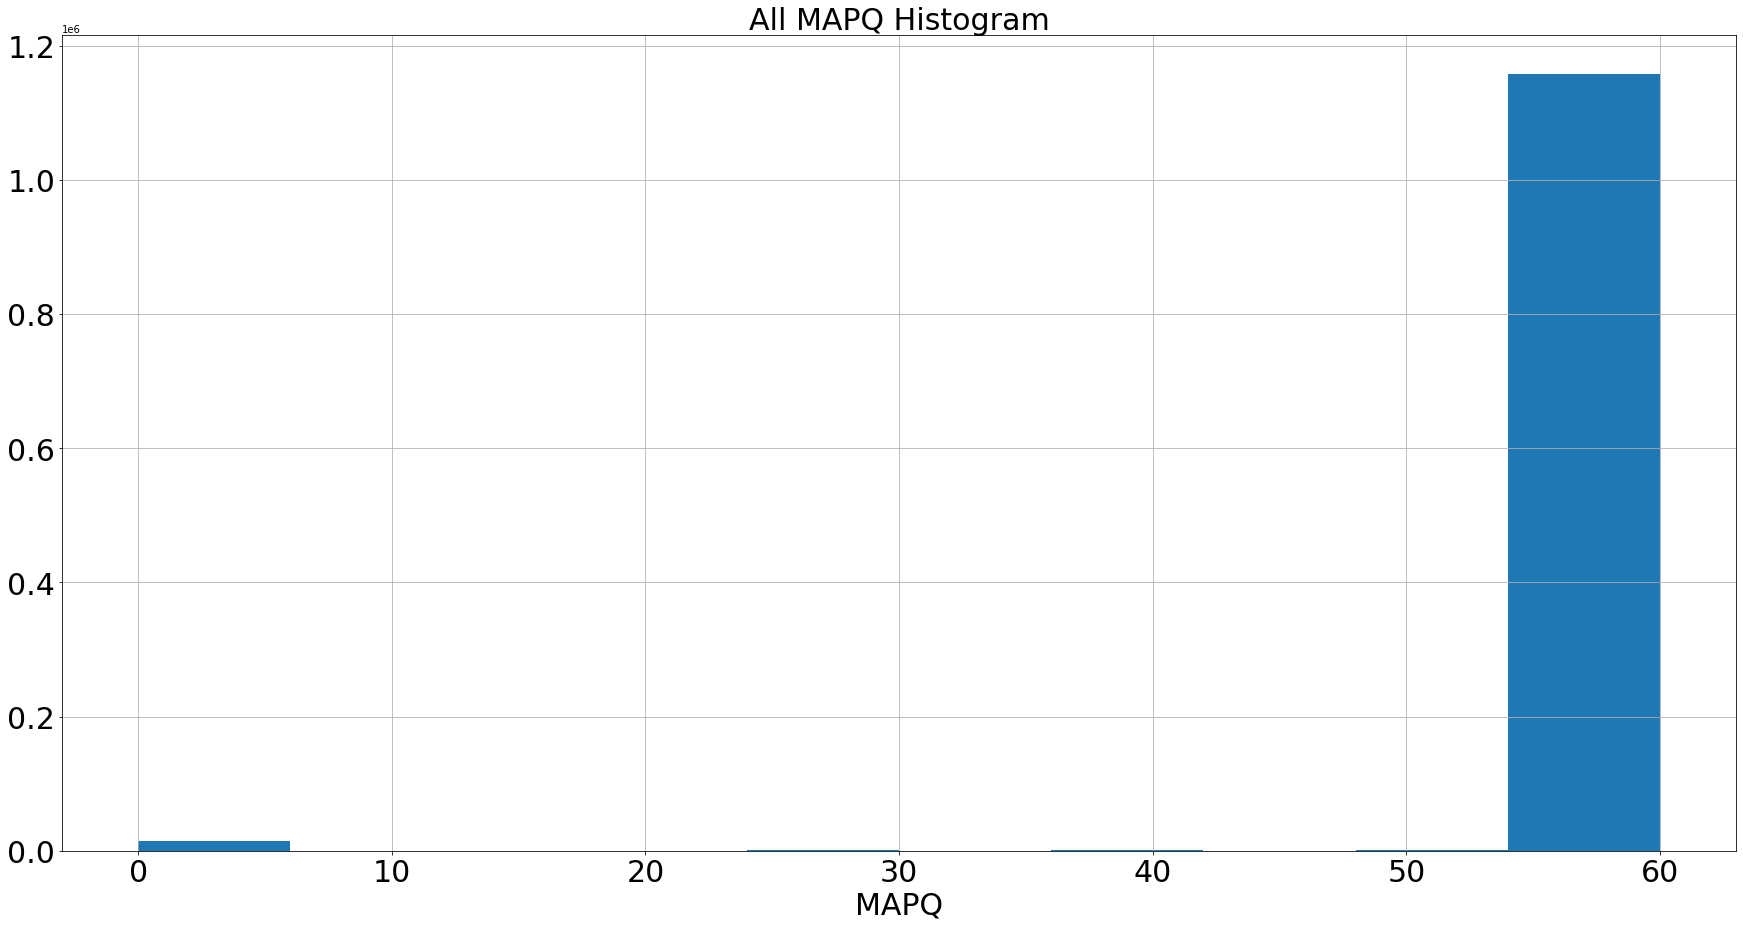

In [88]:
samposmap.hist(column='MAPQ', figsize=(30,15), xlabelsize=30, ylabelsize=30)
plt.title('All MAPQ Histogram', fontsize=30)
plt.xlabel('MAPQ', fontsize=30)
plt.savefig('refmapq_all.png')

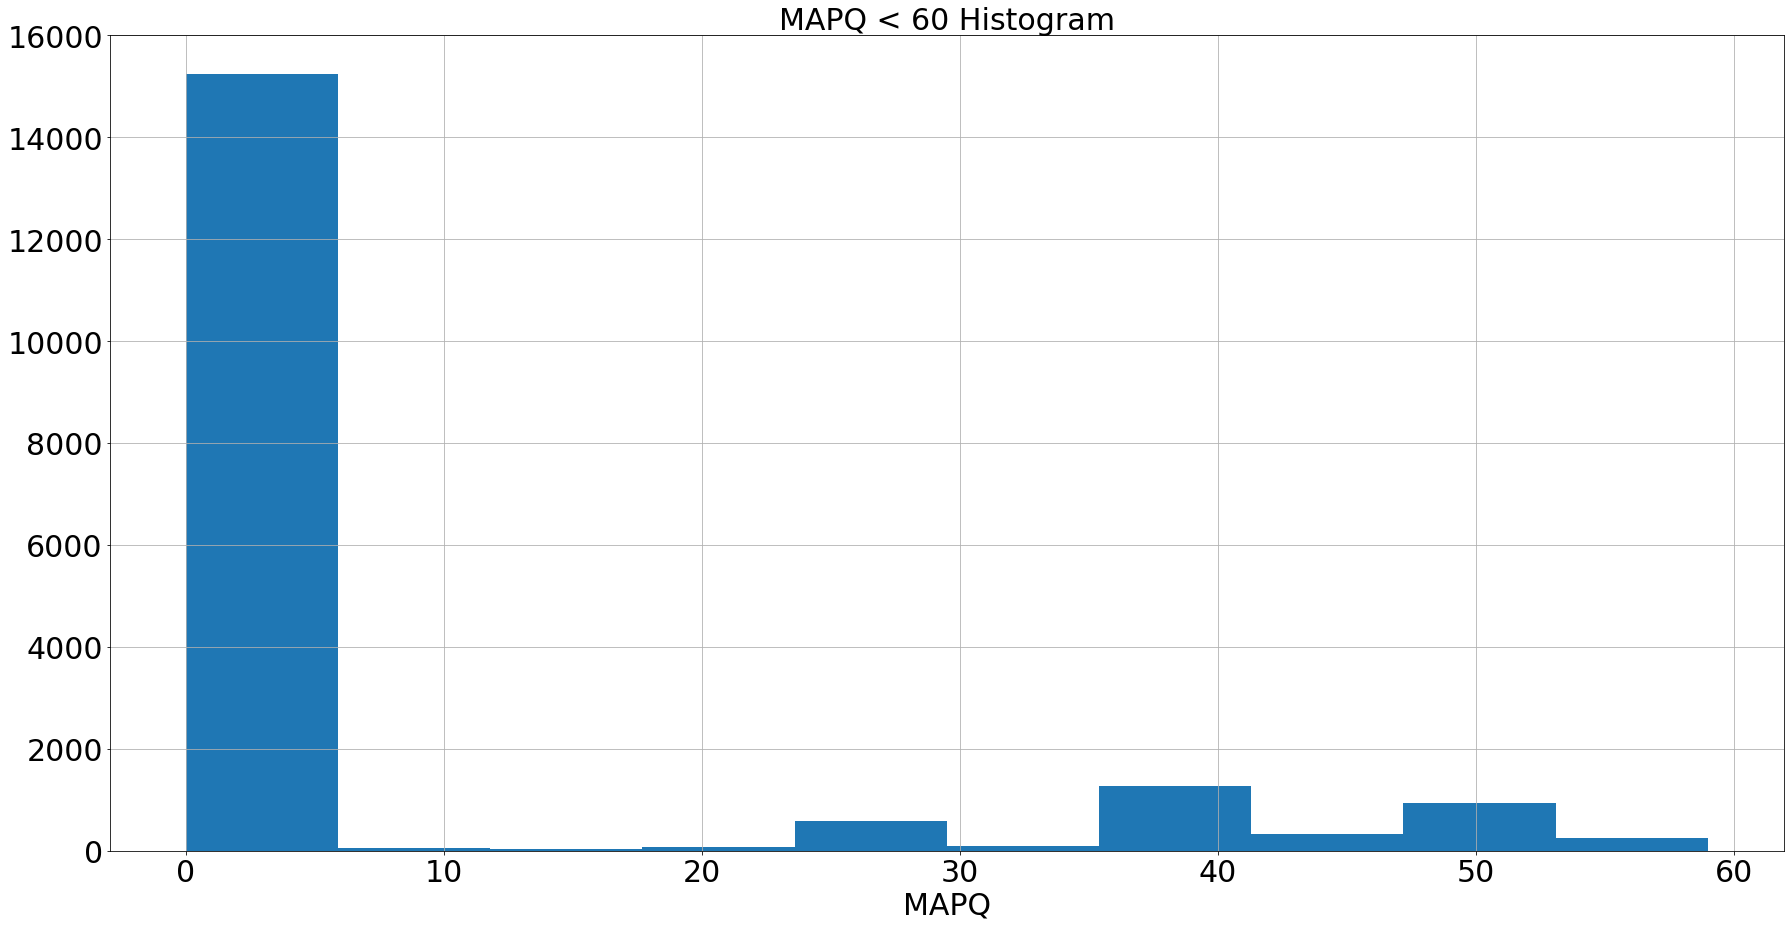

In [89]:
samposmap[samposmap['MAPQ'] < 60].hist(column='MAPQ', figsize=(30,15), xlabelsize=30, ylabelsize=30)
plt.title('MAPQ < 60 Histogram', fontsize=30)
plt.xlabel('MAPQ', fontsize=30)
plt.savefig('refmapq_under60.png')

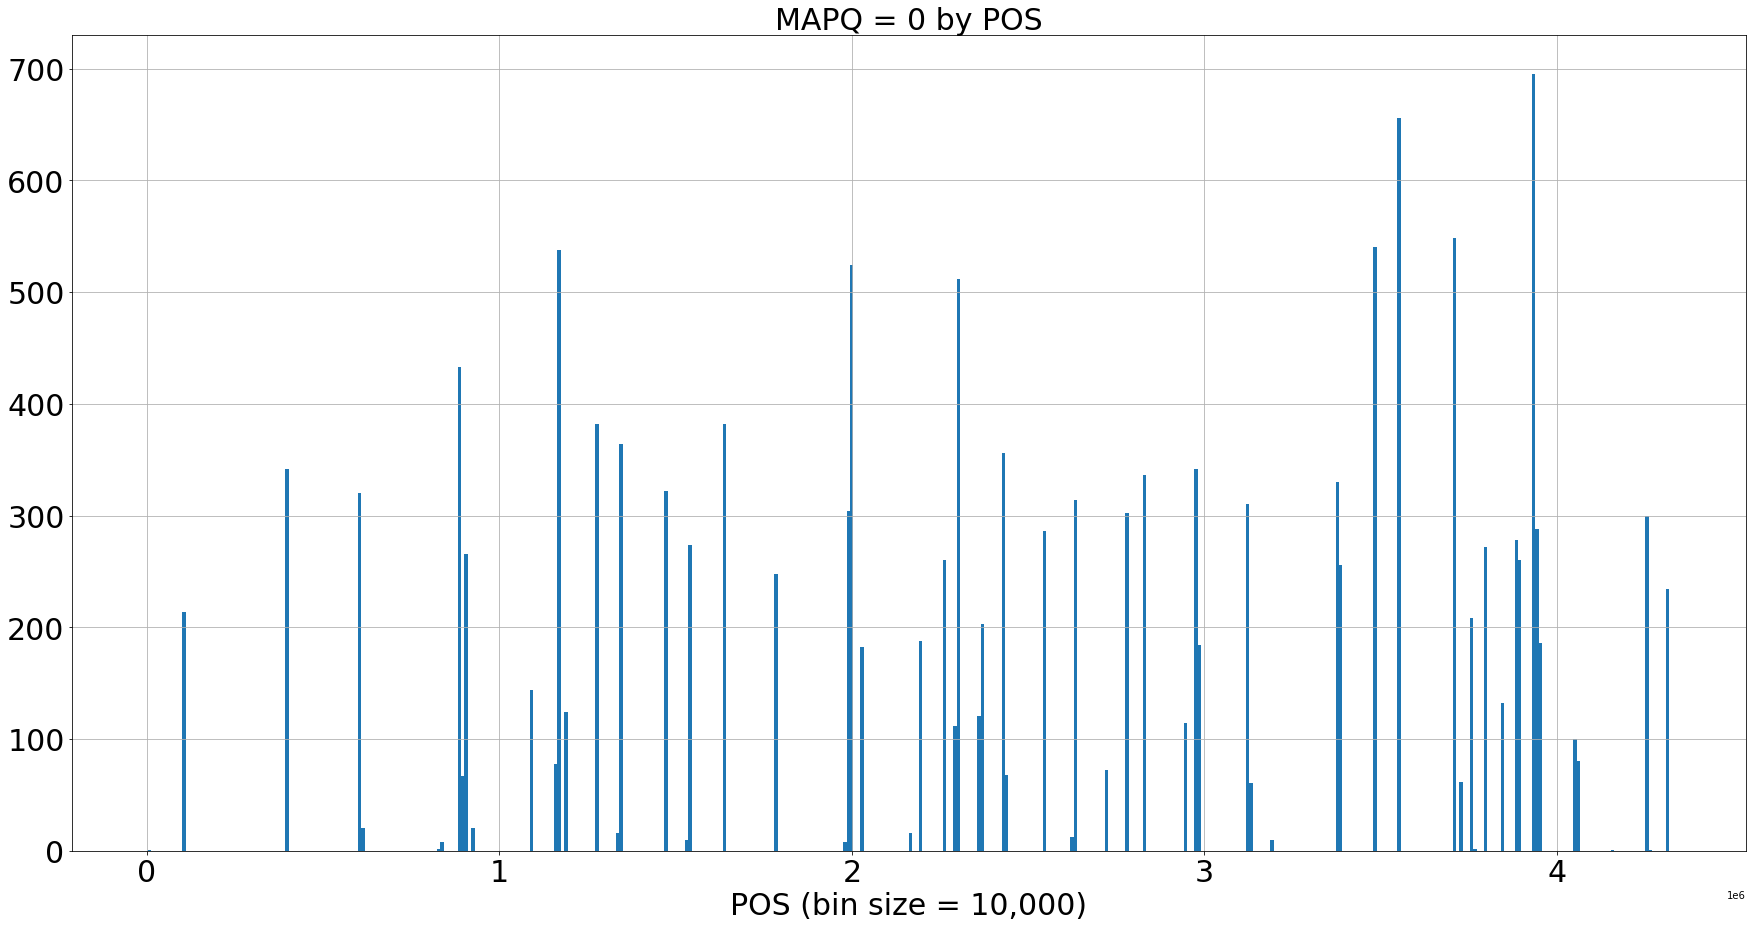

In [91]:
samposmap[samposmap['MAPQ'] == 0].hist(column='POS', bins=442, figsize=(30,15), xlabelsize=30, ylabelsize=30)
plt.title('MAPQ = 0 by POS', fontsize=30)
plt.xlabel('POS (bin size = 10,000)', fontsize=30)
plt.savefig('refmapq_0.png')

### Plot MAPQ - 20,000 SNPs mapped to H37Rv

In [92]:
with open('/Users/yeemayseah/Documents/Repos/read_mapping/TEST-H37Rv20003snps-pe-trimmed.sam', 'r') as samfile_20ksnps:
    lines = samfile_20ksnps.readlines()
data_20ksnps = lines[2:]
pos_values = []
mapq_values = []

for read in data_20ksnps:
    pos = int(read.split('\t')[3])
    mapq = int(read.split('\t')[4])
    pos_values.append(pos)
    mapq_values.append(mapq)

d = {'POS': pos_values, 'MAPQ': mapq_values}
samposmap_20ksnps = pd.DataFrame(data=d)

Text(0.5, 0, 'MAPQ')

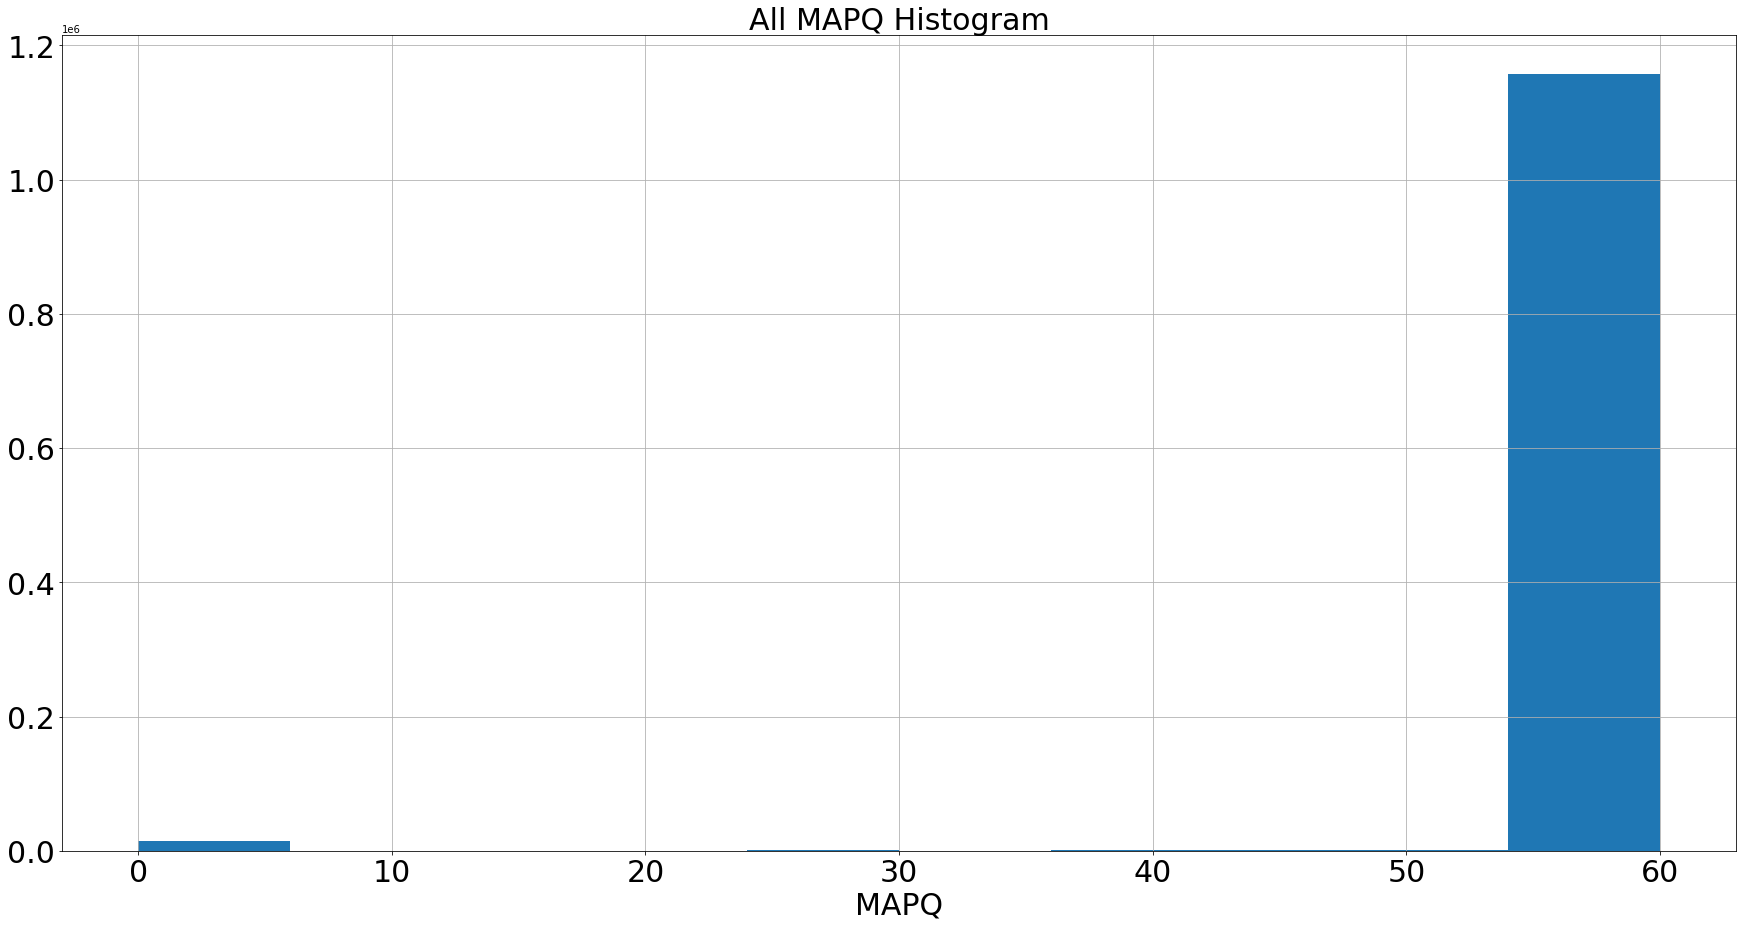

In [97]:
samposmap_20ksnps.hist(column='MAPQ', figsize=(30,15), xlabelsize=30, ylabelsize=30)
plt.title('All MAPQ Histogram', fontsize=30)
plt.xlabel('MAPQ', fontsize=30)

Text(0.5, 0, 'MAPQ')

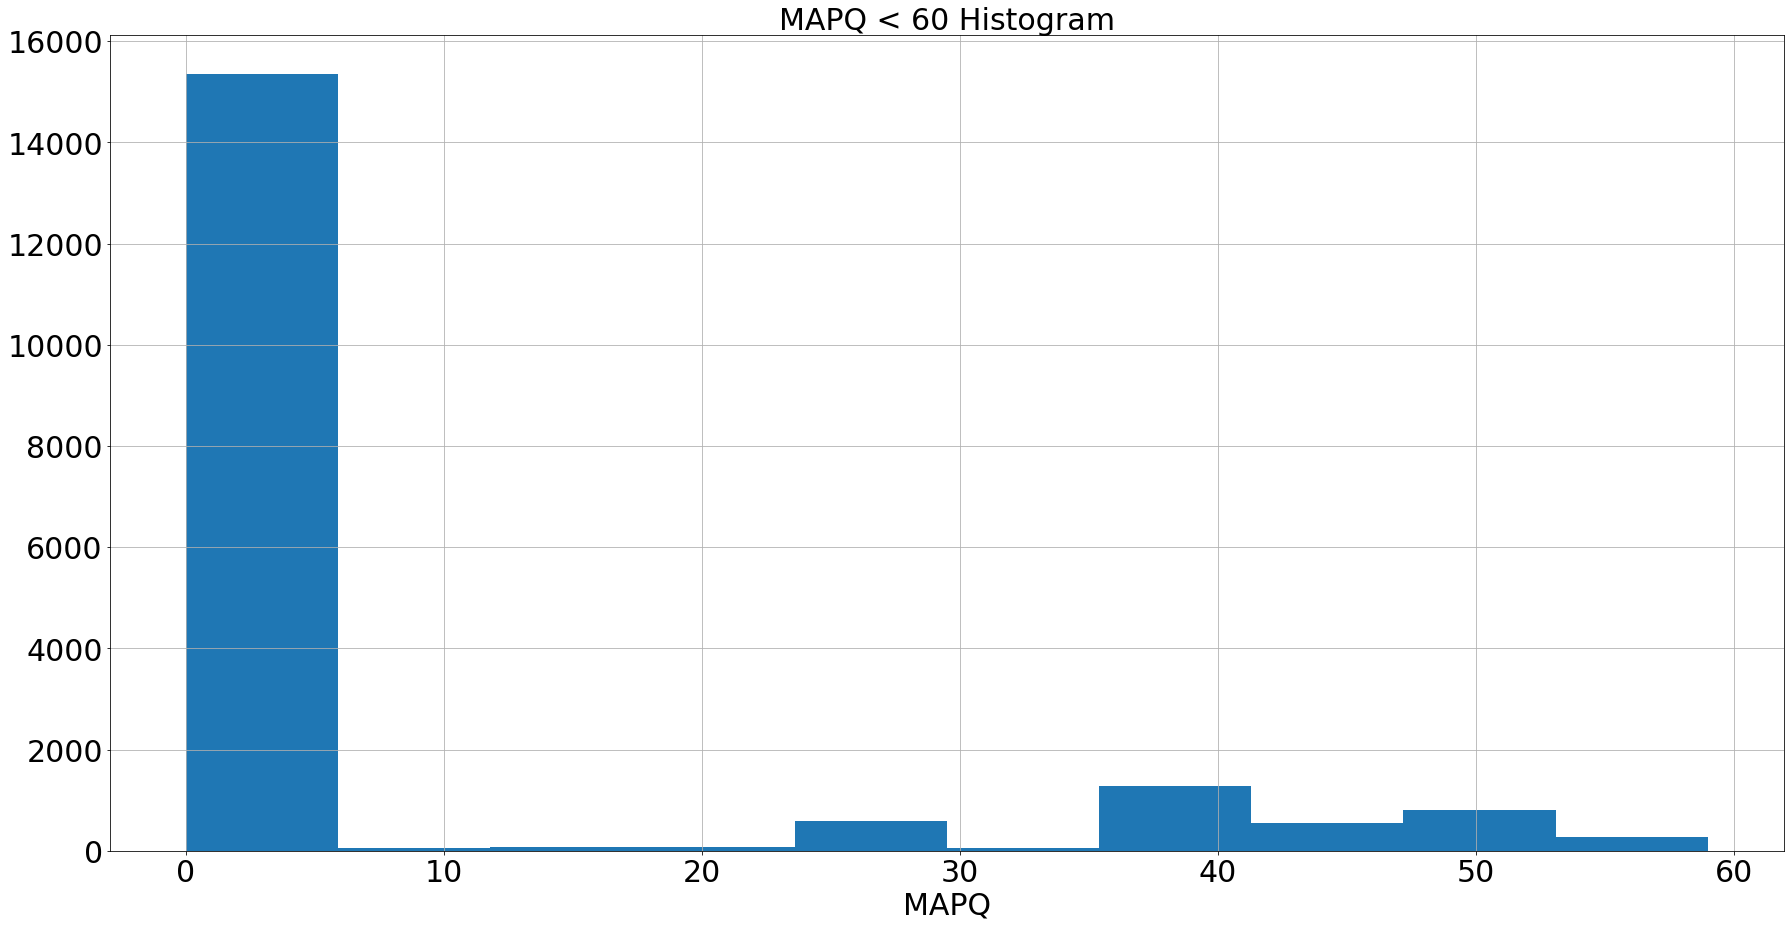

In [100]:
samposmap_20ksnps[samposmap_20ksnps['MAPQ'] < 60].hist(column='MAPQ', figsize=(30,15), xlabelsize=30, ylabelsize=30)
plt.title('MAPQ < 60 Histogram', fontsize=30)
plt.xlabel('MAPQ', fontsize=30)

Text(0.5, 0, 'POS (bin size = 10,000)')

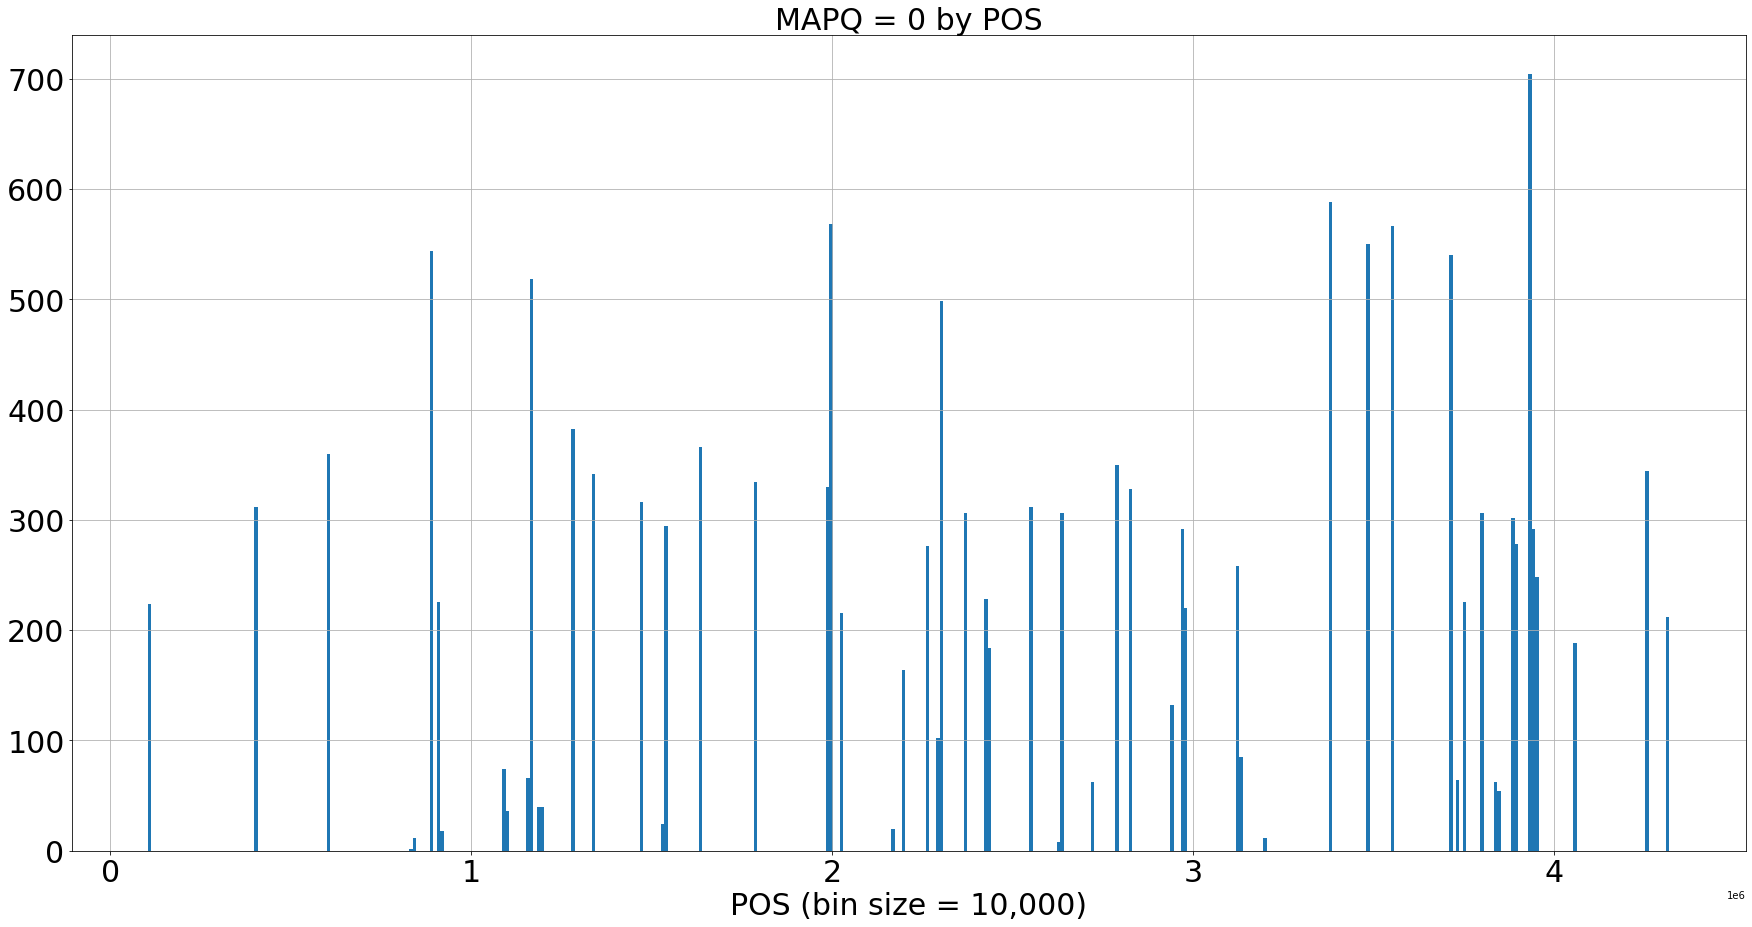

In [106]:
samposmap_20ksnps[samposmap_20ksnps['MAPQ'] == 0].hist(column='POS', bins=442, figsize=(30,15), xlabelsize=30, ylabelsize=30)
plt.title('MAPQ = 0 by POS', fontsize=30)
plt.xlabel('POS (bin size = 10,000)', fontsize=30)

### Plot MAPQ - 1048 SNPs + 3317 indels (1:3 SNPs:indels) mapped to H37Rv

In [78]:
with open('/Users/yeemayseah/Documents/Repos/read_mapping/TEST-MTBVAR1-pe-trimmed.sam', 'r') as samfile_mtbvar1:
    lines = samfile_mtbvar1.readlines()
data_mtbvar1 = lines[2:]
pos_values = []
mapq_values = []

for read in data_mtbvar1:
    pos = int(read.split('\t')[3])
    mapq = int(read.split('\t')[4])
    pos_values.append(pos)
    mapq_values.append(mapq)

d = {'POS': pos_values, 'MAPQ': mapq_values}
samposmap_mtbvar1 = pd.DataFrame(data=d)

Text(0.5, 0, 'MAPQ')

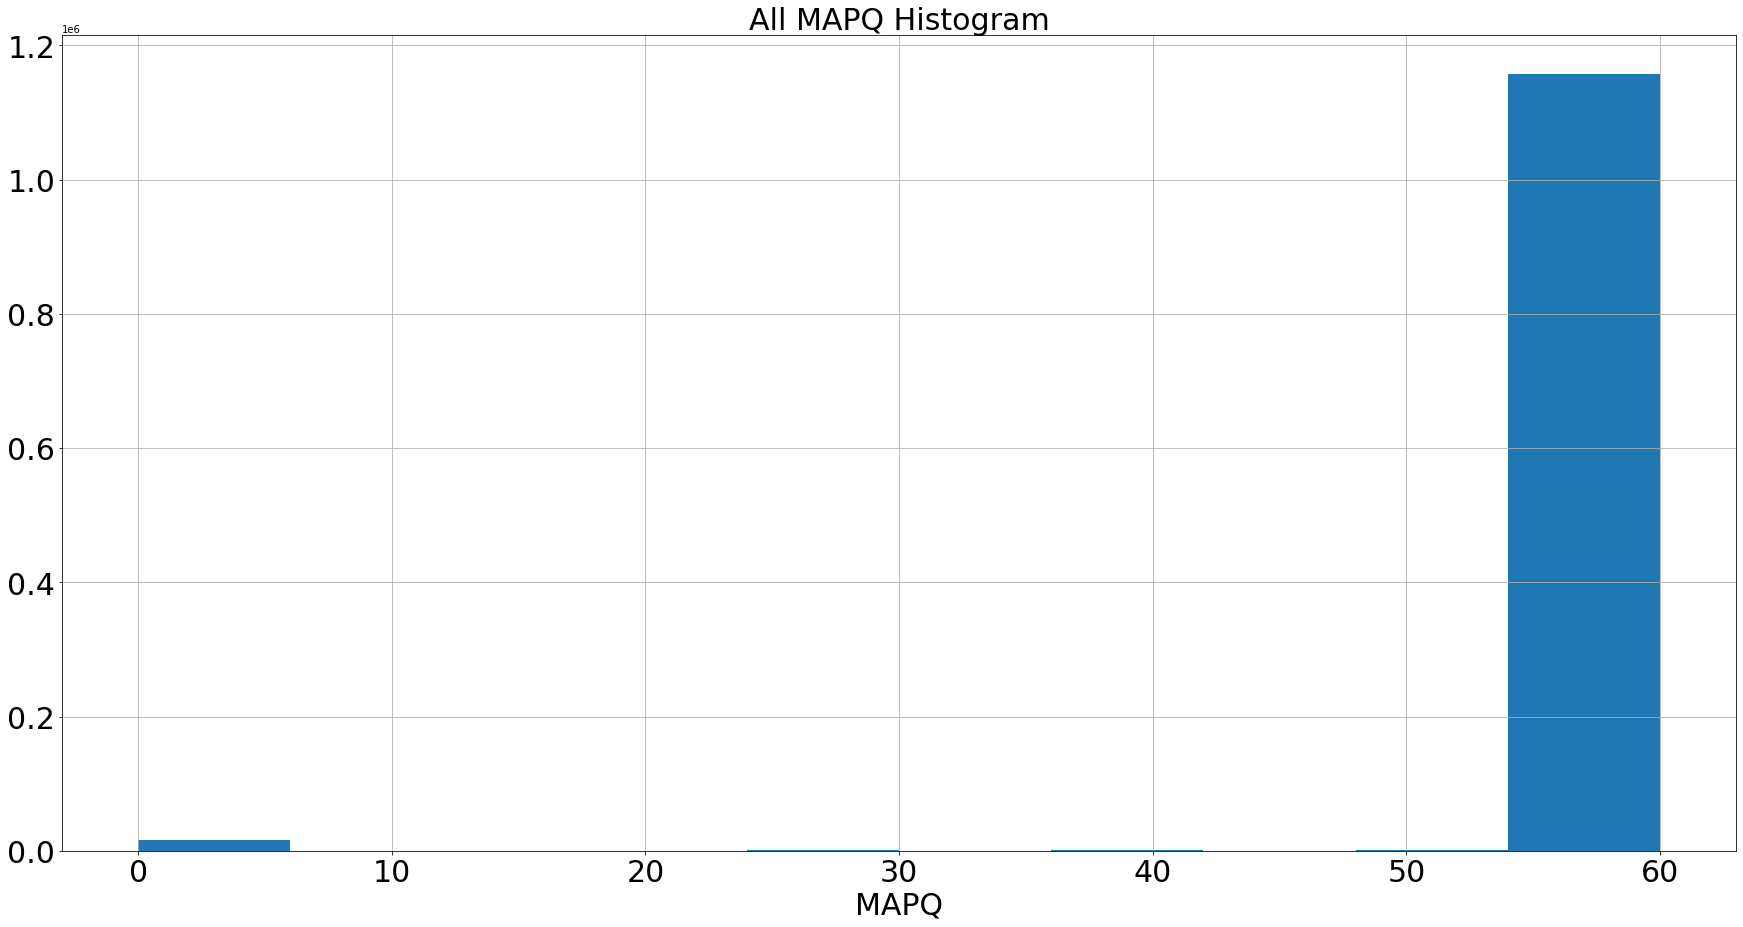

In [98]:
samposmap_mtbvar1.hist(column='MAPQ', figsize=(30,15), xlabelsize=30, ylabelsize=30)
plt.title('All MAPQ Histogram', fontsize=30)
plt.xlabel('MAPQ', fontsize=30)

Text(0.5, 0, 'MAPQ')

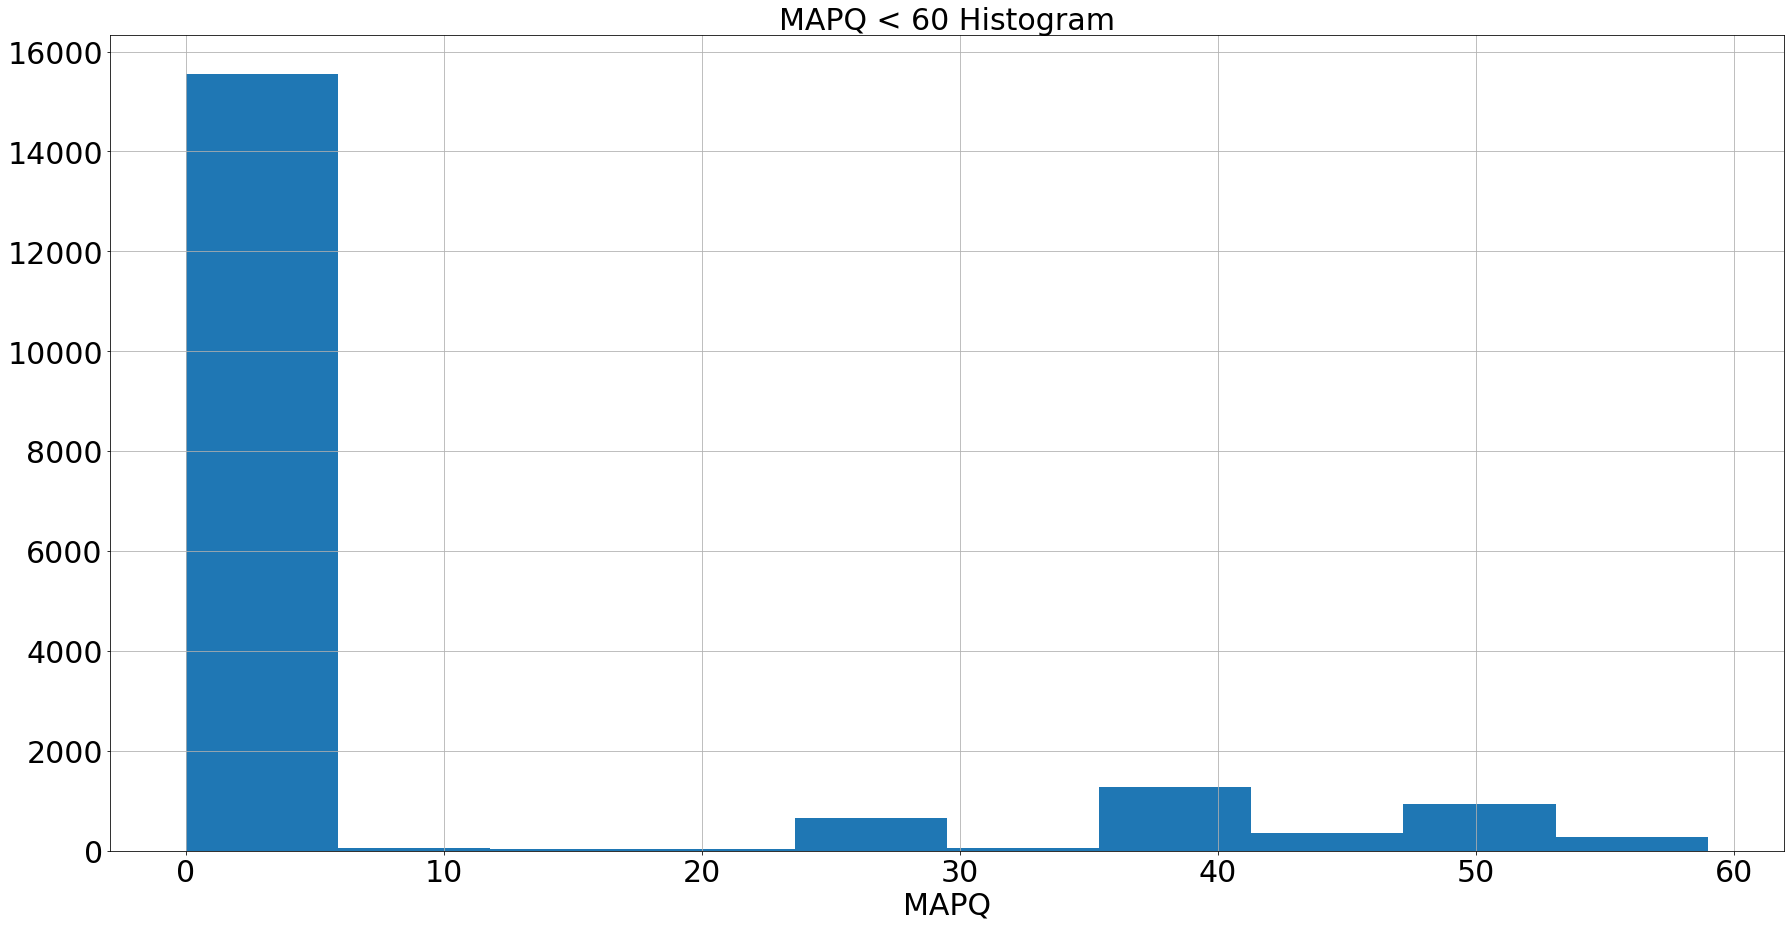

In [99]:
samposmap_mtbvar1[samposmap_mtbvar1['MAPQ'] < 60].hist(column='MAPQ', figsize=(30,15), xlabelsize=30, ylabelsize=30)
plt.title('MAPQ < 60 Histogram', fontsize=30)
plt.xlabel('MAPQ', fontsize=30)

Text(0.5, 0, 'POS (bin size = 10,000)')

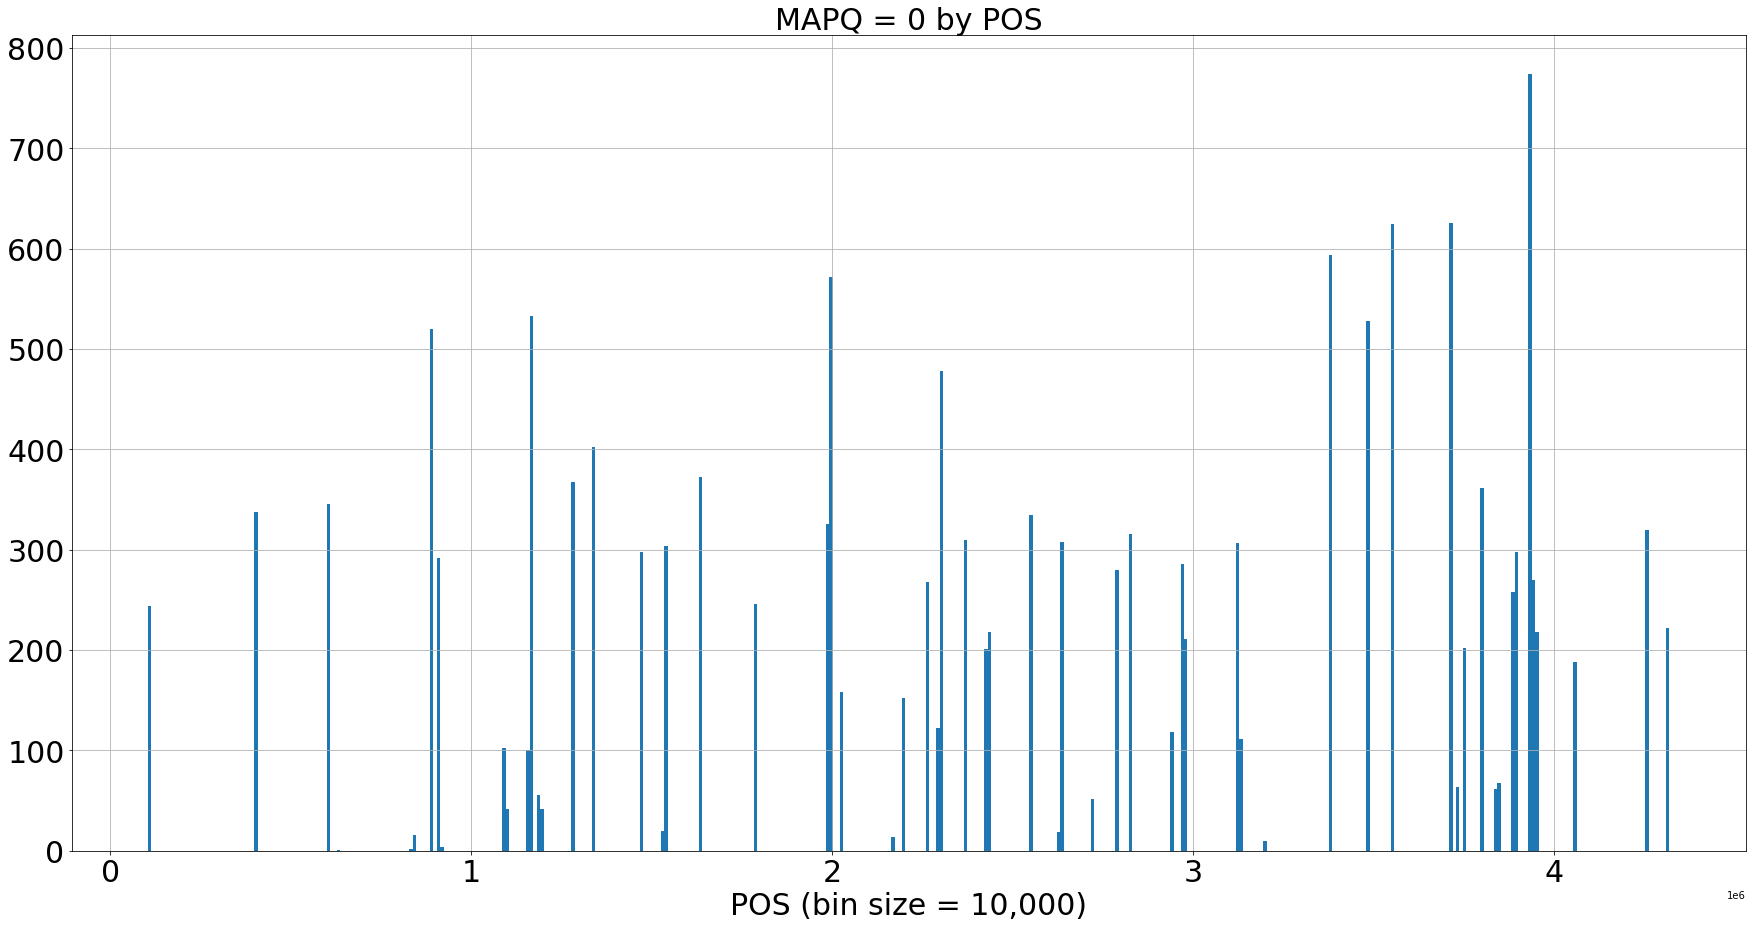

In [107]:
samposmap_mtbvar1[samposmap_mtbvar1['MAPQ'] == 0].hist(column='POS', bins=442, figsize=(30,15), xlabelsize=30, ylabelsize=30)
plt.title('MAPQ = 0 by POS', fontsize=30)
plt.xlabel('POS (bin size = 10,000)', fontsize=30)